**TRANSMISSION OF ECB CONVENTIONAL MONETARY POLICY**

Francesca Riondato

The project aims to answer the following question "Is the transmission of ECB conventional monetary policy effective on banks' volumes and banks' rates since 2014? Is there a time lag?"

In [1]:
# load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

The dataset is downloaded from the official website of **ECB Statistical Data Warehouse**.

In [2]:
# load dataset
mir_df = pd.read_excel('Dataset.xlsx', sheet_name = "MIR")
bsi_df = pd.read_excel('Dataset.xlsx', sheet_name = "BSI")
mro_df = pd.read_excel('Dataset.xlsx', sheet_name = "MRO")
oa_weighted = pd.read_excel('Dataset.xlsx', sheet_name = 'OAW')

We consider the MRO Normal Value. 

The interest rate on the **main refinancing operations** (MRO) is set by the Governing Council of the ECB and provides the bulk of liquidity to the banking system.

It is the interest rate that banks pay when they borrow money from the ECB for one week.

We create the MRO dataset with all dates to be able to perform a proper analysis.

In [3]:
# creating MRO dataset with all date
loans_df = mir_df[mir_df['Type of Loans'] == 'Loans'] #create the dataset with all loans

# create the dataset with MIR by country
mir_by_country = loans_df.groupby(by = loans_df['Country']).mean()
mir_by_country = mir_by_country.iloc[:, ::-1] #change the order of columns
mir_by_country = mir_by_country.T
#mir_by_country

mro_df['Date'] = mro_df['Date'].dt.strftime('%Y-%m')
full_mro_df = pd.DataFrame(dict(Date = list(mir_by_country.index), MRO = [0]*len(mir_by_country.index)))
previous = 0.25
for i in full_mro_df['Date']:
  for j in mro_df['Date']:
    full_mro_df.loc[full_mro_df['Date']==i,'MRO'] = previous
    if i == j:
      full_mro_df.loc[full_mro_df['Date']==i,'MRO'] = float(mro_df[mro_df['Date']==j]['MRO'])
      previous = float(mro_df[mro_df['Date']==j]['MRO'])
#full_mro_df

<ipython-input-3-9b74b9a3d52e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_by_country = loans_df.groupby(by = loans_df['Country']).mean()


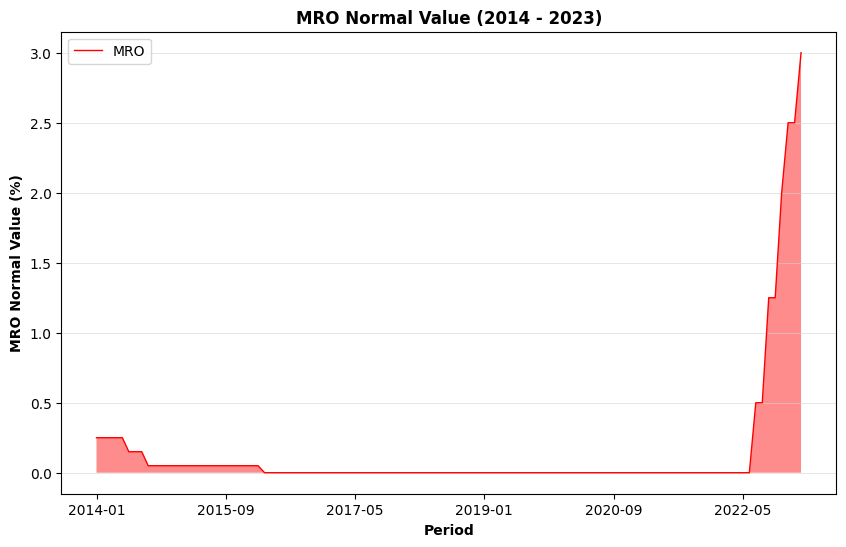

In [4]:
#MRO
pl = full_mro_df.plot('Date', 'MRO', color = 'red', linewidth = 1, figsize = (10, 6))
pl.fill_between(full_mro_df['Date'], 0, full_mro_df['MRO'], facecolor = 'red', alpha =.45)
pl.set_title('MRO Normal Value (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('MRO Normal Value (%)', fontweight = 'bold', fontsize = 10)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the 2014-2022 period MRO was kept at either 0% or close to 0%. The reason behind this low MRO is the low inflation, which had different driving forces as described by the ECB. 

One of the driving forces was related to the economic slack and the twin recession from 2009 and 2012. As we know from the Phillips curve inflation and unemployment have a stable and inverse relationship, therefore after the recession we see the economic slack put a downward pressure on inflation. The second driving force to be considered is the digitalisation, globalisation and the demographic changes. Through digitalisation for example e-commerce became widely used during this period which rendered almost every market more competitive and suppliers, providers and vendors had to become more transparent on prices and there was less and less space for profit margins.

In sum, a combination of interconnected factors explains the persistently low inflation over the years 2013-19. 

Whereas reduced demand and economic slack puts downward pressure on inflation as we saw for the period 2014-2020, reduced supply does the opposite. So when demand recovered in 2021 after the initial wave of the pandemic, constrained labor supply appeared which led to wages increases and prices increases. 


# **1.   MIR**

Let's start considering Interest Rates.

**MFI interest rate statistics** cover all interest rates that monetary financial institutions (MFIs) resident in the Euro Area – except central banks and money market funds – apply to euro-denominated from *deposits* and *loans* to households and non-financial corporations resident in the Euro Area countries.

They are used for the analysis of monetary *developments* and the monetary *transmission* mechanism as well as for the monitoring of *financial* ***stability***.

## *1.1. GENERIC*

The majority of MIR dataset consists of continuous attributes (about 95.65%), representing the monthly interest rates collected from 2014-01 to 2023-02. The remaining features (about 4.35%) refer to:

*   ***Country*** in the Euro Area, where company is domiciled;
*   ***Type of Loans***, describing the different financial instruments composition; 
*   ***Maturity***, the date on which the term of the loan expires;
*   ***BS Counterpart Sector***, revealing the sector in which the institutions are involved in;
*   ***IR Business Coverage***, reflecting the extent to which services and other resources have been used during the financial year, based on loan volume. 

Regarding the financial instruments composition of the MIR dataset, we decide to include four different types of Loans:

1.   ***Loans***, holdings of financial assets created when creditors lend funds to debtors;
2.   ***Lending for House Purchases***, loans granted for the purposes of investing in housing for own use or rental, or for the purchase of land;
3.   ***Credit for Consumption Other Lending***,  loans for consumption or granted to households for business, debt consolidation, education purposes;
4.   ***Extended Credit***, the amount of convenience credit left outstanding on the account after the relevant billing date.






In [5]:
mir_by_loans = mir_df.groupby(['Type of Loans']).mean()
mir_by_loans = mir_by_loans.iloc[:, ::-1]
mir_by_loans = mir_by_loans.T
#mir_by_loans

<ipython-input-5-1fe9c05903ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_by_loans = mir_df.groupby(['Type of Loans']).mean()


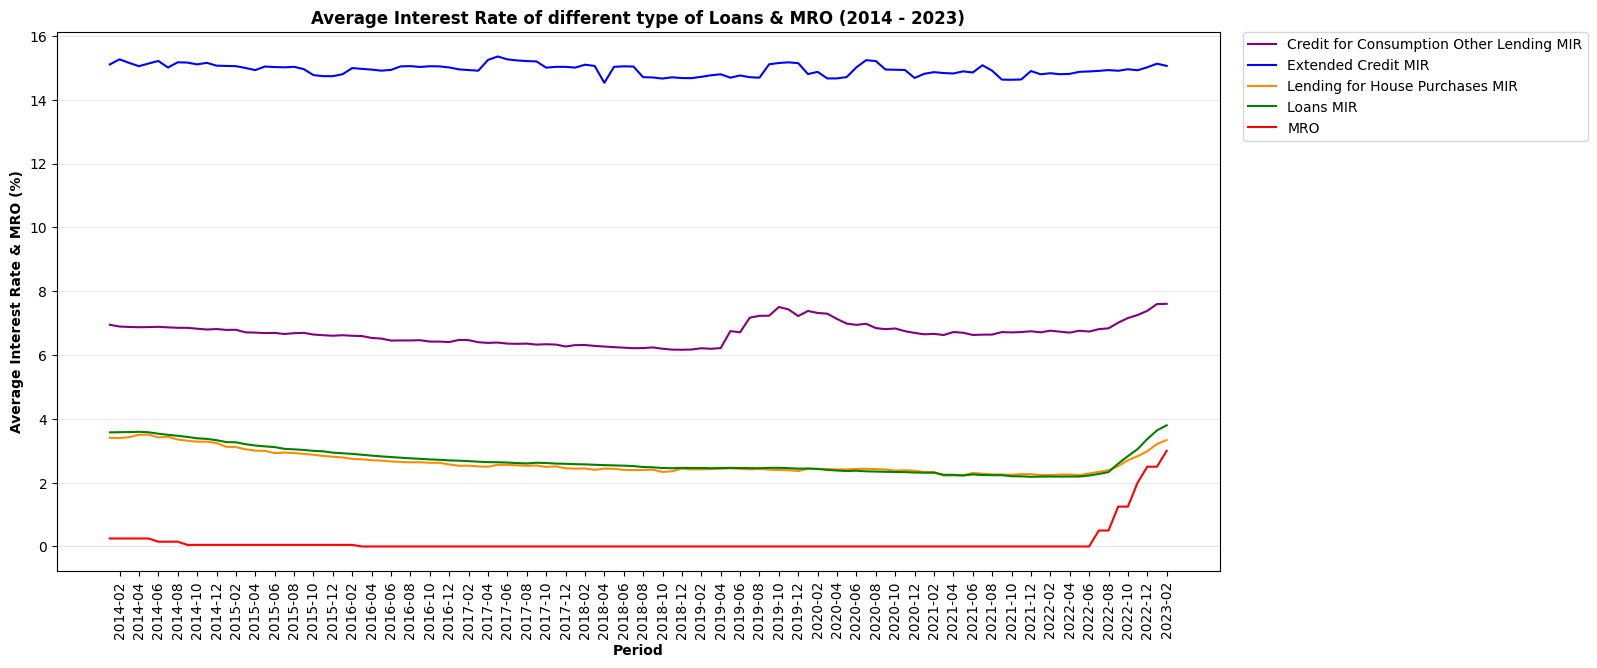

In [6]:
# MEAN & MRO
pl = mir_by_loans.plot(color = ('purple', 'blue', 'darkorange', 'green'), rot = 90, figsize = (15, 7))
pl.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red')
pl.set_xticks(range(1, len(mir_by_loans)+1, 2), mir_by_loans.index[1::2])
pl.set_title('Average Interest Rate of different type of Loans & MRO (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average Interest Rate & MRO (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Credit for Consumption Other Lending MIR', 'Extended Credit MIR', 'Lending for House Purchases MIR', 'Loans MIR', 'MRO'], bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

From 2014-02 to 2023-02, we can infer a pretty similar behavior between the average interest rates (%) of Loans and Lending for House Purchases for the majority of the period, presenting a slightly difference starting from the 2022-08: in the last six months, interest rates grow faster from about 2.8 to 3.8%, while the interest rates for Lending for House Purchases increase up to 3.3%. 
The average interest rate (%) of Credit for Consumption and Other Lending is grater than the previous one and shows a pretty stable behavior until 2019-04, than it slightly increases up to 7.60%. 
The blue line, representing the average inetrest rate (%) of Extended Credit is the highest one, showing a pretty stable behavior around the 15%.


## *1.2. LOANS*

Let's consider the **Loans**.

In [7]:
# LOANS
loans_df = mir_df[mir_df['Type of Loans'] == 'Loans']

# describe the data
loans_df.describe()

2023-02    2023-01    2022-12    2022-11    2022-10    2022-09  \
count  94.000000  94.000000  94.000000  94.000000  94.000000  95.000000   
mean    3.797447   3.639043   3.367872   3.051915   2.830106   2.596421   
std     0.900672   0.882872   0.838892   0.798512   0.772145   0.807035   
min     1.900000   1.780000   1.800000   1.790000   1.380000   1.300000   
25%     3.115000   2.982500   2.725000   2.392500   2.202500   1.910000   
50%     3.740000   3.570000   3.200000   2.835000   2.635000   2.430000   
75%     4.550000   4.477500   4.177500   3.730000   3.460000   3.200000   
max     5.620000   5.470000   5.230000   5.200000   5.210000   5.260000   

         2022-08    2022-07    2022-06    2022-05  ...    2014-10    2014-09  \
count  94.000000  94.000000  94.000000  94.000000  ...  89.000000  89.000000   
mean    2.332340   2.273085   2.225000   2.192340  ...   3.390225   3.433820   
std     0.774726   0.764191   0.778105   0.790705  ...   1.101188   1.101667   
min     0.710000   0.700000   0.390000   0.300000  ...   1.710000   1.740000   
25%     1.712500   1.692500   1.640000   1.595000  ...   2.640000   2.680000   
50%     2.265000   2.225000   2.155000   2.135000  ...   3.160000   3.190000   
75%     2.802500   2.785000   2.770000   2.720000  ...   3.920000   4.020000   
max     5.200000   5.140000   5.110000   5.110000  ...   6.570000   6.600000   

         2014-08    2014-07    2014-06    2014-05   2014-04    2014-03  \
count  89.000000  89.000000  89.000000  89.000000  89.00000  89.000000   
mean    3.468090   3.499326   3.534382   3.579438   3.59427   3.585618   
std     1.115413   1.130936   1.121556   1.152236   1.16695   1.180203   
min     1.770000   1.790000   1.810000   1.830000   1.82000   1.810000   
25%     2.710000   2.730000   2.790000   2.790000   2.81000   2.800000   
50%     3.180000   3.230000   3.230000   3.320000   3.34000   3.320000   
75%     4.020000   4.090000   4.100000   4.140000   4.12000   4.060000   
max     6.570000   6.700000   6.580000   6.780000   7.00000   7.100000   

         2014-02    2014-01  
count  89.000000  89.000000  
mean    3.580899   3.576292  
std     1.174526   1.194592  
min     1.800000   1.790000  
25%     2.800000   2.760000  
50%     3.260000   3.240000  
75%     4.050000   4.040000  
max     6.920000   7.260000  

[8 rows x 110 columns]

In [8]:
# MEAN 
loans_mean = loans_df.mean()
loans_mean = loans_mean.iloc[::-1]

<ipython-input-8-647cc0a4d9fb>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_mean = loans_df.mean()


Let's consider the **maturity** of the loans to inspect whether it has an impact on their behaviour.

<ipython-input-9-adc5ec9bd638>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loans_mat = loans_df.groupby(by = 'Maturity').mean()


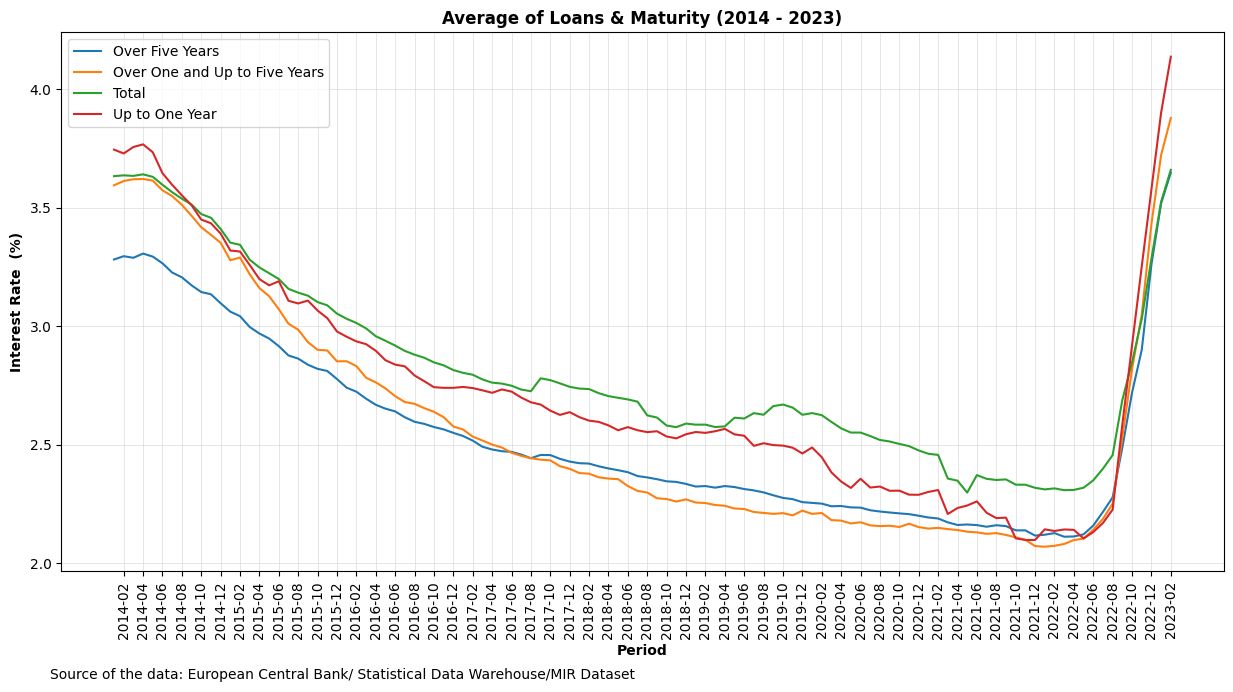

In [9]:
# MATURITY
loans_mat = loans_df.groupby(by = 'Maturity').mean()
loans_mat = loans_mat.T
loans_mat = loans_mat.iloc[::-1]
#loans_mat

pl = loans_mat.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(loans_mat)+1, 2), loans_mat.index[1::2])
pl.legend(frameon = True, loc = 'best')
pl.set_title('Average of Loans & Maturity (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Interest Rate  (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
pl.grid(color = 'lightgrey', linewidth = 0.4)

### *1.2.1. MATURITY = TOTAL*

In order to be more objective, let's now consider only the *maturity* up to the ***end*** of the period to inspect whether it has an impact on the average interest rate of loans.

#### A. AVERAGE

<ipython-input-10-a5658e7ef0f7>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_maturity_total_mean = loans_maturity_total.mean()


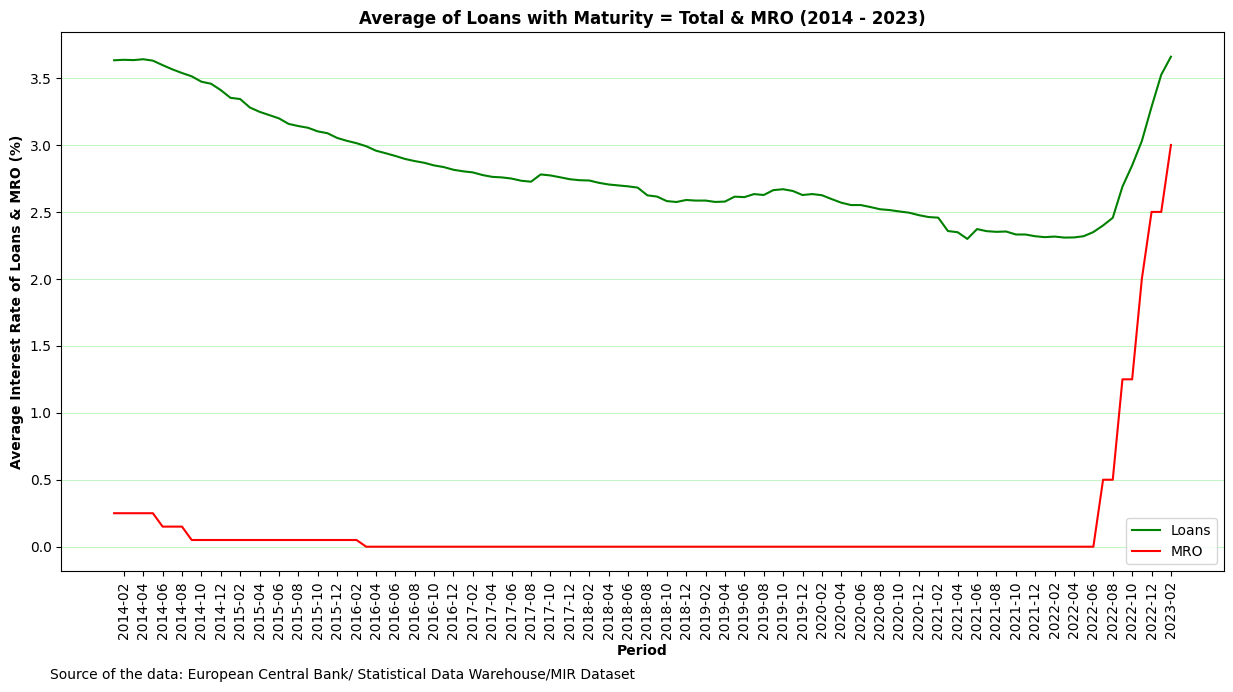

In [10]:
# MEAN, MATURITY = TOTAL, MRO
loans_maturity_total = mir_df[(mir_df['Type of Loans'] == 'Loans') 
                          & (mir_df['Maturity'] == 'Total')]
loans_maturity_total_mean = loans_maturity_total.mean()
loans_maturity_total_mean = loans_maturity_total_mean.iloc[::-1]
#loans_maturity_total_mean

pl = loans_maturity_total_mean.plot(color = 'green', rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(loans_mean)+1, 2), loans_mean.index[1::2])
pl.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red')
pl.set_title('Average of Loans with Maturity = Total & MRO (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average Interest Rate of Loans & MRO (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Loans', 'MRO'], frameon = True, loc = 'best')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgreen', linewidth = 0.4)

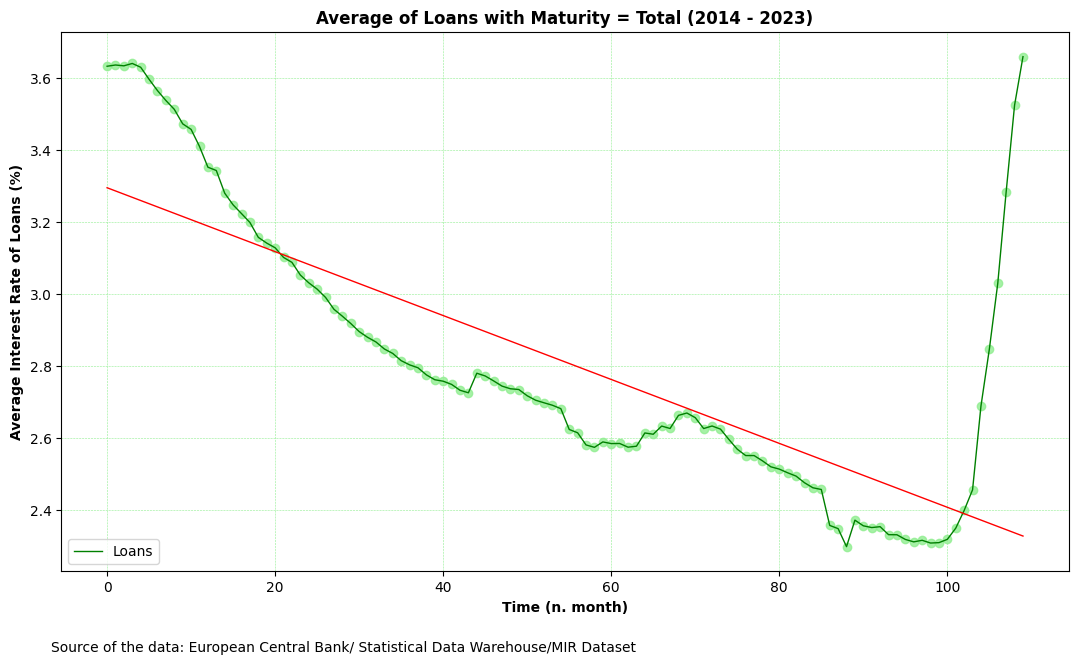

In [11]:
# MEAN & MATURITY = TOTAL
loans_maturity_total_mean2 = pd.DataFrame(dict(Mean = loans_maturity_total_mean))
loans_maturity_total_mean2['Time'] = np.arange(len(loans_maturity_total_mean2.index))
#loans_maturity_total_mean2

fig, ax = plt.subplots(figsize = (13, 7))
ax.plot('Time', 'Mean', data = loans_maturity_total_mean2, color = 'green', linewidth = 1)
ax = sns.regplot(x = 'Time', y = 'Mean', data = loans_maturity_total_mean2, ci = None, scatter_kws = dict(color = 'lightgreen'), line_kws={'color': 'red', 'linewidth' : 1})
ax.set_title('Average of Loans with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
ax.set_xlabel('Time (n. month)', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('Average Interest Rate of Loans (%)', fontweight = 'bold', fontsize = 10)
ax.legend(['Loans'], frameon = True, loc = 'best')
ax.text(-0.01, -0.15, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = ax.transAxes)
plt.grid(color = 'lightgreen', linestyle = '--', linewidth = 0.4)

#### B. COUNTRY

Let's consider the average interest rate of Loans across **countries** in the Euro - Area, where companies are domiciled. 

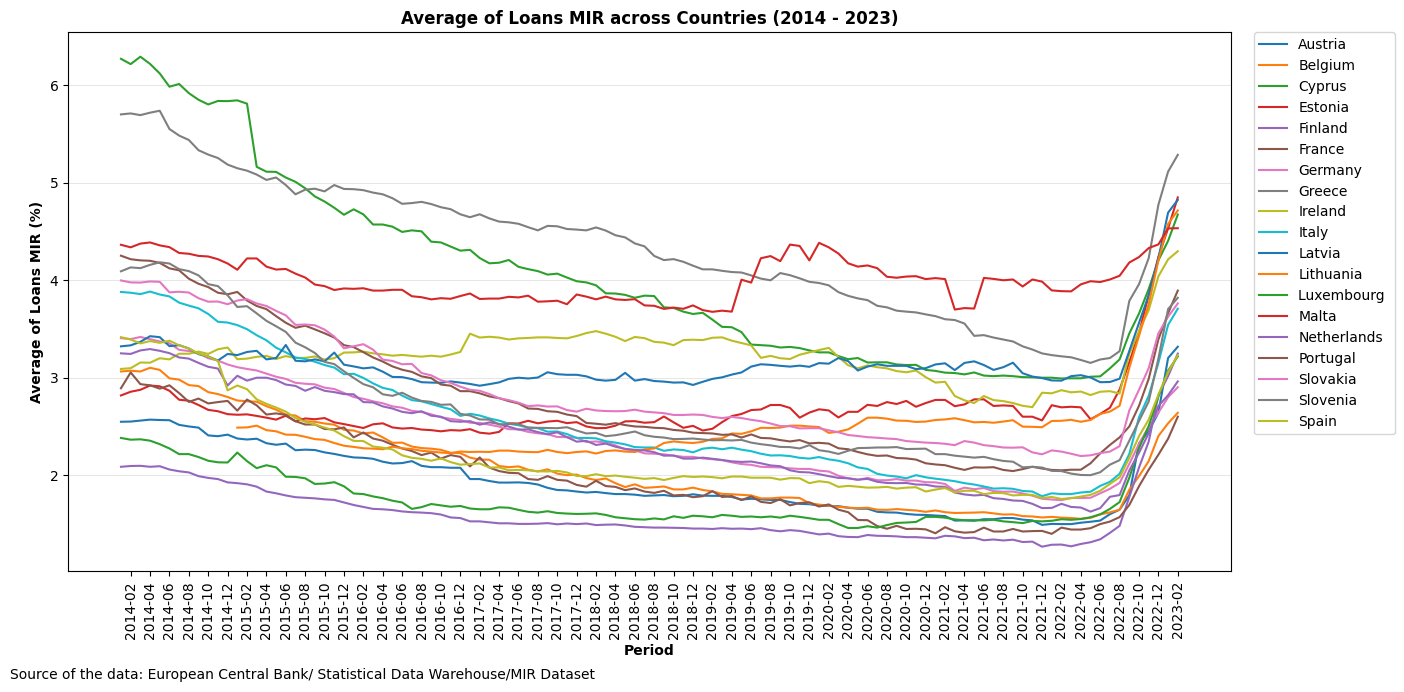

In [13]:
# COUNTRY
pl = mir_by_country.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(mir_by_country)+1, 2), mir_by_country.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Average of Loans MIR across Countries (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Loans MIR (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the sake of clarity, we separate each country into a graph.

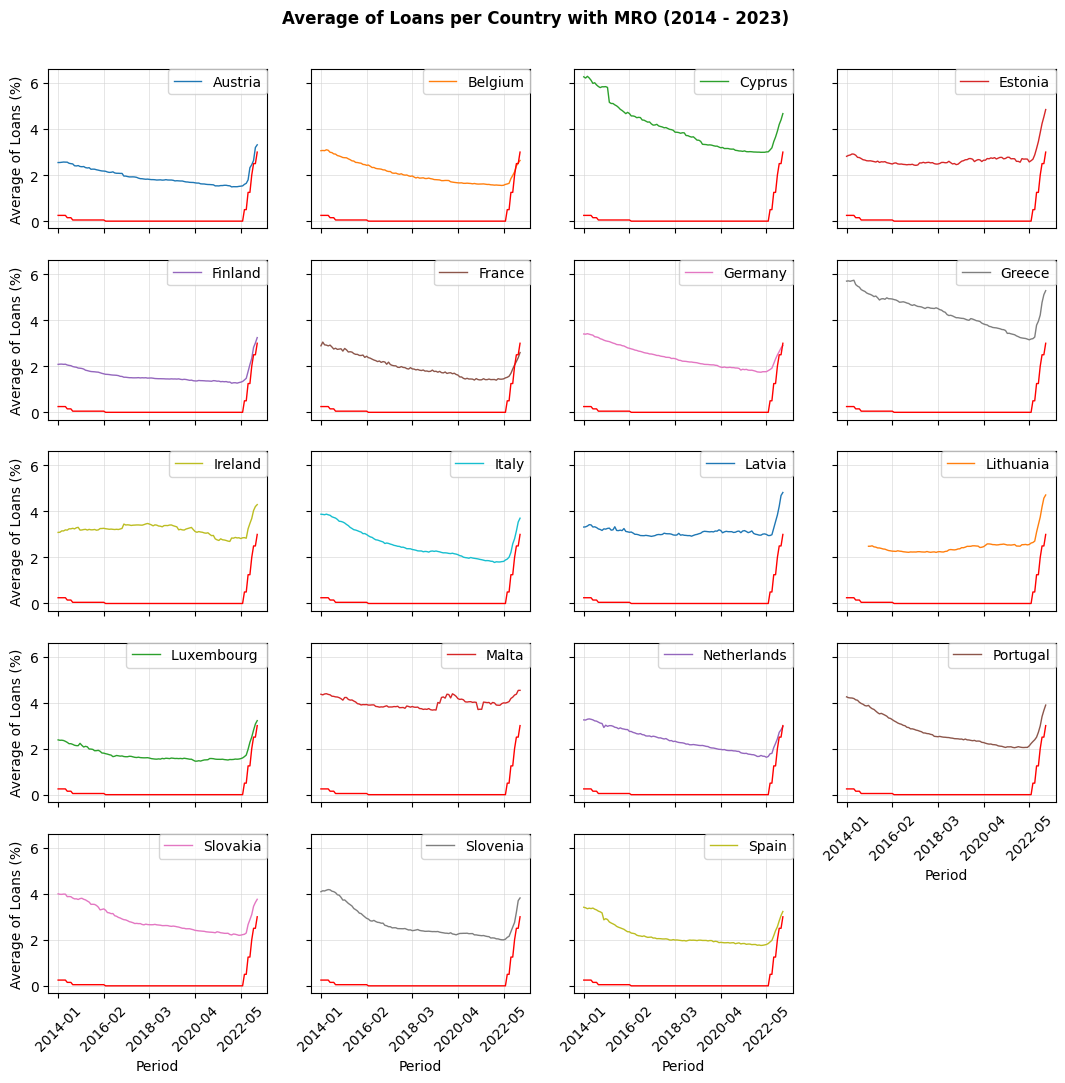

In [14]:
# MEAN & MRO
mir_by_country.plot(subplots = True, layout = (5, 4), figsize = (13, 12), sharey = True,
                    rot = 45,  ylabel = 'Average of Loans (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Average of Loans per Country with MRO (2014 - 2023)", fontsize = 12, fontweight = 'bold', y = 0.93)

for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red', linewidth = 1)
    ax.grid(color = 'lightgrey', linewidth = 0.4)
    plt.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
    

### *1.2.2. HIGHLIGHTS*

In [15]:
Cols = ['2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09']

MIR_correlation = (mir_df[mir_df['Type of Loans'] == 'Loans'])
MIR_correlation_MTotal = (MIR_correlation[MIR_correlation['Maturity'] == 'Total'])

Mean_MIR_23_22 = MIR_correlation_MTotal[Cols].mean()

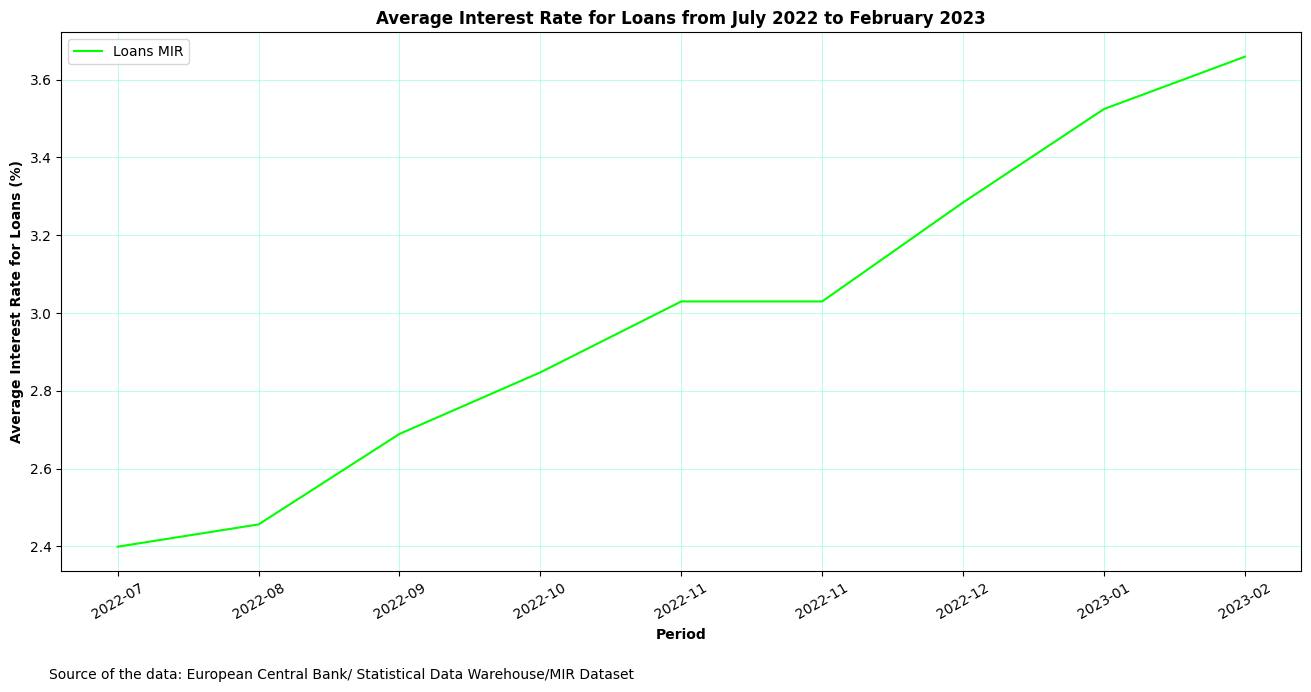

In [16]:
#Increase in Interest Rates since the beginning of the increase in MRO 
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_22_23_plot = MIR_correlation_MTotal[Cols_increase_22_23].mean()
MIR_plot_22_23 = MIR_increase_22_23_plot.plot(color = 'lime', rot = 30, figsize = (16, 7))
plt.grid(color = 'aquamarine', linewidth = 0.4)
MIR_plot_22_23.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = MIR_plot_22_23.transAxes)
MIR_plot_22_23.set_title('Average Interest Rate for Loans from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_plot_22_23.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23.set_ylabel('Average Interest Rate for Loans (%)', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23.legend(['Loans MIR'], frameon = True, loc = 'best') 

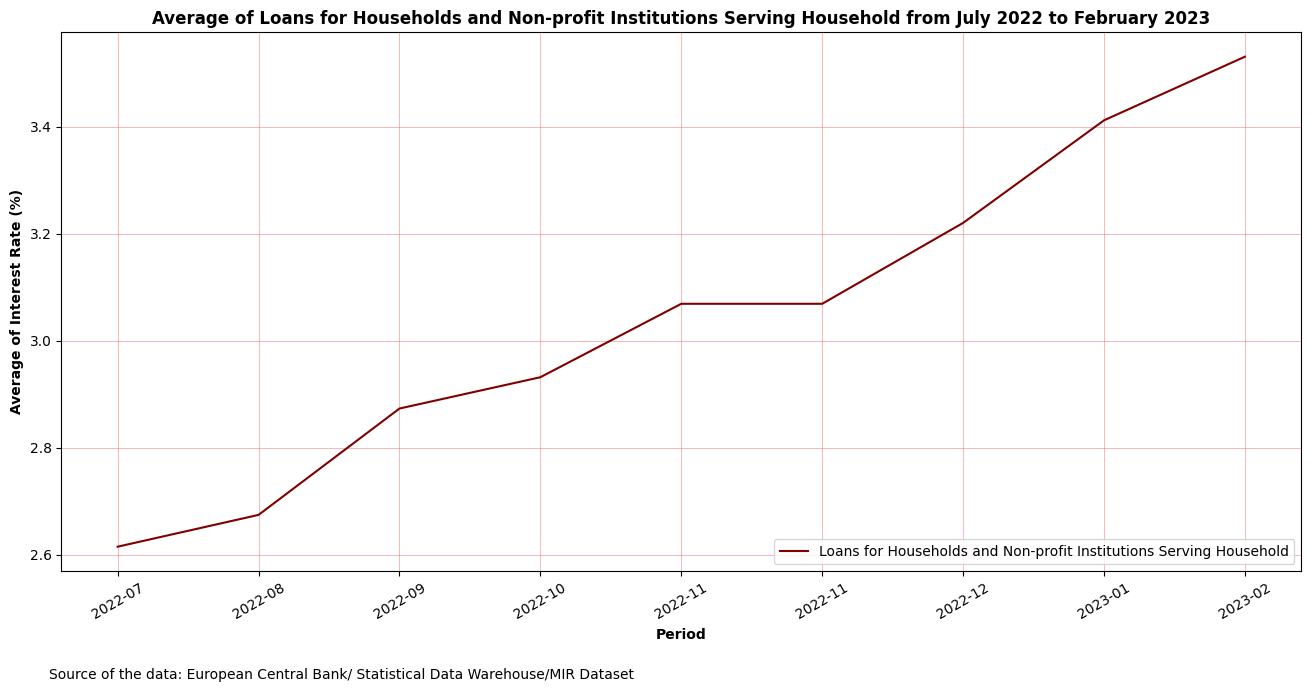

In [17]:
#Increase in Interest Rates since the beginning of the increase in MRO for Households and Non-profit Institutions Serving Households
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_households=(MIR_correlation_MTotal[MIR_correlation_MTotal['BS Counterpart Sector']=='Households and Non-profit Institutions Serving Households'])
MIR_increase_22_23_households=MIR_increase_households[Cols_increase_22_23].mean()

MIR_plot_22_23_households = MIR_increase_22_23_households.plot(color = 'maroon', rot = 30, figsize = (16, 7))
plt.grid(color = 'lightcoral', linewidth = 0.4)
MIR_plot_22_23_households.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform=MIR_plot_22_23_households.transAxes)
MIR_plot_22_23_households.set_title('Average of Loans for Households and Non-profit Institutions Serving Household from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_plot_22_23_households.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23_households.set_ylabel('Average of Interest Rate (%)', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23_households.legend(['Loans for Households and Non-profit Institutions Serving Household'], frameon = True, loc = 'lower right')

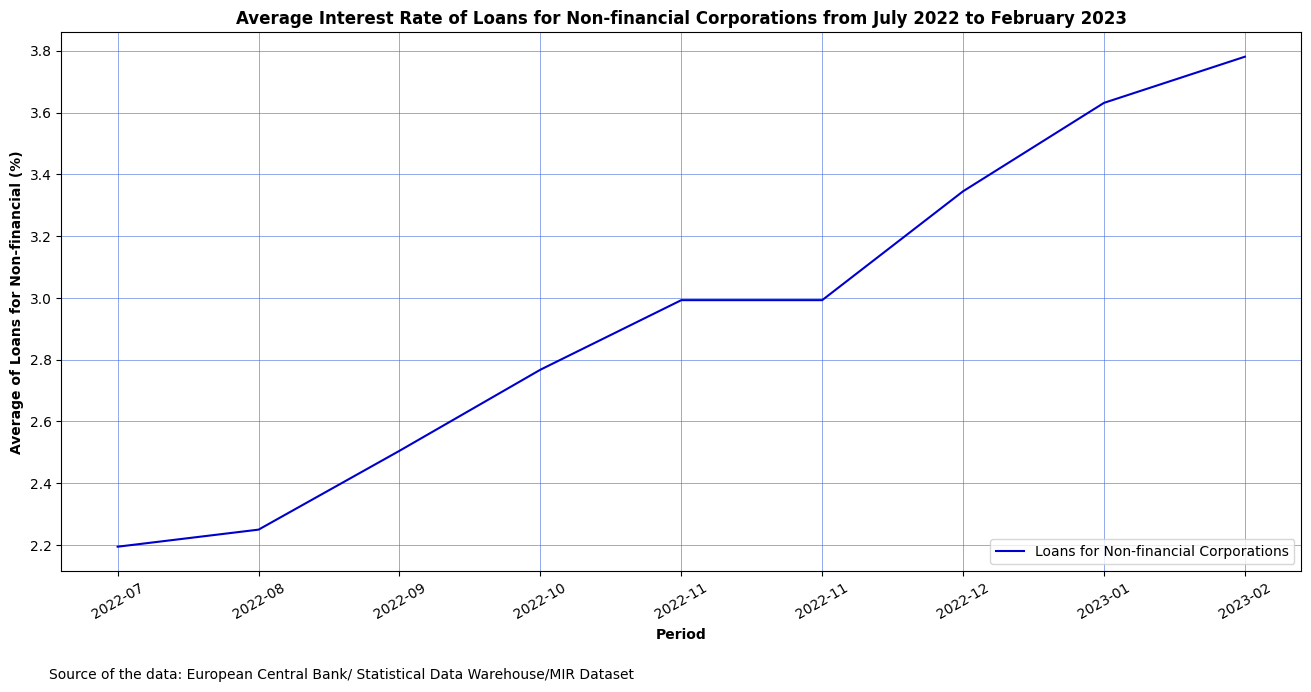

In [18]:
#Increase in Interest Rates since the beginning of the increase in MRO for Non-financial Corporations
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_NonFincial_Corporations=(MIR_correlation_MTotal[MIR_correlation_MTotal['BS Counterpart Sector']=='Non-financial Corporations'])
MIR_increase_NonFincial_Corporations_22_23=MIR_increase_NonFincial_Corporations[Cols_increase_22_23].mean()
MIR_increase_NonFincial_Corporations_22_23_plot=MIR_increase_NonFincial_Corporations_22_23.plot(color = 'mediumblue', rot = 30, figsize = (16, 7))
plt.grid(color = 'royalblue', linewidth = 0.4)
MIR_increase_NonFincial_Corporations_22_23_plot.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform=MIR_increase_NonFincial_Corporations_22_23_plot.transAxes)
MIR_increase_NonFincial_Corporations_22_23_plot.set_title('Average Interest Rate of Loans for Non-financial Corporations from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_increase_NonFincial_Corporations_22_23_plot.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_increase_NonFincial_Corporations_22_23_plot.set_ylabel('Average of Loans for Non-financial (%)', fontweight = 'bold', fontsize = 10)
MIR_increase_NonFincial_Corporations_22_23_plot.legend(['Loans for Non-financial Corporations'], frameon = True, loc = 'lower right')

## *1.3. LENDING FOR HOUSE PURCHASES*

Let's consider the **Lending for House Purchases**.

In [19]:
# LENDING FOR HOUSE PURCHASES
lfhp_df = mir_df[mir_df['Type of Loans'] == 'Landing for House Purchases']

# describe the data
lfhp_df.describe()

2023-02    2023-01    2022-12    2022-11    2022-10    2022-09  \
count  74.000000  74.000000  74.000000  74.000000  74.000000  75.000000   
mean    3.336486   3.211351   2.982973   2.829865   2.703108   2.517733   
std     1.436892   1.441825   1.406279   1.414078   1.412595   1.419586   
min     1.510000   1.440000   1.410000   1.350000   1.310000   1.240000   
25%     2.430000   2.350000   2.120000   1.922500   1.770000   1.600000   
50%     3.010000   2.895000   2.630000   2.530000   2.430000   2.270000   
75%     4.250000   3.990000   3.602500   3.175000   2.937500   2.740000   
max    10.200000  10.160000  10.100000   9.900000   9.800000   9.710000   

         2022-08    2022-07    2022-06    2022-05  ...    2014-10    2014-09  \
count  74.000000  74.000000  74.000000  74.000000  ...  70.000000  70.000000   
mean    2.392568   2.338514   2.287027   2.235541  ...   3.284286   3.312000   
std     1.396256   1.393020   1.396523   1.397231  ...   1.178308   1.163165   
min     1.030000   0.910000   0.820000   0.680000  ...   1.460000   1.480000   
25%     1.560000   1.530000   1.457500   1.435000  ...   2.385000   2.407500   
50%     2.190000   2.105000   2.000000   1.960000  ...   3.235000   3.270000   
75%     2.587500   2.460000   2.460000   2.455000  ...   4.132500   4.127500   
max     9.570000   9.450000   9.410000   9.390000  ...   6.470000   6.430000   

         2014-08    2014-07    2014-06    2014-05    2014-04    2014-03  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean    3.354000   3.438286   3.418143   3.504571   3.502714   3.426571   
std     1.169877   1.285315   1.217596   1.407683   1.420018   1.262315   
min     1.500000   1.520000   1.530000   1.530000   1.520000   1.500000   
25%     2.480000   2.527500   2.555000   2.565000   2.555000   2.552500   
50%     3.320000   3.330000   3.335000   3.310000   3.320000   3.325000   
75%     4.165000   4.250000   4.265000   4.205000   4.232500   4.140000   
max     6.250000   7.570000   6.910000   9.290000   9.400000   7.300000   

         2014-02    2014-01  
count  70.000000  70.000000  
mean    3.397571   3.405857  
std     1.215980   1.197255  
min     1.490000   1.480000  
25%     2.552500   2.535000  
50%     3.330000   3.330000  
75%     4.125000   4.250000  
max     7.130000   7.190000  

[8 rows x 110 columns]

In [20]:
# MEAN
lfhp_mean = lfhp_df.mean()
lfhp_mean = lfhp_mean.iloc[::-1]

<ipython-input-20-211edb035d64>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lfhp_mean = lfhp_df.mean()


Let's consider the **maturity** of the loans to inspect whether it has an impact on their behaviour.

<ipython-input-21-e925f18970a9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lfhp_mat = lfhp_df.groupby(by = 'Maturity').mean()


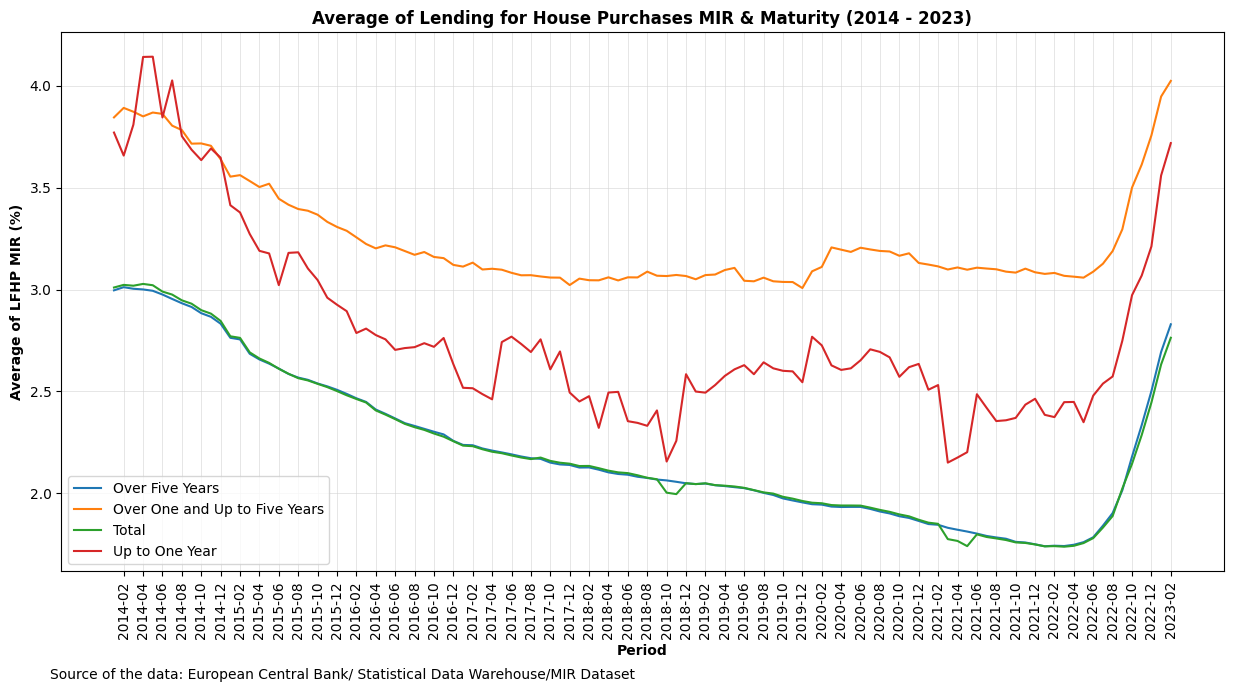

In [21]:
# MATURITY
lfhp_mat = lfhp_df.groupby(by = 'Maturity').mean()
lfhp_mat = lfhp_mat.T
lfhp_mat = lfhp_mat.iloc[::-1]
#lfhp_mat

pl = lfhp_mat.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(lfhp_mat)+1, 2), lfhp_mat.index[1::2])
#pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.legend(frameon = True, loc = 'best')
pl.set_title('Average of Lending for House Purchases MIR & Maturity (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of LFHP MIR (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
pl.grid(color = 'lightgrey', linewidth = 0.4)

### *1.3.1. MATURITY = TOTAL*

In order to be more objective, let's now consider only the *maturity* up to the ***end*** of the period to inspect whether it has an impact on the average interest rate of loans.

#### A. AVERAGE

<ipython-input-22-932d4d400d17>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lfhp_maturity_total_mean = lfhp_maturity_total.mean()


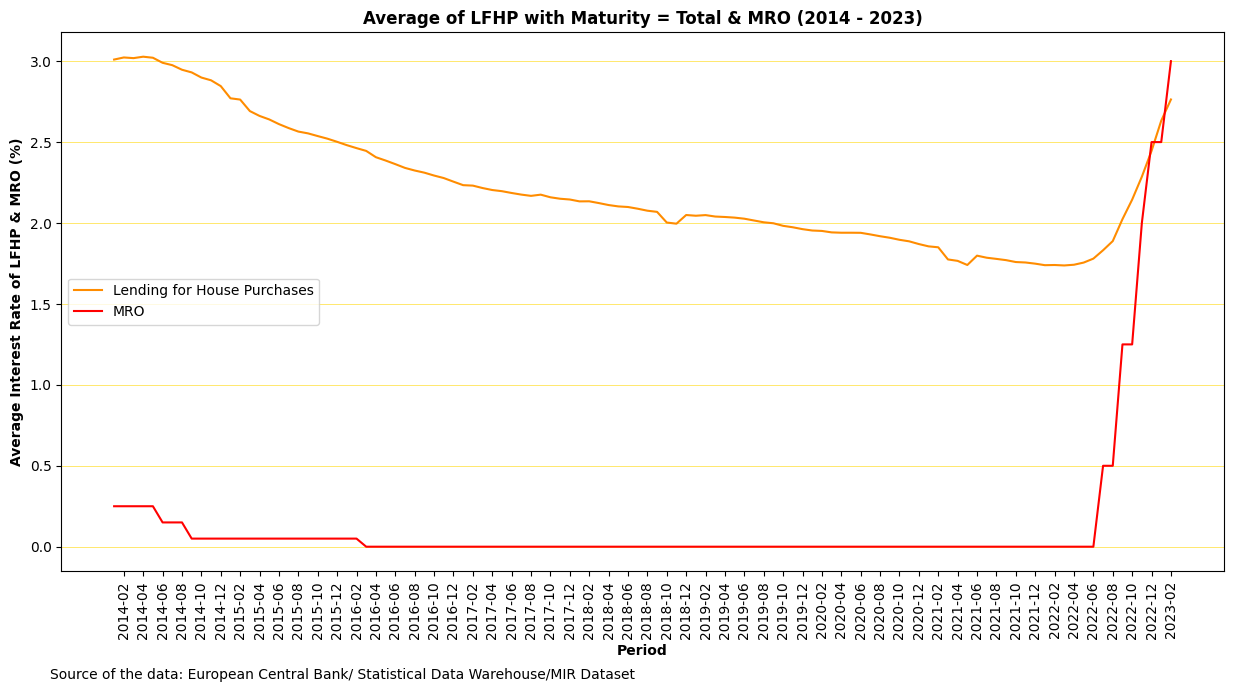

In [22]:
# MEAN, MATURITY = TOTAL, MRO
lfhp_maturity_total = mir_df[(mir_df['Type of Loans'] == 'Landing for House Purchases') 
                          & (mir_df['Maturity'] == 'Total')]
lfhp_maturity_total_mean = lfhp_maturity_total.mean()
lfhp_maturity_total_mean = lfhp_maturity_total_mean.iloc[::-1]
#lfhp_maturity_total_mean

pl = lfhp_maturity_total_mean.plot(color = 'darkorange', rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(lfhp_mean)+1, 2), lfhp_mean.index[1::2])
pl.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red')
pl.set_title('Average of LFHP with Maturity = Total & MRO (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average Interest Rate of LFHP & MRO (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Lending for House Purchases', 'MRO'], frameon = True, loc = 'best')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'gold', linewidth = 0.4)



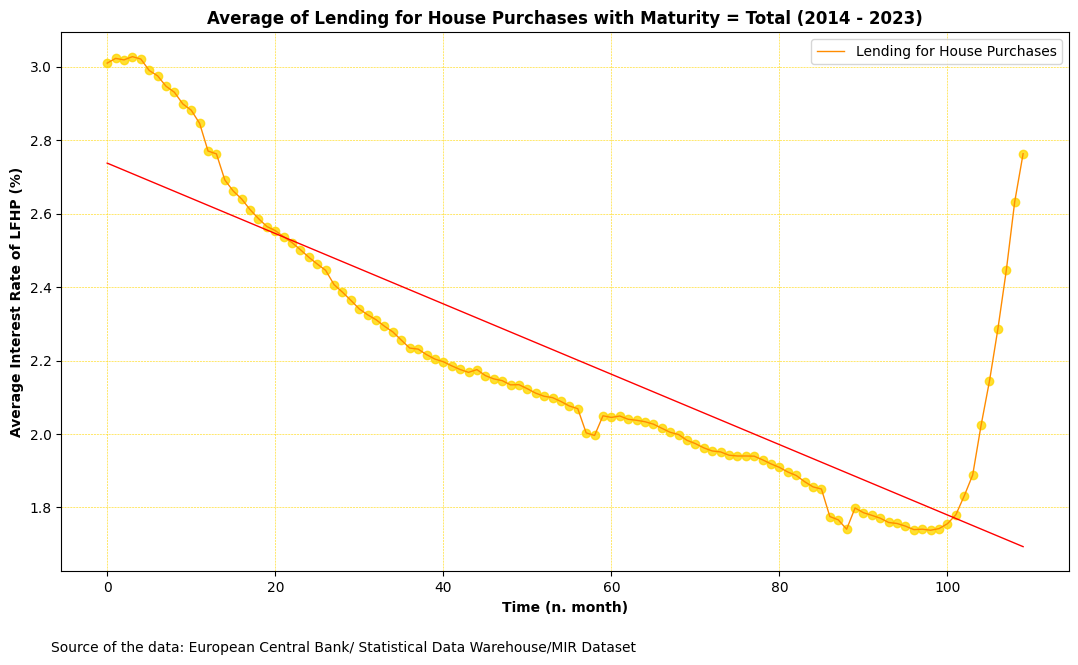

In [23]:
# MEAN & MATURITY = TOTAL
lfhp_maturity_total_mean2 = pd.DataFrame(dict(Mean = lfhp_maturity_total_mean))
lfhp_maturity_total_mean2['Time'] = np.arange(len(lfhp_maturity_total_mean2.index))
#lfhp_maturity_total_mean2

fig, ax = plt.subplots(figsize = (13, 7))
ax.plot('Time', 'Mean', data = lfhp_maturity_total_mean2, color = 'darkorange', linewidth = 1)
ax = sns.regplot(x = 'Time', y = 'Mean', data = lfhp_maturity_total_mean2, ci = None, scatter_kws = dict(color = 'gold'), line_kws={'color': 'red', 'linewidth' : 1})
ax.set_title('Average of Lending for House Purchases with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
ax.set_xlabel('Time (n. month)', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('Average Interest Rate of LFHP (%)', fontweight = 'bold', fontsize = 10)
ax.legend(['Lending for House Purchases'], frameon = True, loc = 'best')
ax.text(-0.01, -0.15, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = ax.transAxes)
plt.grid(color = 'gold', linestyle = '--', linewidth = 0.4)

#### B. SD

<ipython-input-24-971cafdcaf20>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lfhp_sd = lfhp_df.std()


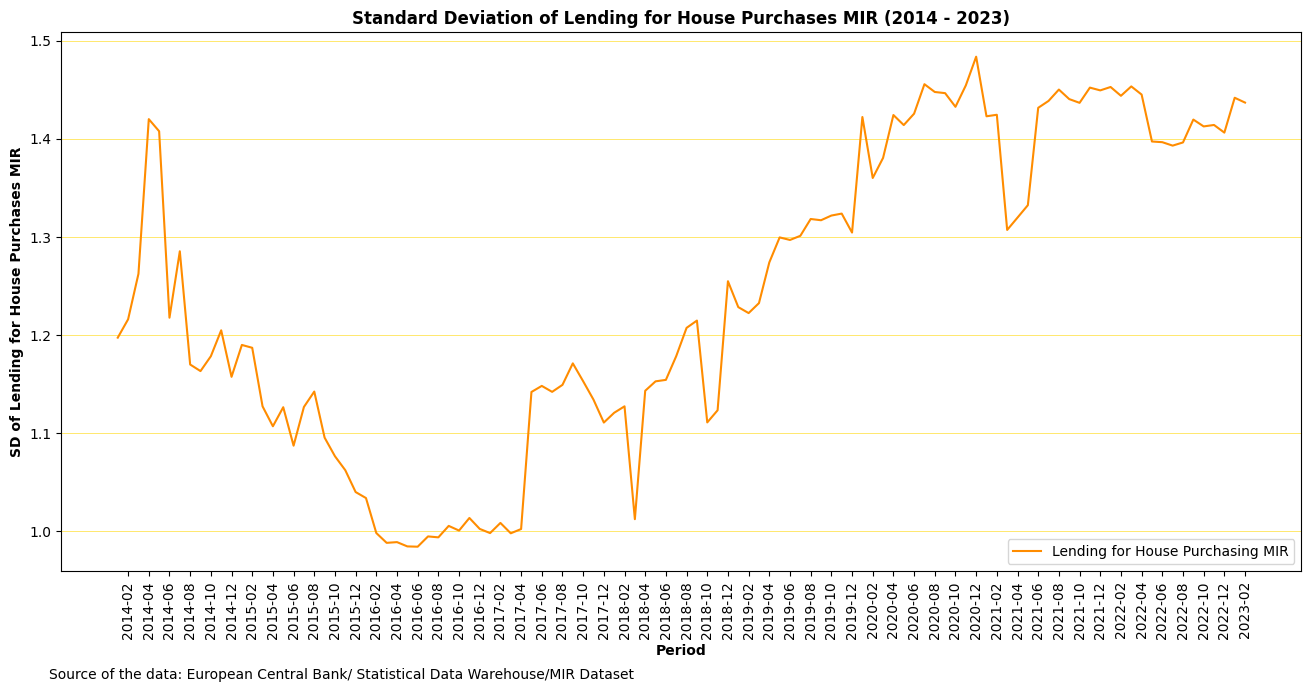

In [24]:
# SD
lfhp_sd = lfhp_df.std()
lfhp_sd = lfhp_sd.iloc[::-1] 

pl = lfhp_sd.plot(color = "darkorange", rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(lfhp_sd)+1, 2), lfhp_sd.index[1::2])
pl.set_title('Standard Deviation of Lending for House Purchases MIR (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('SD of Lending for House Purchases MIR', fontweight = 'bold', fontsize = 10)
pl.legend(['Lending for House Purchasing MIR'], frameon = True, loc = 'lower right')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'gold', linewidth = 0.4)

#### C. COUNTRY

Let's consider the average interest rate of Loans across **countries** in the Euro - Area, where companies are domiciled. 

<ipython-input-25-f253b4ffb3a5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_by_country_lfhp = lfhp_df.groupby(by = lfhp_df['Country']).mean()


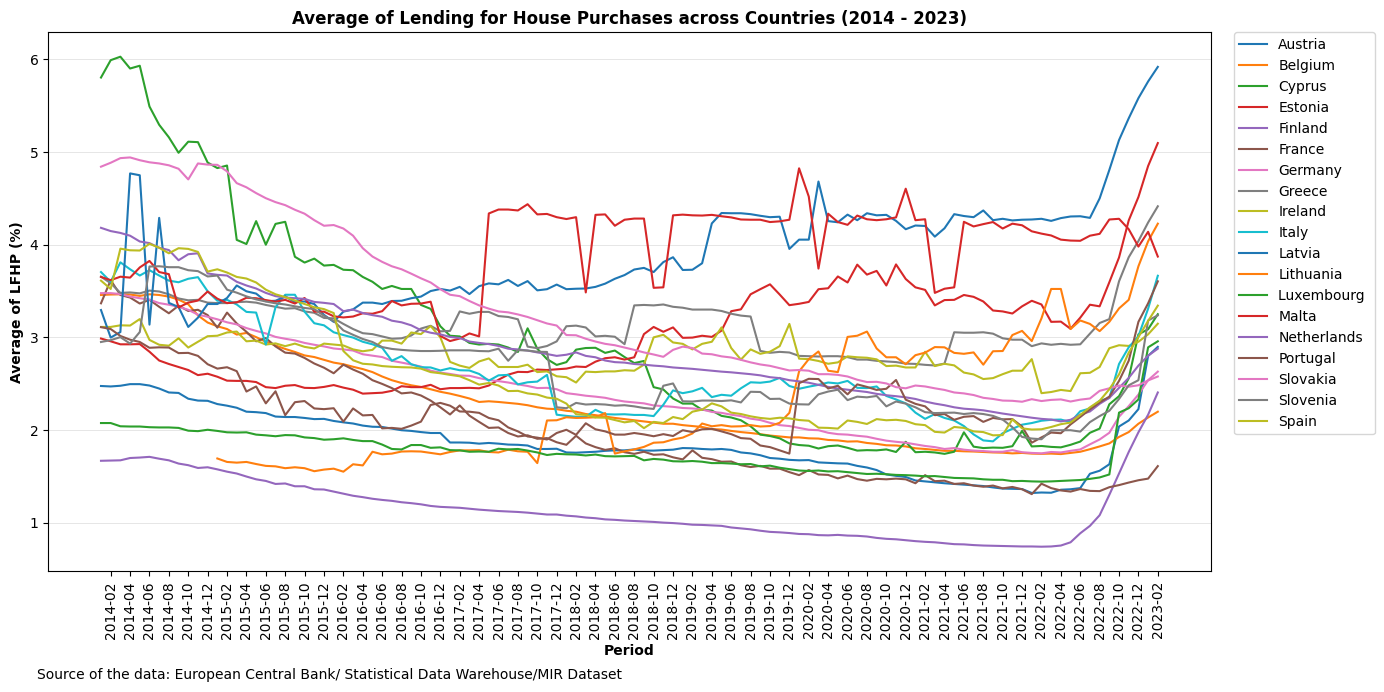

In [25]:
# create the dataset with MIR by country
mir_by_country_lfhp = lfhp_df.groupby(by = lfhp_df['Country']).mean()
mir_by_country_lfhp = mir_by_country_lfhp.iloc[:, ::-1] #change the order of columns
mir_by_country_lfhp = mir_by_country_lfhp.T

# COUNTRY
pl = mir_by_country_lfhp.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(mir_by_country_lfhp)+1, 2), mir_by_country_lfhp.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Average of Lending for House Purchases across Countries (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of LFHP (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
pl.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the sake of clarity, we separate each country into a graph.

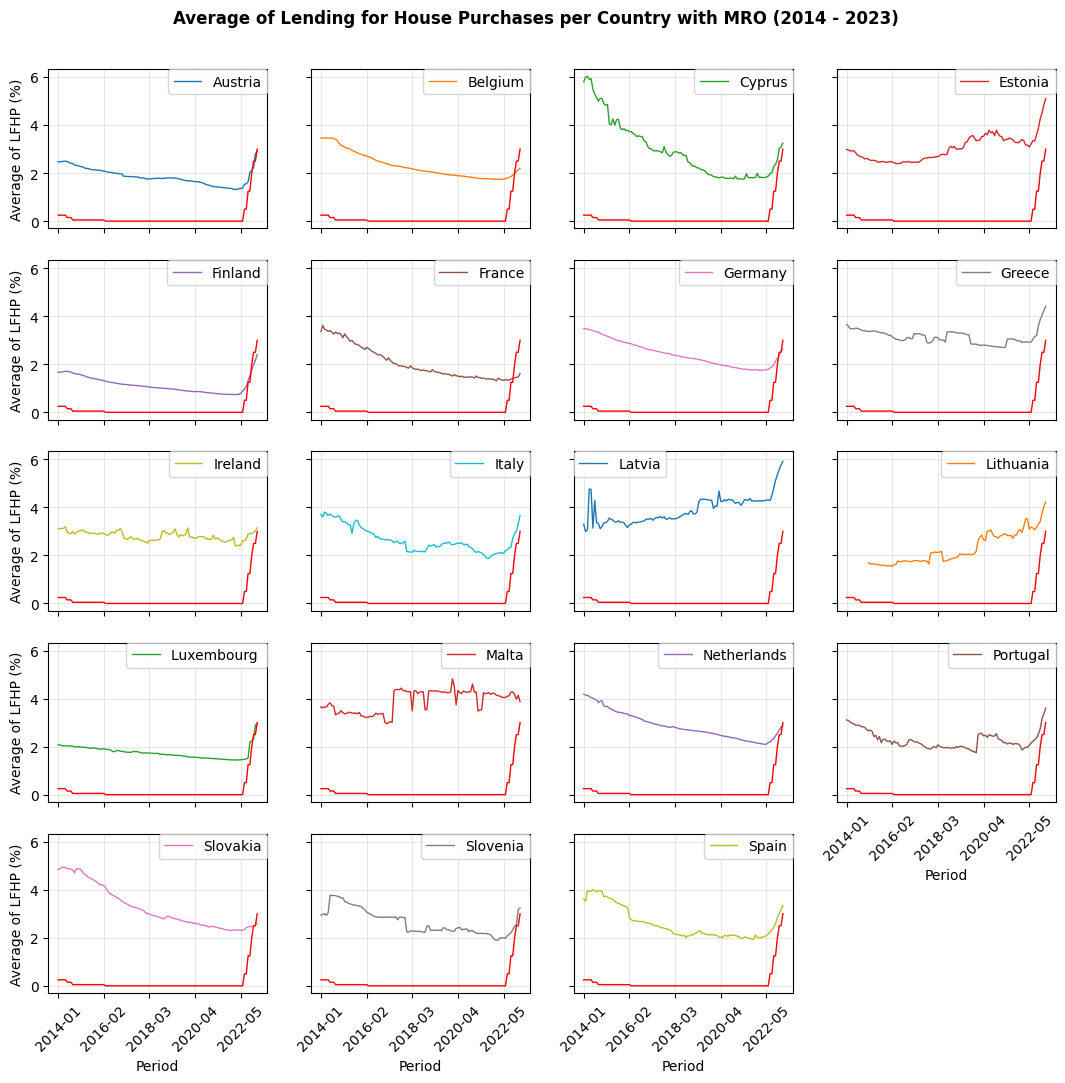

In [26]:
# LFHP & MRO
mir_by_country_lfhp.plot(subplots = True, layout = (5, 4), figsize = (13, 12), sharey = True,
                    rot = 45,  ylabel = 'Average of LFHP (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Average of Lending for House Purchases per Country with MRO (2014 - 2023)", fontsize = 12, fontweight = 'bold', y = 0.93)
for ax in plt.gcf().axes:
    ax.legend(loc='best', borderaxespad = 0)
    ax.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red', linewidth = 1)
    ax.grid(color = 'lightgrey', linewidth = 0.4)

### *1.3.2. HIGHLIGHTS*

In [27]:
Cols = ['2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09']

MIR_correlation = (mir_df[mir_df['Type of Loans'] == 'Landing for House Purchases'])
MIR_correlation_MTotal = (MIR_correlation[MIR_correlation['Maturity'] == 'Total'])

Mean_MIR_23_22 = MIR_correlation_MTotal[Cols].mean()

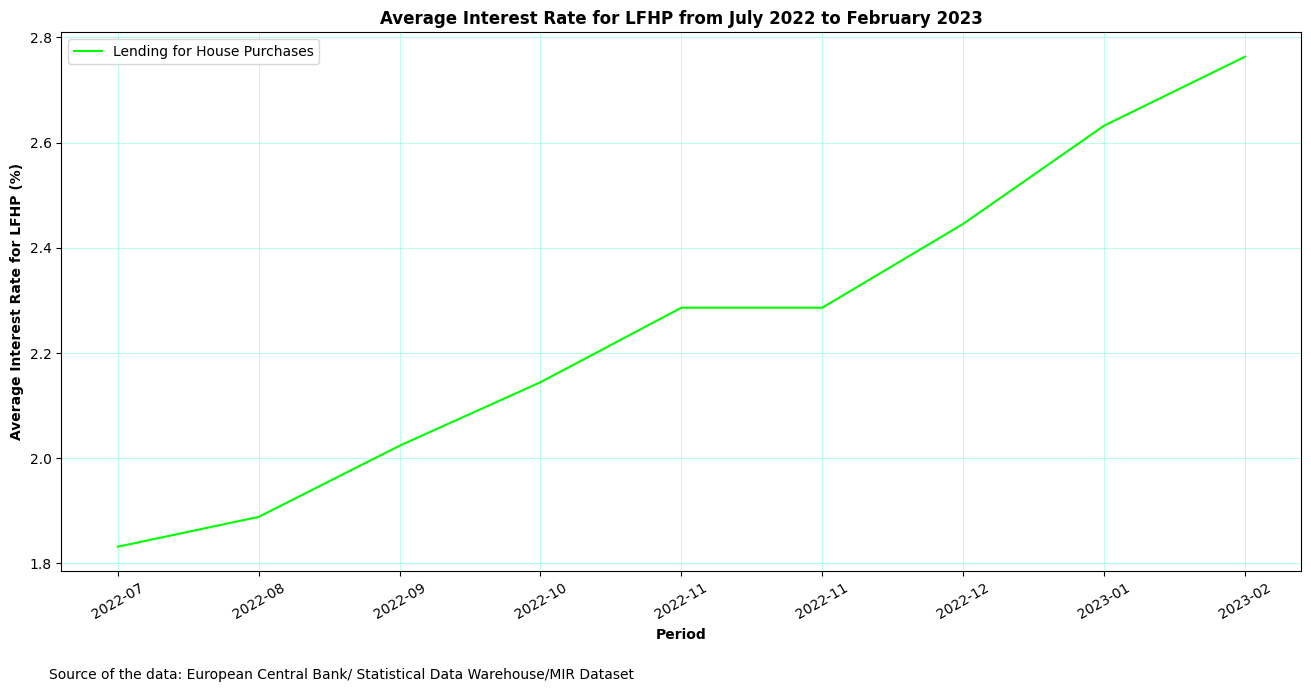

In [28]:
#Increase in Interest Rates since the beginning of the increase in MRO 
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_22_23_plot = MIR_correlation_MTotal[Cols_increase_22_23].mean()
MIR_plot_22_23 = MIR_increase_22_23_plot.plot(color = 'lime', rot = 30, figsize = (16, 7))
plt.grid(color = 'aquamarine', linewidth = 0.4)
MIR_plot_22_23.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = MIR_plot_22_23.transAxes)
MIR_plot_22_23.set_title('Average Interest Rate for LFHP from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_plot_22_23.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23.set_ylabel('Average Interest Rate for LFHP (%)', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23.legend(['Lending for House Purchases'], frameon = True, loc = 'best') 

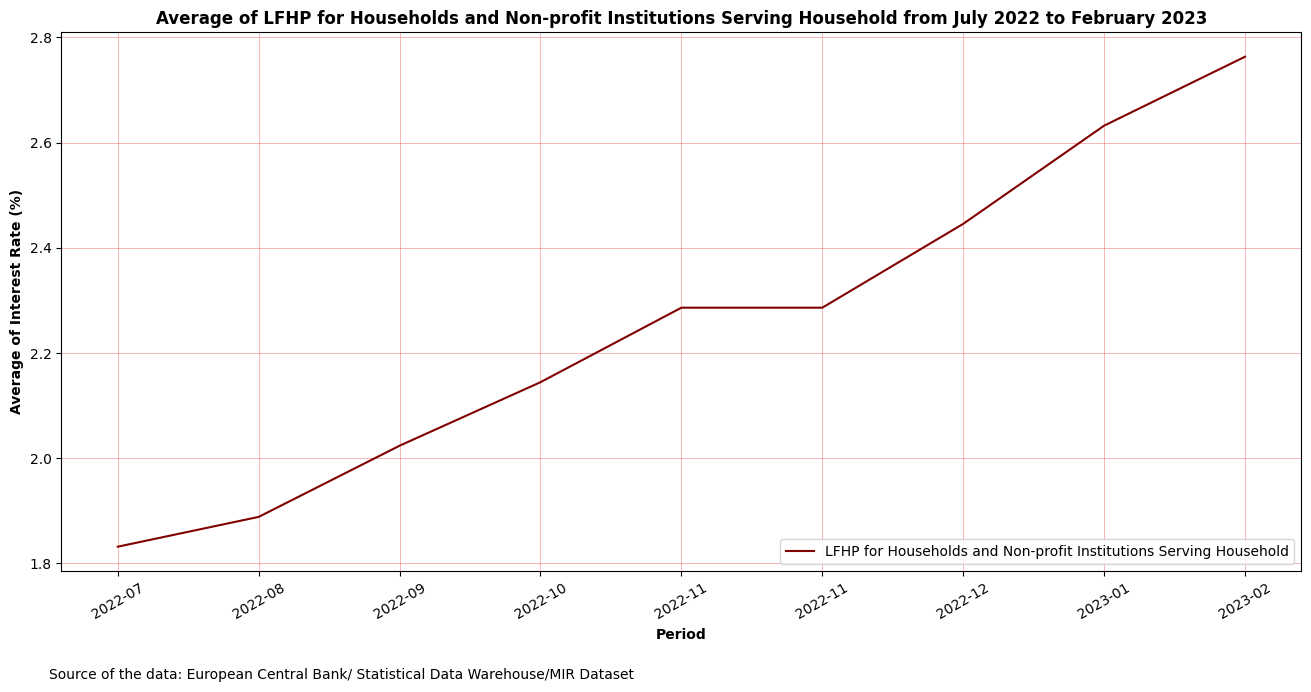

In [29]:
#Increase in Interest Rates since the beginning of the increase in MRO for Households and Non-profit Institutions Serving Households
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_households=(MIR_correlation_MTotal[MIR_correlation_MTotal['BS Counterpart Sector']=='Households and Non-profit Institutions Serving Households'])
MIR_increase_22_23_households=MIR_increase_households[Cols_increase_22_23].mean()

MIR_plot_22_23_households = MIR_increase_22_23_households.plot(color = 'maroon', rot = 30, figsize = (16, 7))
plt.grid(color = 'lightcoral', linewidth = 0.4)
MIR_plot_22_23_households.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform=MIR_plot_22_23_households.transAxes)
MIR_plot_22_23_households.set_title('Average of LFHP for Households and Non-profit Institutions Serving Household from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_plot_22_23_households.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23_households.set_ylabel('Average of Interest Rate (%)', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23_households.legend(['LFHP for Households and Non-profit Institutions Serving Household'], frameon = True, loc = 'lower right')

## *1.4. CREDIT FOR CONSUMPTION OTHER LENDING*

Let's consider the **Credit for Consumption and Other Lending**. 

In [30]:
# CREDIT FOR CONSUMPTION OTHER LENDING
cfcol_df = mir_df[mir_df['Type of Loans'] == 'Credit for Consumption Other Landing']

# describe the data
cfcol_df.describe()

2023-02    2023-01    2022-12    2022-11    2022-10    2022-09  \
count  76.000000  76.000000  76.000000  76.000000  76.000000  76.000000   
mean    7.605000   7.598289   7.385395   7.253947   7.159079   7.015263   
std     7.072725   7.102771   7.131242   7.195678   7.294007   7.361310   
min     2.860000   2.730000   2.520000   2.280000   2.070000   1.830000   
25%     4.425000   4.370000   4.020000   3.895000   3.772500   3.475000   
50%     6.145000   6.325000   5.915000   5.845000   5.745000   5.645000   
75%     8.455000   8.390000   8.092500   7.882500   7.887500   7.775000   
max    60.090000  60.090000  60.090000  60.590000  61.370000  61.790000   

         2022-08    2022-07    2022-06    2022-05  ...    2014-10    2014-09  \
count  76.000000  76.000000  76.000000  76.000000  ...  72.000000  72.000000   
mean    6.837105   6.811184   6.735921   6.762105  ...   6.825556   6.852778   
std     6.979691   7.231508   7.082823   7.168491  ...   3.434753   3.435110   
min     1.690000   1.660000   1.500000   1.460000  ...   2.340000   2.350000   
25%     3.380000   3.337500   3.322500   3.310000  ...   4.825000   4.840000   
50%     5.505000   5.495000   5.480000   5.415000  ...   5.940000   5.940000   
75%     7.785000   7.715000   7.375000   7.585000  ...   7.777500   7.912500   
max    57.890000  60.460000  58.930000  59.680000  ...  19.610000  19.620000   

         2014-08    2014-07    2014-06    2014-05    2014-04    2014-03  \
count  72.000000  72.000000  72.000000  72.000000  72.000000  72.000000   
mean    6.854444   6.867500   6.884722   6.875417   6.872083   6.880556   
std     3.422173   3.434537   3.421133   3.425482   3.398423   3.398935   
min     2.370000   2.380000   2.390000   2.380000   2.360000   2.340000   
25%     4.860000   4.870000   4.907500   4.910000   4.905000   4.912500   
50%     5.905000   5.930000   5.935000   5.900000   5.920000   5.910000   
75%     7.845000   7.977500   8.082500   7.997500   7.982500   8.150000   
max    19.430000  19.560000  19.710000  19.540000  19.290000  19.340000   

        2014-02    2014-01  
count  72.00000  72.000000  
mean    6.89375   6.947639  
std     3.40770   3.649413  
min     2.33000   2.310000  
25%     4.93000   4.870000  
50%     5.89000   5.875000  
75%     8.06250   8.097500  
max    19.20000  22.870000  

[8 rows x 110 columns]

In [31]:
# MEAN
cfcol_mean = cfcol_df.mean()
cfcol_mean = cfcol_mean.iloc[::-1]

<ipython-input-31-61298ac8abe3>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cfcol_mean = cfcol_df.mean()


Let's consider the **maturity** of the loans to inspect whether it has an impact on their behaviour.

<ipython-input-32-860fc74ec2be>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cfcol_mat = cfcol_df.groupby(by = 'Maturity').mean()


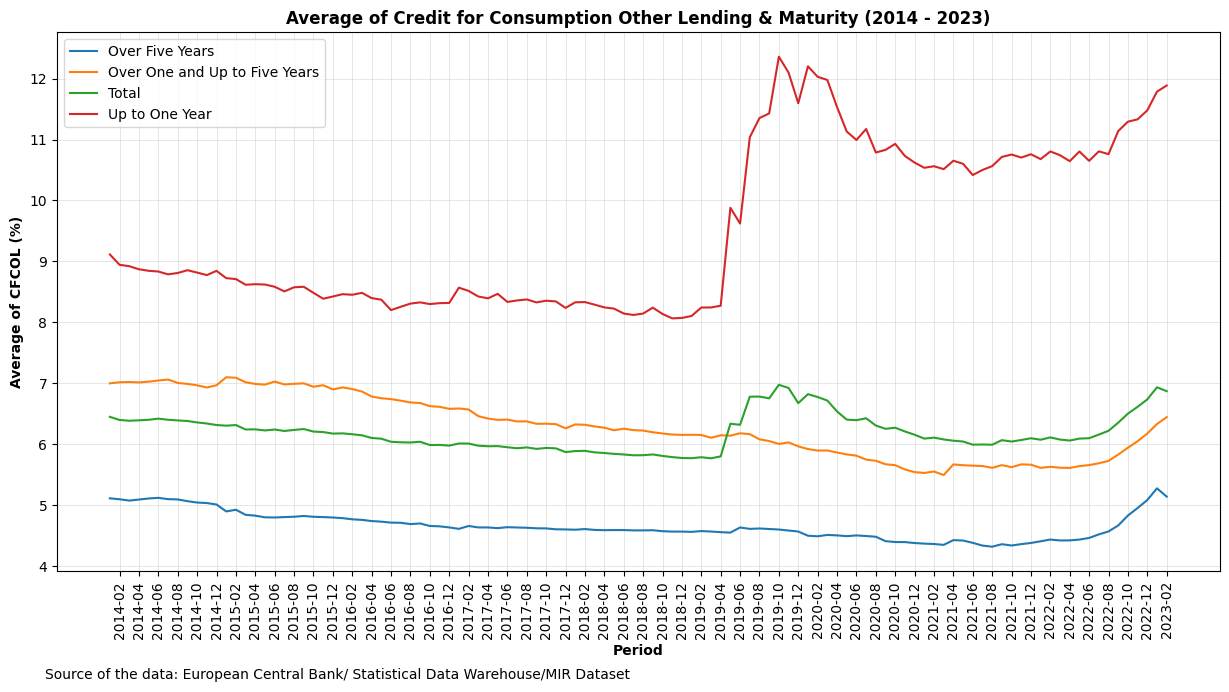

In [32]:
# MATURITY
cfcol_mat = cfcol_df.groupby(by = 'Maturity').mean()
cfcol_mat = cfcol_mat.T
cfcol_mat = cfcol_mat.iloc[::-1]
#cfcol_mat

pl = cfcol_mat.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(cfcol_mat)+1, 2), cfcol_mat.index[1::2])
pl.legend(frameon = True, loc = 'best')
pl.set_title('Average of Credit for Consumption Other Lending & Maturity (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of CFCOL (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
pl.grid(color = 'lightgrey', linewidth = 0.4)

### *1.4.1. MATURITY = TOTAL*

In order to be more objective, let's now consider only the *maturity* up to the ***end*** of the period to inspect whether it has an impact on the average interest rate of loans.

#### A. AVERAGE

<ipython-input-33-15857090f0dc>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cfcol_maturity_total_mean = cfcol_maturity_total.mean()


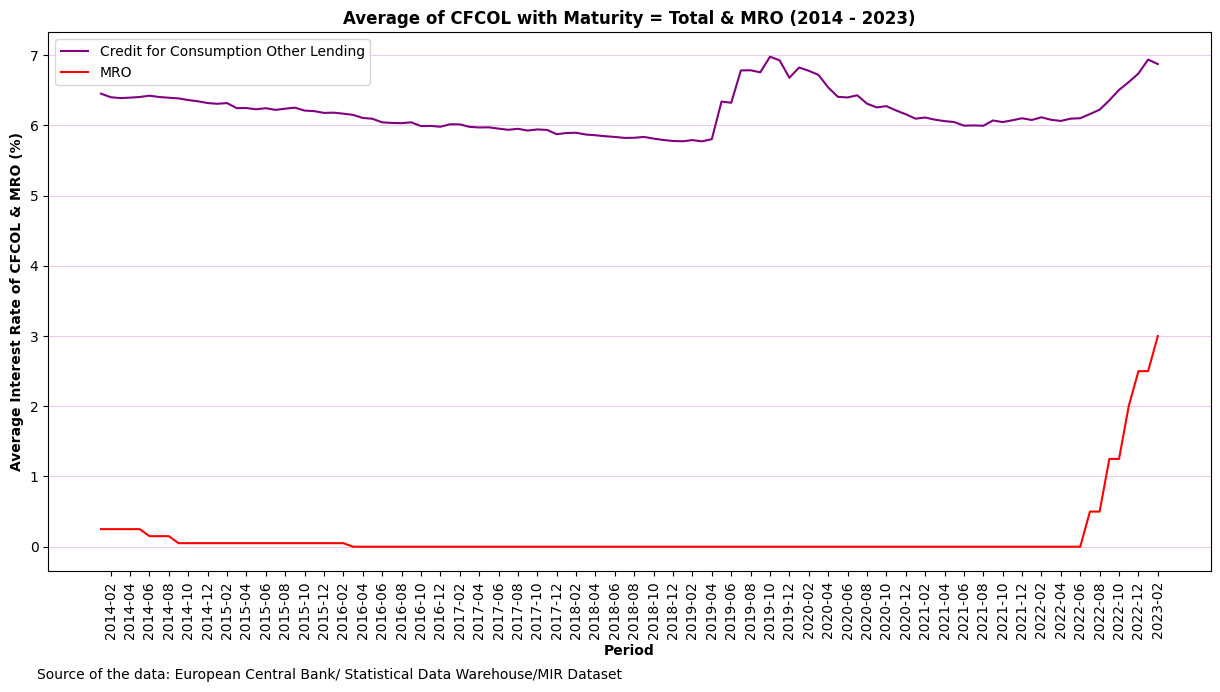

In [33]:
# MEAN, MATURITY = TOTAL, MRO
cfcol_maturity_total = mir_df[(mir_df['Type of Loans'] == 'Credit for Consumption Other Landing') 
                          & (mir_df['Maturity'] == 'Total')]
cfcol_maturity_total_mean = cfcol_maturity_total.mean()
cfcol_maturity_total_mean = cfcol_maturity_total_mean.iloc[::-1]
#cfcol_maturity_total_mean

pl = cfcol_maturity_total_mean.plot(color = 'purple', rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(lfhp_mean)+1, 2), cfcol_mean.index[1::2])
pl.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red')
pl.set_title('Average of CFCOL with Maturity = Total & MRO (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average Interest Rate of CFCOL & MRO (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Credit for Consumption Other Lending', 'MRO'], frameon = True, loc = 'best')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'plum', linewidth = 0.4)

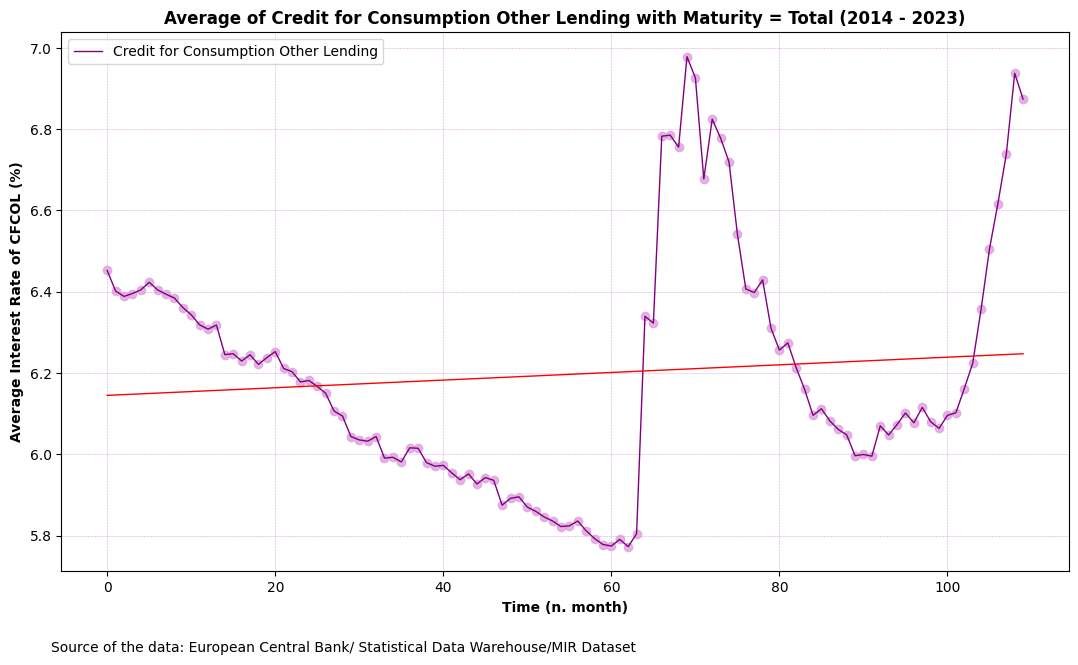

In [34]:
# MEAN & MATURITY = TOTAL
cfcol_maturity_total_mean2 = pd.DataFrame(dict(Mean = cfcol_maturity_total_mean))
cfcol_maturity_total_mean2['Time'] = np.arange(len(cfcol_maturity_total_mean2.index))
#cfcol_maturity_total_mean2

fig, ax = plt.subplots(figsize = (13, 7))
ax.plot('Time', 'Mean', data = cfcol_maturity_total_mean2, color = 'purple', linewidth = 1)
ax = sns.regplot(x = 'Time', y = 'Mean', data = cfcol_maturity_total_mean2, ci = None, scatter_kws = dict(color = 'plum'), line_kws={'color': 'red', 'linewidth' : 1})
ax.set_title('Average of Credit for Consumption Other Lending with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
ax.set_xlabel('Time (n. month)', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('Average Interest Rate of CFCOL (%)', fontweight = 'bold', fontsize = 10)
ax.legend(['Credit for Consumption Other Lending'], frameon = True, loc = 'upper left')
ax.text(-0.01, -0.15, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = ax.transAxes)
plt.grid(color = 'plum', linestyle = '--', linewidth = 0.4)

#### B. SD

<ipython-input-35-cf0eb3ebece4>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cfcol_sd = cfcol_df.std()


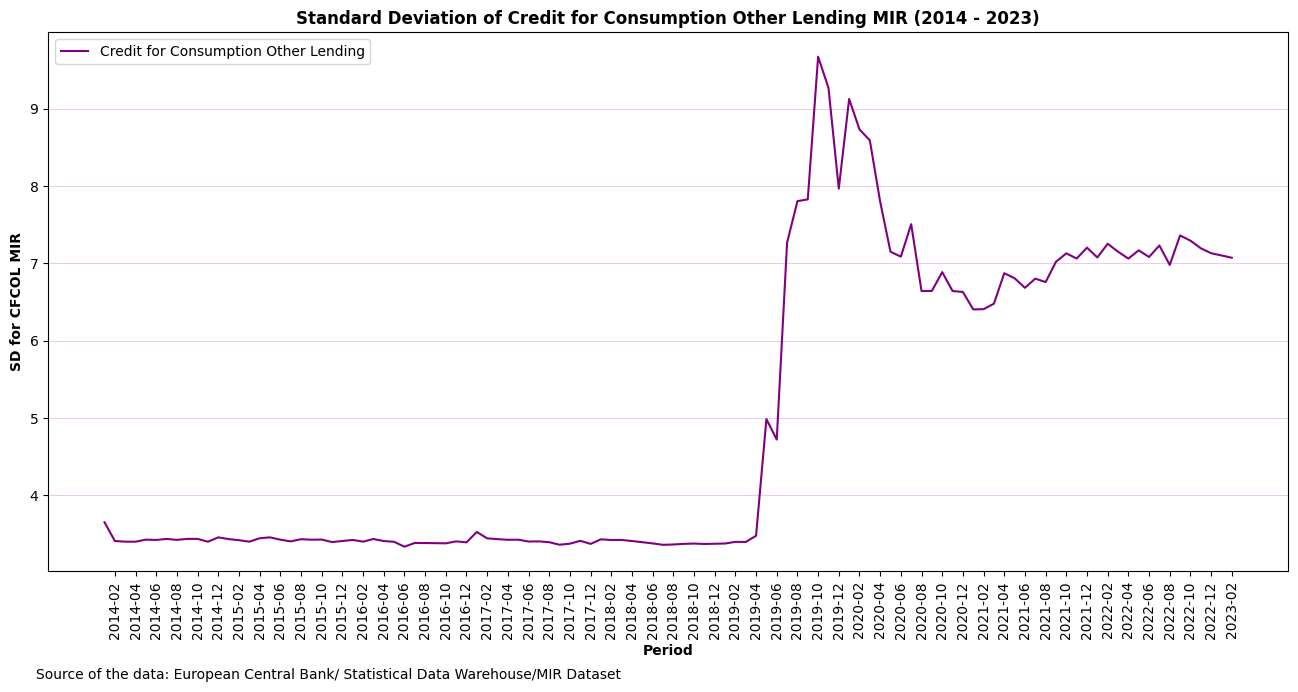

In [35]:
# SD
cfcol_sd = cfcol_df.std()
cfcol_sd = cfcol_sd.iloc[::-1] 

pl = cfcol_sd.plot(color = "purple", rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(cfcol_mean)+1, 2), cfcol_mean.index[1::2])
pl.set_title('Standard Deviation of Credit for Consumption Other Lending MIR (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('SD for CFCOL MIR', fontweight = 'bold', fontsize = 10)
pl.legend(['Credit for Consumption Other Lending'], frameon = True, loc = 'upper left')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'plum', linewidth = 0.4)

#### C. COUNTRY

Let's consider the average interest rate of Loans across **countries** in the Euro - Area, where companies are domiciled. 

<ipython-input-36-7402ca28dd06>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_by_country_cfcol = cfcol_df.groupby(by = cfcol_df['Country']).mean()


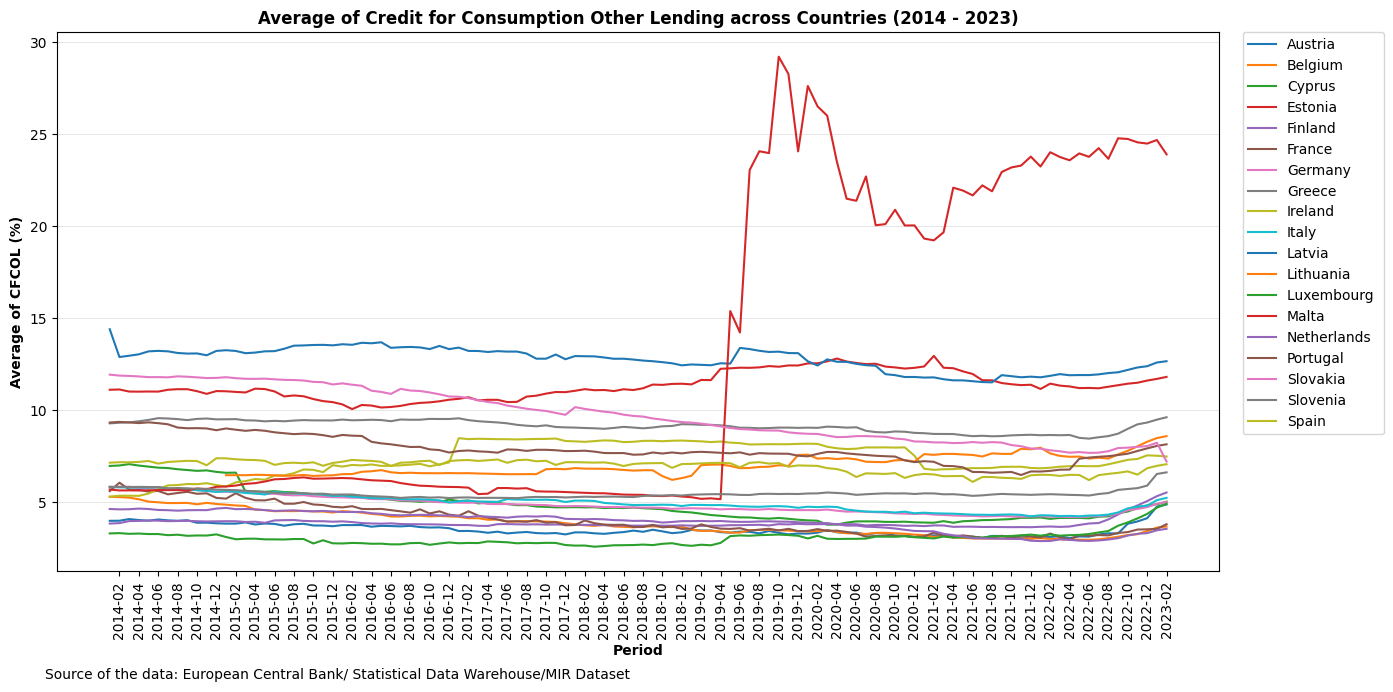

In [36]:
# create the dataset with MIR by country
mir_by_country_cfcol = cfcol_df.groupby(by = cfcol_df['Country']).mean()
mir_by_country_cfcol = mir_by_country_cfcol.iloc[:, ::-1] #change the order of columns
mir_by_country_cfcol = mir_by_country_cfcol.T

# COUNTRY
pl = mir_by_country_cfcol.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(mir_by_country_cfcol)+1, 2), mir_by_country_cfcol.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Average of Credit for Consumption Other Lending across Countries (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of CFCOL (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
pl.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the sake of clarity, we separate each country into a graph.

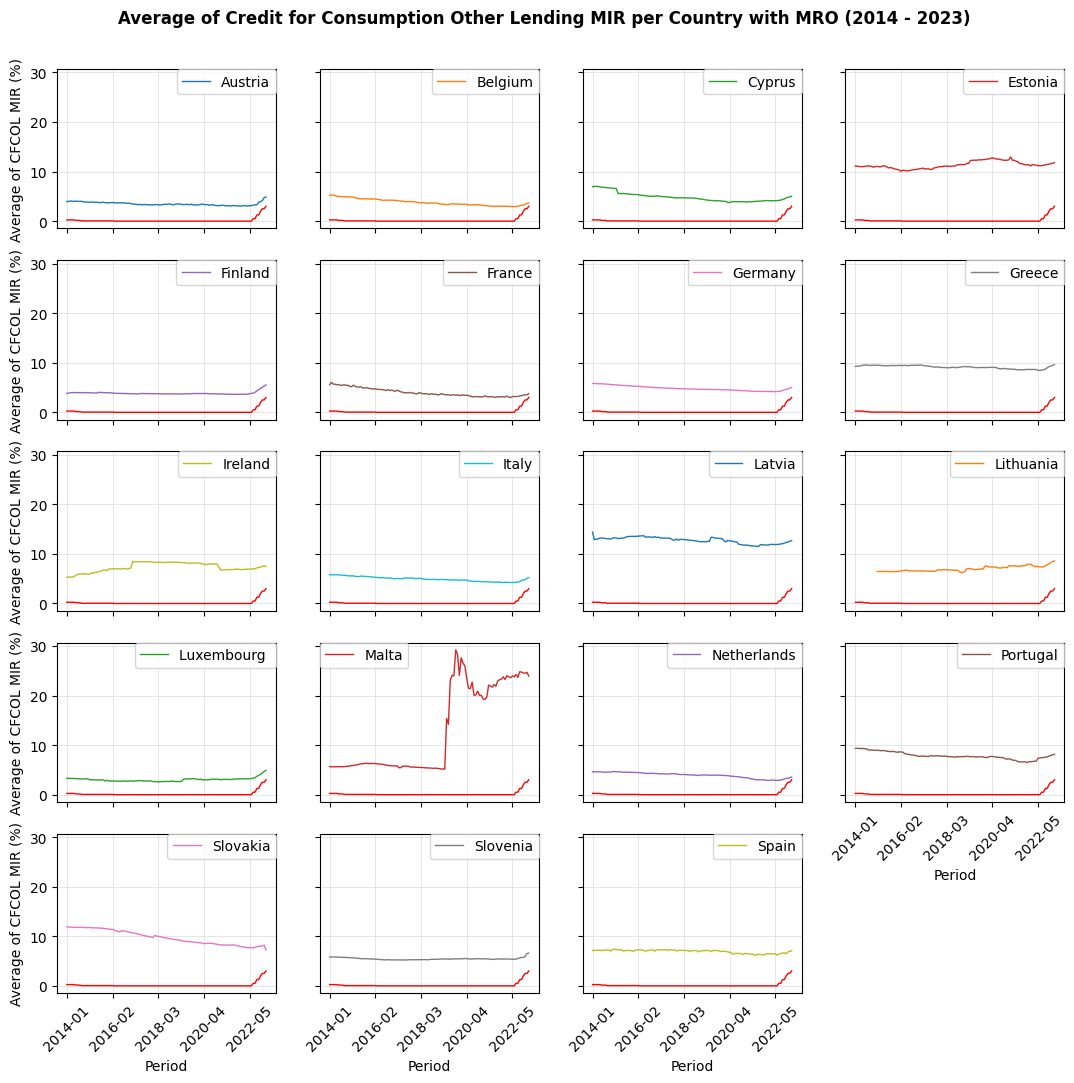

In [37]:
# CFCOL & MRO
mir_by_country_cfcol.plot(subplots = True, layout = (5, 4), figsize = (13, 12), sharey = True,
                    rot = 45,  ylabel = 'Average of CFCOL MIR (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Average of Credit for Consumption Other Lending MIR per Country with MRO (2014 - 2023)", fontsize = 12, fontweight = 'bold', y = 0.93)
for ax in plt.gcf().axes:
    ax.legend(loc='best', borderaxespad = 0)
    ax.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red', linewidth = 1)
    ax.grid(color = 'lightgrey', linewidth = 0.4)

## *1.5. EXTENDED CREDIT*

Let's consider the **Extended Credit**. 

In [38]:
# EXTENDED CREDIT
ec_df = mir_df[mir_df['Type of Loans'] == 'Extended Credit']

# describe the data
ec_df.describe()

2023-02    2023-01    2022-12    2022-11    2022-10    2022-09  \
count  27.000000  27.000000  27.000000  27.000000  27.000000  27.000000   
mean   15.062593  15.131481  15.019630  14.925926  14.957407  14.909630   
std     3.853339   3.940220   3.944208   4.067741   4.106464   4.123408   
min     8.020000   8.050000   7.930000   7.930000   7.920000   7.920000   
25%    11.545000  11.500000  11.345000  11.200000  11.200000  11.180000   
50%    16.050000  15.980000  15.830000  15.780000  15.910000  15.810000   
75%    18.000000  17.980000  17.940000  17.970000  18.005000  18.105000   
max    21.630000  21.970000  21.910000  21.920000  21.970000  21.960000   

         2022-08    2022-07    2022-06    2022-05  ...    2014-10    2014-09  \
count  27.000000  27.000000  27.000000  27.000000  ...  25.000000  25.000000   
mean   14.931111  14.906296  14.888519  14.877778  ...  15.109200  15.166000   
std     4.178582   4.213875   4.206719   4.203287  ...   5.109881   5.110074   
min     7.920000   7.920000   7.670000   7.670000  ...   7.330000   7.420000   
25%    11.205000  11.185000  11.155000  11.155000  ...  10.900000  10.910000   
50%    15.830000  15.860000  15.810000  15.920000  ...  15.440000  15.430000   
75%    18.105000  18.205000  18.145000  17.990000  ...  18.150000  18.040000   
max    22.020000  22.060000  22.280000  22.290000  ...  23.790000  23.730000   

         2014-08    2014-07    2014-06    2014-05    2014-04    2014-03  \
count  25.000000  24.000000  25.000000  25.000000  24.000000  25.000000   
mean   15.176000  15.011667  15.216800  15.137600  15.054167  15.155600   
std     5.097073   5.211648   5.138064   5.133861   5.199962   5.091813   
min     7.460000   7.160000   7.140000   7.280000   7.090000   7.100000   
25%    10.910000  10.800000  10.920000  10.930000  10.795000  10.960000   
50%    15.460000  15.240000  15.530000  15.520000  15.250000  15.090000   
75%    18.060000  18.642500  18.200000  18.380000  18.895000  18.370000   
max    23.740000  23.780000  23.760000  23.820000  23.810000  23.860000   

         2014-02    2014-01  
count  25.000000  25.000000  
mean   15.268000  15.108000  
std     5.194802   5.211454  
min     7.300000   7.280000  
25%    10.940000  10.950000  
50%    15.090000  15.090000  
75%    18.570000  18.600000  
max    24.450000  24.040000  

[8 rows x 110 columns]

In [39]:
# MEAN
ec_mean = ec_df.mean()
ec_mean = ec_mean.iloc[::-1]

<ipython-input-39-5f52fc9eef87>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ec_mean = ec_df.mean()


Let's consider the **maturity** of the loans to inspect whether it has an impact on their behaviour.

<ipython-input-40-9159c2f1dca4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ec_mat = ec_df.groupby(by = 'Maturity').mean()


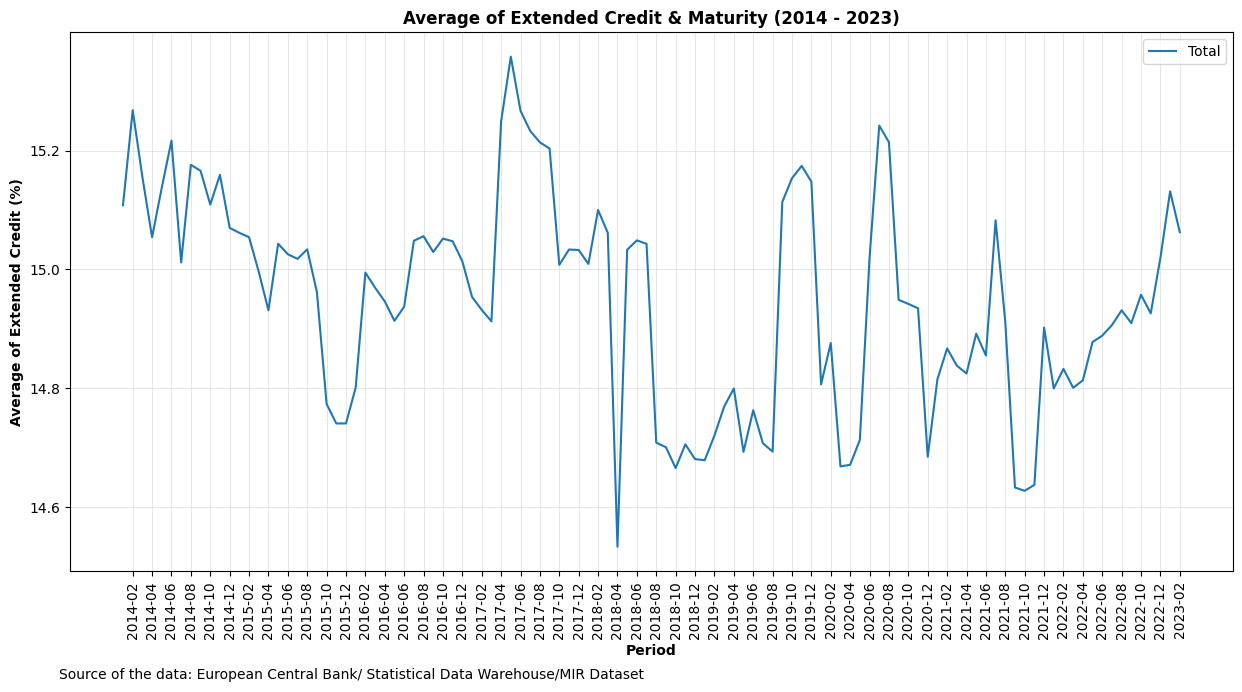

In [40]:
# MATURITY
ec_mat = ec_df.groupby(by = 'Maturity').mean()
ec_mat = ec_mat.T
ec_mat = ec_mat.iloc[::-1]
#ec_mat

pl = ec_mat.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(ec_mat)+1, 2), ec_mat.index[1::2])
pl.legend(frameon = True, loc = 'best')
pl.set_title('Average of Extended Credit & Maturity (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Extended Credit (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
pl.grid(color = 'lightgrey', linewidth = 0.4)

### *1.5.1. MATURITY = TOTAL*

In order to be more objective, let's now consider only the *maturity* up to the ***end*** of the period to inspect whether it has an impact on the average interest rate of loans.

#### A. AVERAGE

<ipython-input-41-2006ef8afa9b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ec_maturity_total_mean = ec_maturity_total.mean()


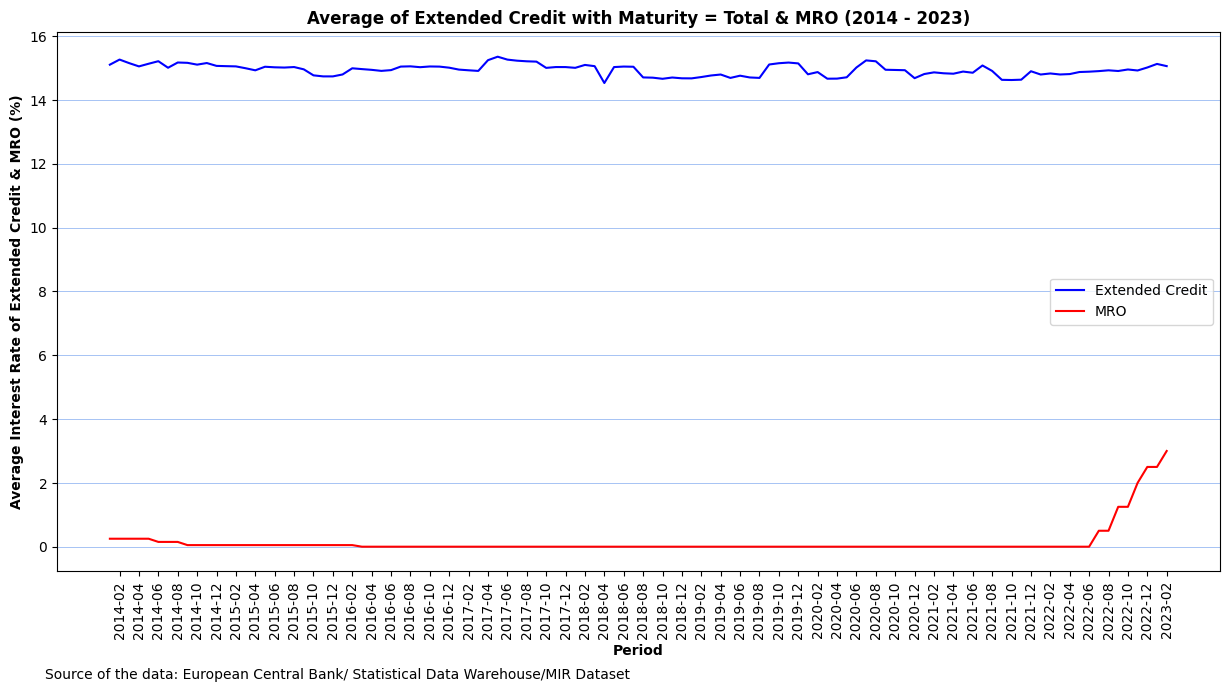

In [41]:
# MEAN, MATURITY = TOTAL, MRO
ec_maturity_total = mir_df[(mir_df['Type of Loans'] == 'Extended Credit') 
                          & (mir_df['Maturity'] == 'Total')]
ec_maturity_total_mean = ec_maturity_total.mean()
ec_maturity_total_mean = ec_maturity_total_mean.iloc[::-1]
#ec_maturity_total_mean

pl = ec_maturity_total_mean.plot(color = 'blue', rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(ec_mean)+1, 2), ec_mean.index[1::2])
pl.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red')
pl.set_title('Average of Extended Credit with Maturity = Total & MRO (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average Interest Rate of Extended Credit & MRO (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Extended Credit', 'MRO'], frameon = True, loc = 'best')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'cornflowerblue', linewidth = 0.4)

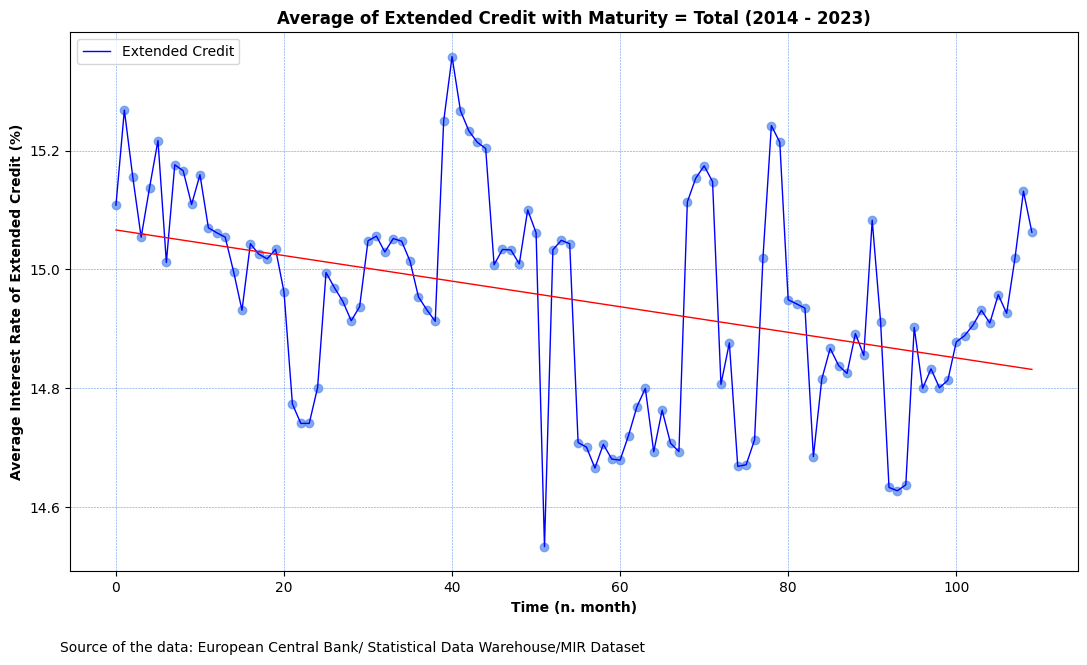

In [42]:
# MEAN & MATURITY = TOTAL
ec_maturity_total_mean2 = pd.DataFrame(dict(Mean = ec_maturity_total_mean))
ec_maturity_total_mean2['Time'] = np.arange(len(ec_maturity_total_mean2.index))
#ec_maturity_total_mean2

fig, ax = plt.subplots(figsize = (13, 7))
ax.plot('Time', 'Mean', data = ec_maturity_total_mean2, color = 'blue', linewidth = 1)
ax = sns.regplot(x = 'Time', y = 'Mean', data = ec_maturity_total_mean2, ci = None, scatter_kws = dict(color = 'cornflowerblue'), line_kws={'color': 'red', 'linewidth' : 1})
ax.set_title('Average of Extended Credit with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
ax.set_xlabel('Time (n. month)', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('Average Interest Rate of Extended Credit (%)', fontweight = 'bold', fontsize = 10)
ax.legend(['Extended Credit'], frameon = True, loc = 'upper left')
ax.text(-0.01, -0.15, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = ax.transAxes)
plt.grid(color = 'cornflowerblue', linestyle = '--', linewidth = 0.4)

#### B. SD

<ipython-input-43-786be5aaeff3>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ec_sd = ec_df.std()


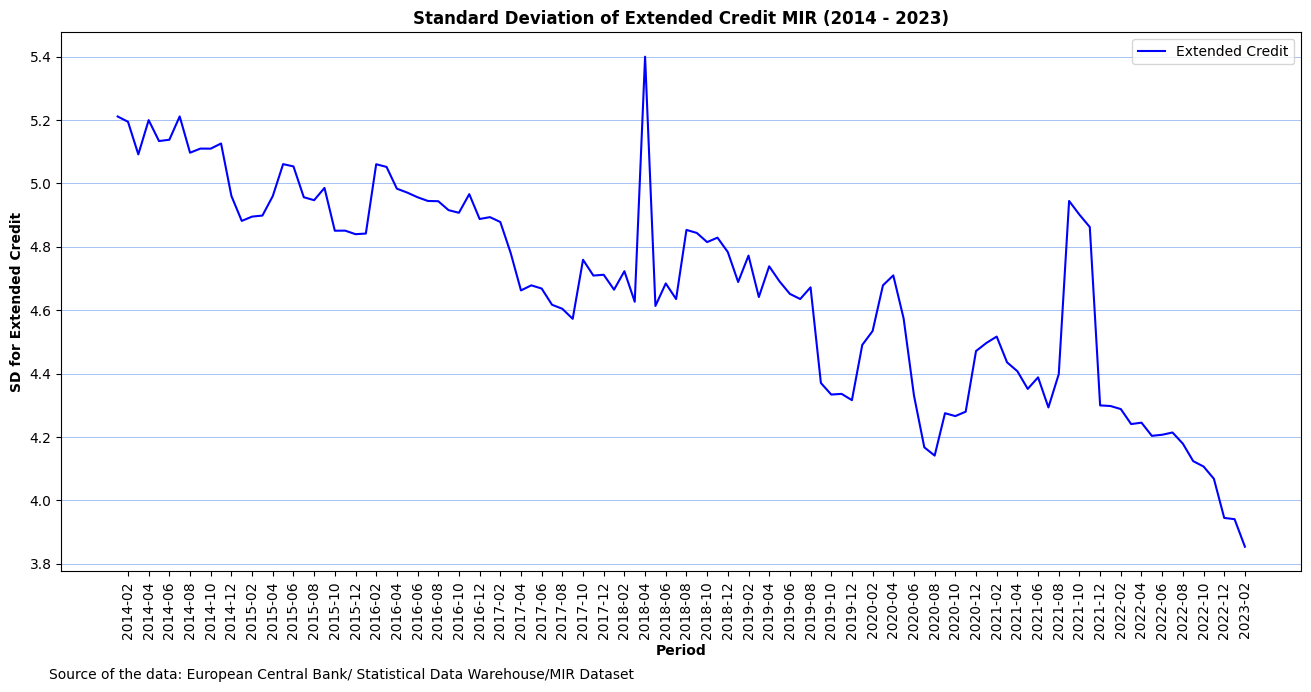

In [43]:
# SD
ec_sd = ec_df.std()
ec_sd = ec_sd.iloc[::-1] 

pl = ec_sd.plot(color = "blue", rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(ec_mean)+1, 2), ec_mean.index[1::2])
pl.set_title('Standard Deviation of Extended Credit MIR (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('SD for Extended Credit', fontweight = 'bold', fontsize = 10)
pl.legend(['Extended Credit'], frameon = True, loc = 'upper right')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'cornflowerblue', linewidth = 0.4)

#### C. COUNTRY

Let's consider the average interest rate of Loans across **countries** in the Euro - Area, where companies are domiciled. 

<ipython-input-44-36e95c1bd23e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_by_country_ec = ec_df.groupby(by = ec_df['Country']).mean()


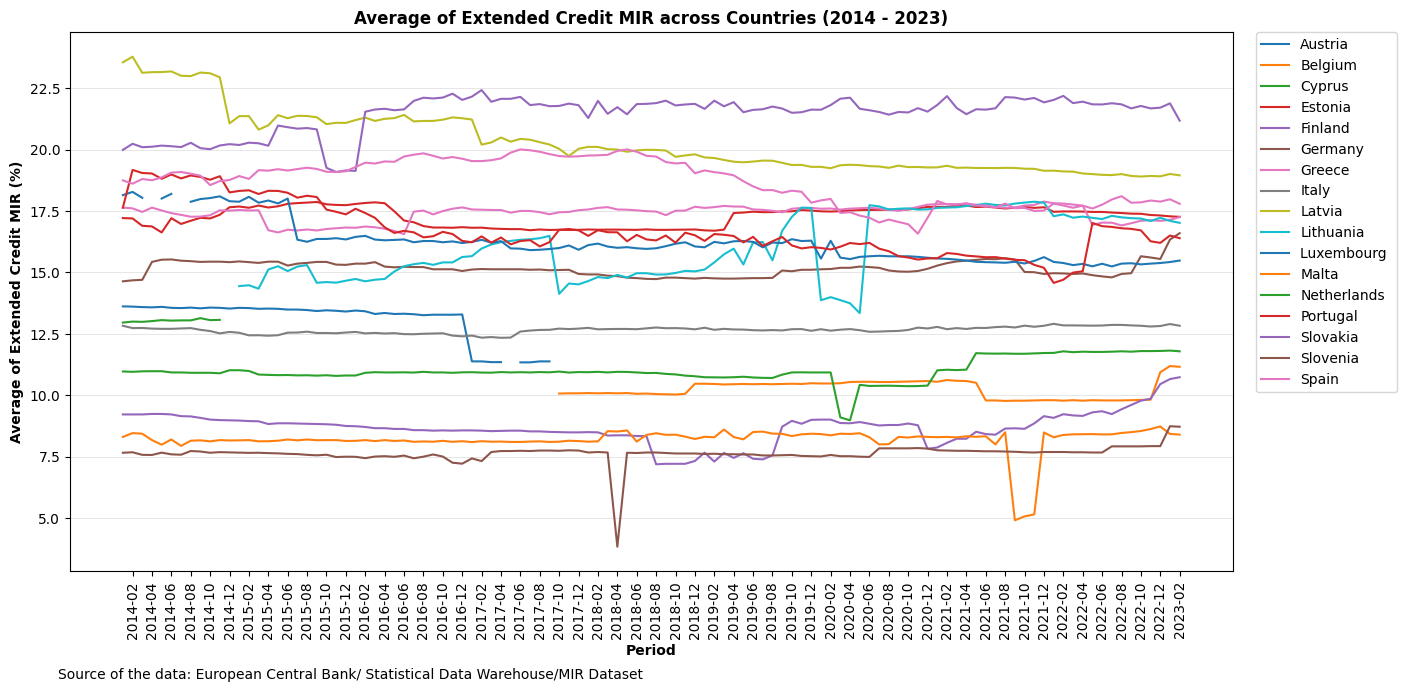

In [44]:
# create the dataset with MIR by country
mir_by_country_ec = ec_df.groupby(by = ec_df['Country']).mean()
mir_by_country_ec = mir_by_country_ec.iloc[:, ::-1] #change the order of columns
mir_by_country_ec = mir_by_country_ec.T

# COUNTRY
pl = mir_by_country_ec.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(mir_by_country_ec)+1, 2), mir_by_country_ec.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Average of Extended Credit MIR across Countries (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Extended Credit MIR (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
pl.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the sake of clarity, we separate each country into a graph.

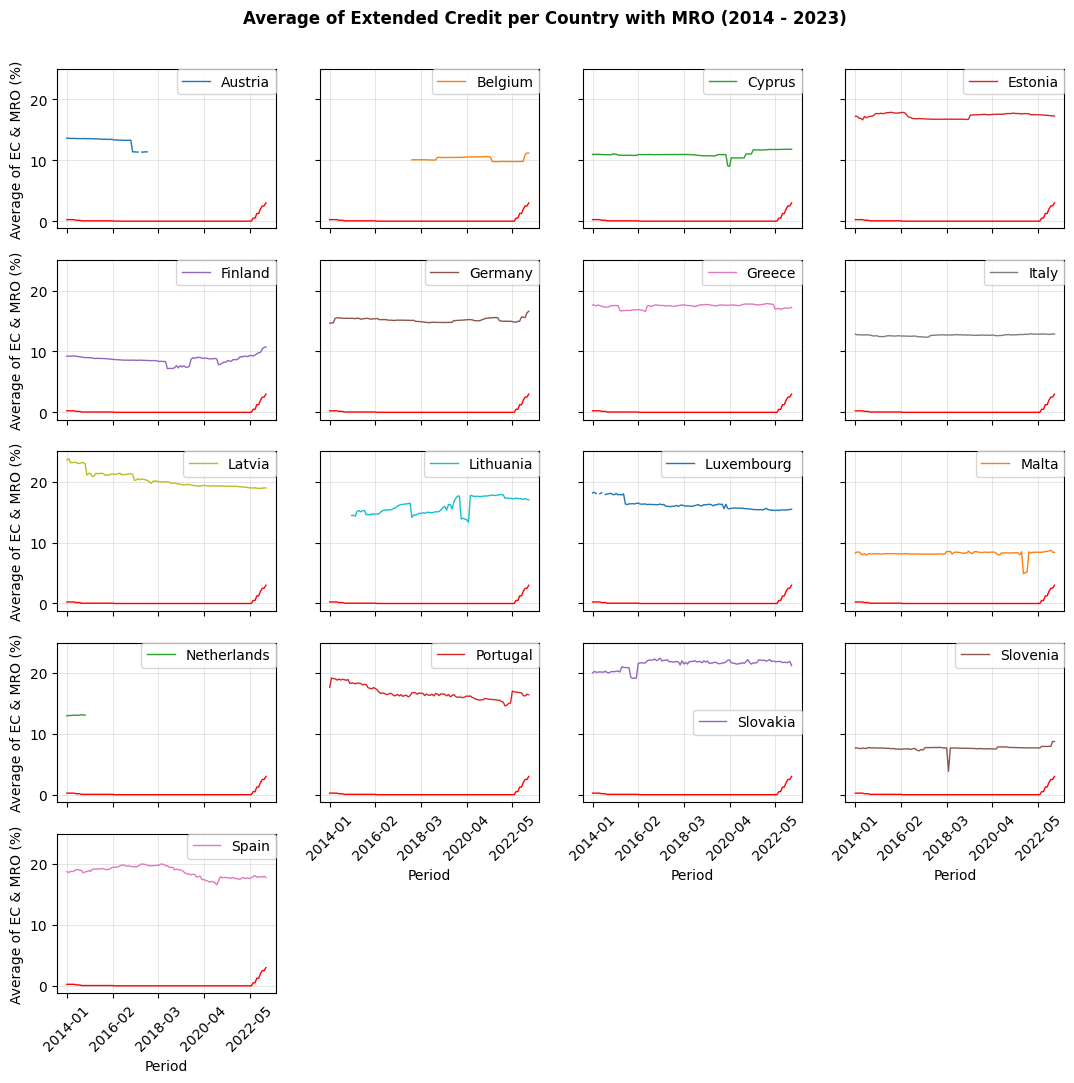

In [45]:
# EC & MRO
mir_by_country_ec.plot(subplots = True, layout = (5, 4), figsize = (13, 12), sharey = True,
                    rot = 45,  ylabel = 'Average of EC & MRO (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Average of Extended Credit per Country with MRO (2014 - 2023)", fontsize = 12, fontweight = 'bold', y = 0.93)
for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.plot(full_mro_df['Date'], full_mro_df['MRO'], color = 'red', linewidth = 1)
    ax.grid(color = 'lightgrey', linewidth = 0.4)

### *1.5.2. HIGHLIGHTS*

In [46]:
Cols = ['2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09']

MIR_correlation = (mir_df[mir_df['Type of Loans'] == 'Extended Credit'])
MIR_correlation_MTotal = (MIR_correlation[MIR_correlation['Maturity'] == 'Total'])

Mean_MIR_23_22 = MIR_correlation_MTotal[Cols].mean()

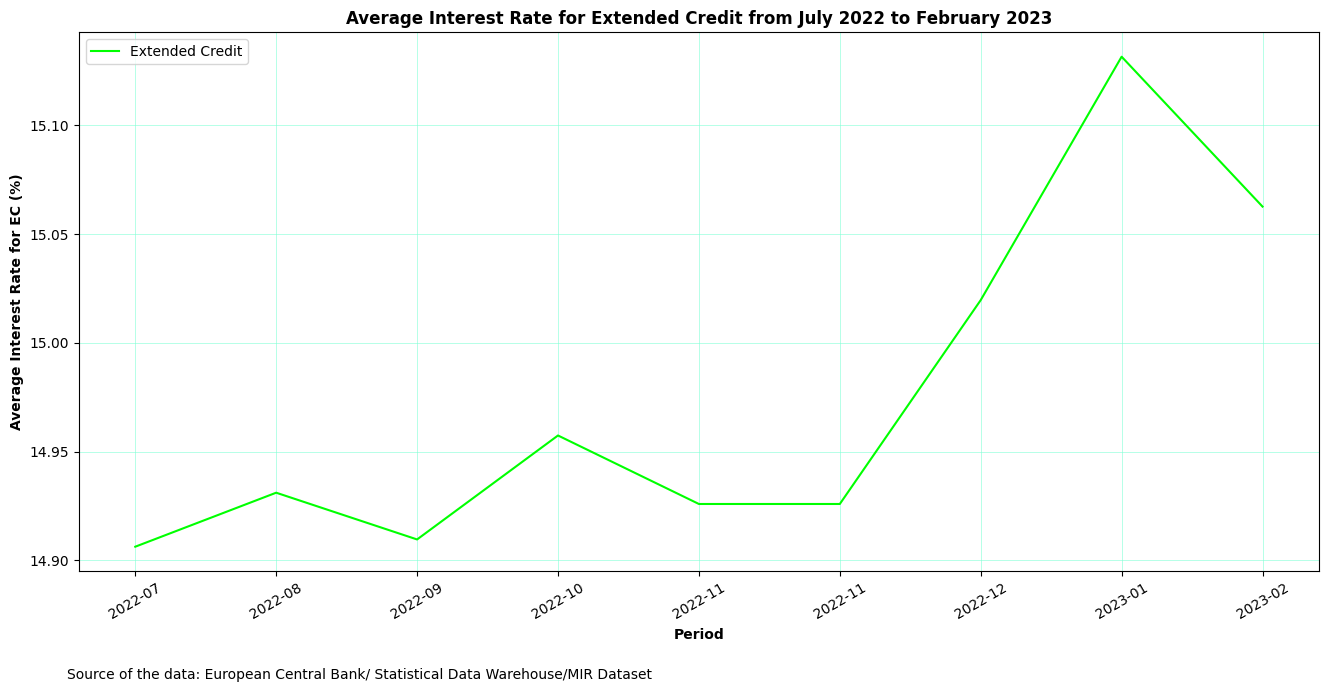

In [47]:
#Increase in Interest Rates since the beginning of the increase in MRO 
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_22_23_plot = MIR_correlation_MTotal[Cols_increase_22_23].mean()
MIR_plot_22_23 = MIR_increase_22_23_plot.plot(color = 'lime', rot = 30, figsize = (16, 7))
plt.grid(color = 'aquamarine', linewidth = 0.4)
MIR_plot_22_23.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = MIR_plot_22_23.transAxes)
MIR_plot_22_23.set_title('Average Interest Rate for Extended Credit from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_plot_22_23.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23.set_ylabel('Average Interest Rate for EC (%)', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23.legend(['Extended Credit'], frameon = True, loc = 'upper left') 

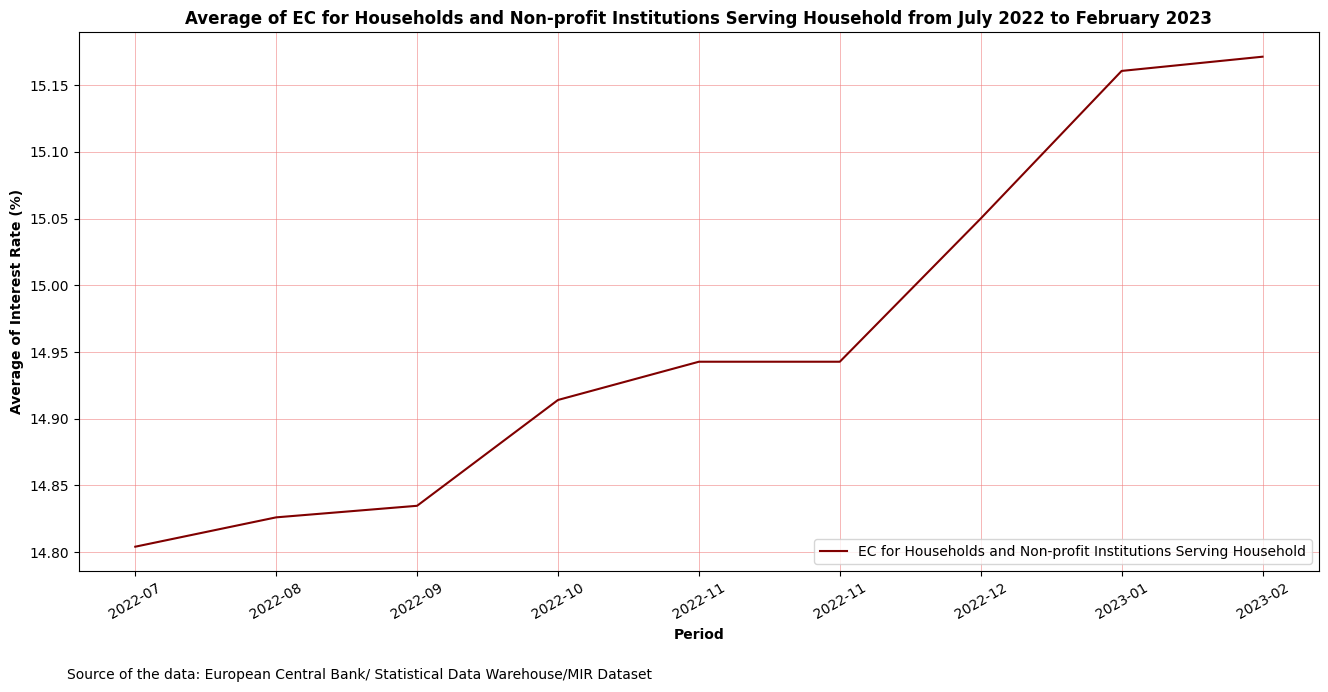

In [48]:
#Increase in Interest Rates since the beginning of the increase in MRO for Households and Non-profit Institutions Serving Households
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_households=(MIR_correlation_MTotal[MIR_correlation_MTotal['BS Counterpart Sector']=='Households and Non-profit Institutions Serving Households'])
MIR_increase_22_23_households=MIR_increase_households[Cols_increase_22_23].mean()

MIR_plot_22_23_households = MIR_increase_22_23_households.plot(color = 'maroon', rot = 30, figsize = (16, 7))
plt.grid(color = 'lightcoral', linewidth = 0.4)
MIR_plot_22_23_households.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform=MIR_plot_22_23_households.transAxes)
MIR_plot_22_23_households.set_title('Average of EC for Households and Non-profit Institutions Serving Household from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_plot_22_23_households.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23_households.set_ylabel('Average of Interest Rate (%)', fontweight = 'bold', fontsize = 10)
MIR_plot_22_23_households.legend(['EC for Households and Non-profit Institutions Serving Household'], frameon = True, loc = 'lower right')

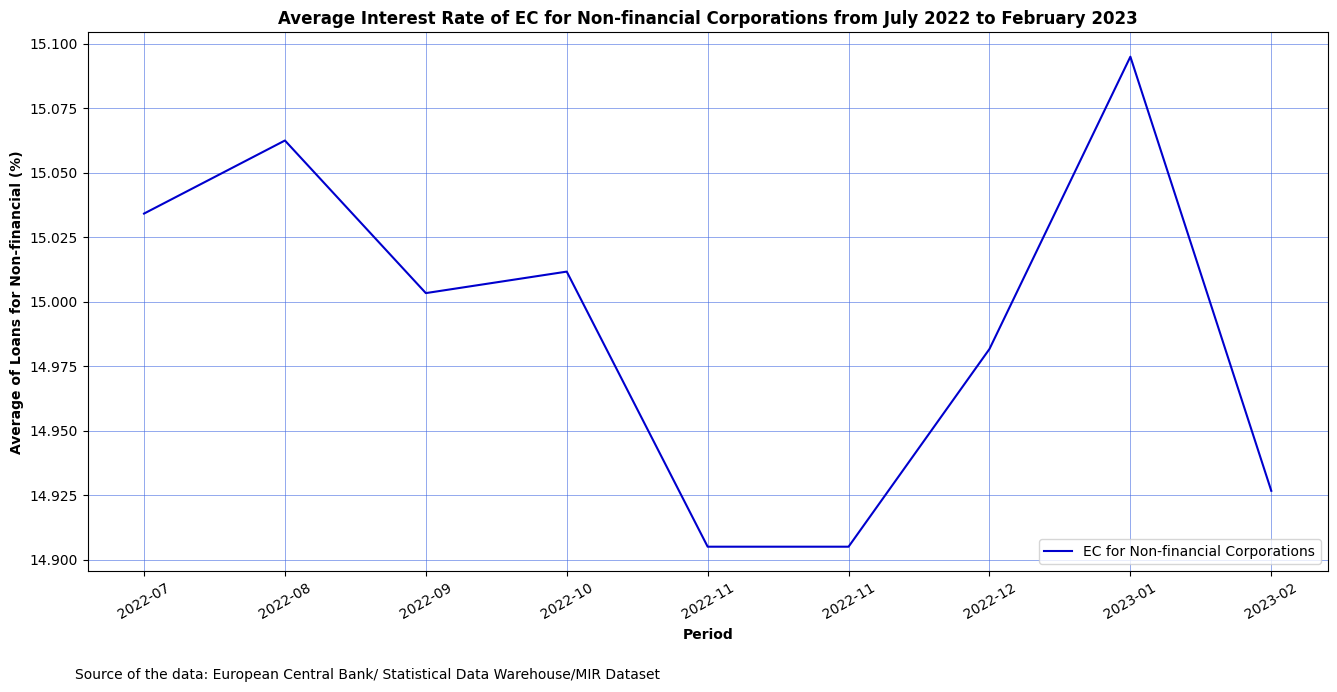

In [49]:
#Increase in Interest Rates since the beginning of the increase in MRO for Non-financial Corporations
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
MIR_increase_NonFincial_Corporations=(MIR_correlation_MTotal[MIR_correlation_MTotal['BS Counterpart Sector']=='Non-financial Corporations'])
MIR_increase_NonFincial_Corporations_22_23=MIR_increase_NonFincial_Corporations[Cols_increase_22_23].mean()
MIR_increase_NonFincial_Corporations_22_23_plot=MIR_increase_NonFincial_Corporations_22_23.plot(color = 'mediumblue', rot = 30, figsize = (16, 7))
plt.grid(color = 'royalblue', linewidth = 0.4)
MIR_increase_NonFincial_Corporations_22_23_plot.text(-0.01,-0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform=MIR_increase_NonFincial_Corporations_22_23_plot.transAxes)
MIR_increase_NonFincial_Corporations_22_23_plot.set_title('Average Interest Rate of EC for Non-financial Corporations from July 2022 to February 2023', fontweight = 'bold', fontsize = 12)
MIR_increase_NonFincial_Corporations_22_23_plot.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
MIR_increase_NonFincial_Corporations_22_23_plot.set_ylabel('Average of Loans for Non-financial (%)', fontweight = 'bold', fontsize = 10)
MIR_increase_NonFincial_Corporations_22_23_plot.legend(['EC for Non-financial Corporations'], frameon = True, loc = 'lower right')

# **2. BSI**
**BSI statistics** are based on either the *aggregated* or the *consolidated* balance sheet of the monetary financial institutions (MFIs) sector. The aggregated balance sheet is the sum of the balance sheets of all MFIs resident in the Euro Area. The consolidated balance sheet is obtained by netting the aggregated balance sheet positions between MFIs in the Euro Area. The consolidated balance sheet provides the basis for the regular analysis of Euro Area ***monetary*** *aggregates* and *counterparts*.

The majority of BSI dataset consists of continuous attributes (about 95.65%), representing the monthly stock data collected from 2014-01 to 2023-02. The remaining features (about 4.35%) refer to:

*   ***Country*** in the Euro Area, where company is domiciled;
*   ***Type of Loans***, describing the different financial instruments composition; 
*   ***Maturity***, the date on which the term of the loan expires;
*   ***Data Type***, making a distintion between the Outstanding amounts at the end of the period (stocks) and the Financial transactions (flows);
*   ***BS Counterpart Sector***, revealing the sector in which the institutions are involved in.
 

Regarding the financial instruments composition of the BSI dataset, we decide to include the same types of Loans collected in the previous one. 

In [50]:
bsi_out = bsi_df[bsi_df['Data type'] == 'Outstanding amounts at the end of the period (stocks)']

## *2.1. GENERIC*

In [51]:
bsi_by_loans = bsi_df.groupby(['Type of Loans']).mean()
bsi_by_loans = bsi_by_loans.iloc[:, ::-1]
bsi_by_loans = bsi_by_loans.T
#bsi_by_loans

<ipython-input-51-55920ecb2a7d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_by_loans = bsi_df.groupby(['Type of Loans']).mean()


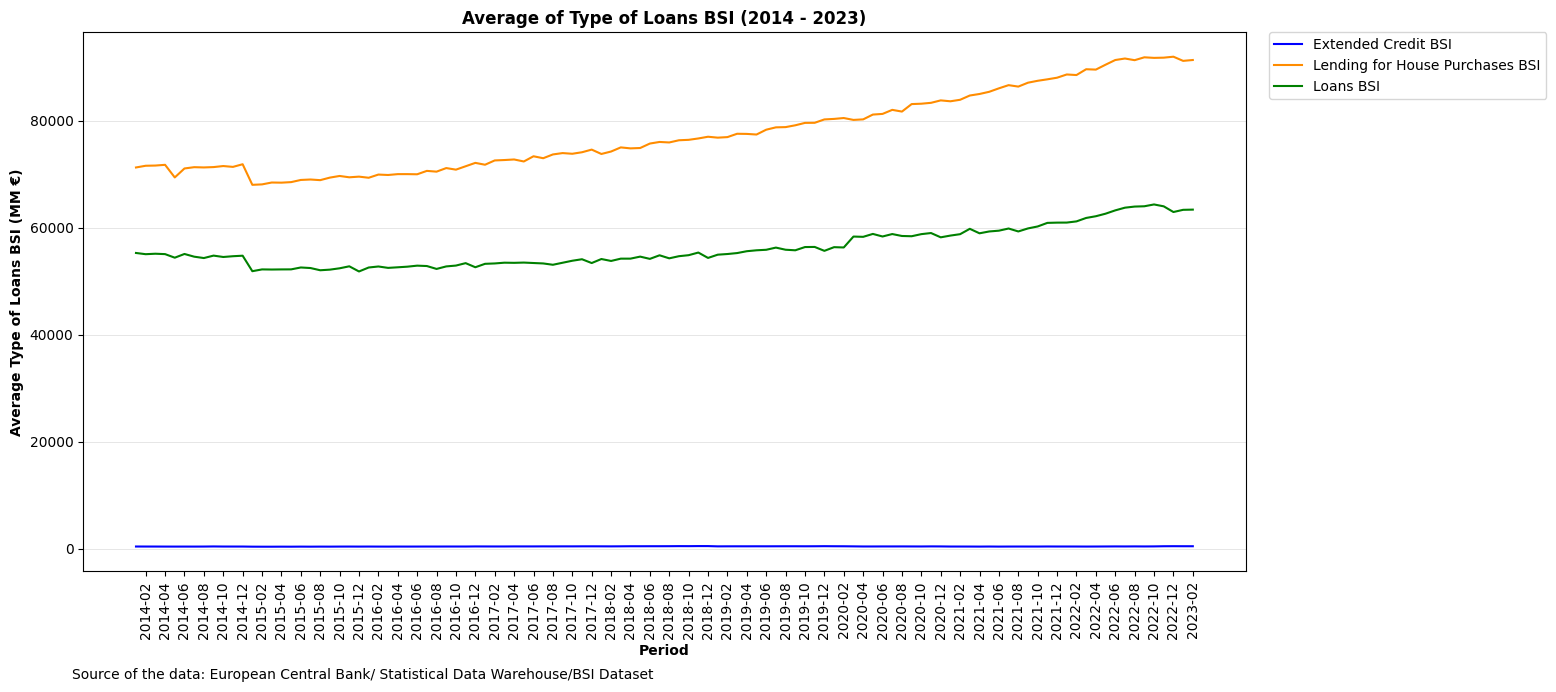

In [52]:
# MEAN
pl = bsi_by_loans.plot(color = ('blue', 'darkorange', 'green'), rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(bsi_by_loans)+1, 2), bsi_by_loans.index[1::2])
pl.set_title('Average of Type of Loans BSI (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average Type of Loans BSI (MM €)', fontweight = 'bold', fontsize = 10)
pl.legend(['Extended Credit BSI', 'Lending for House Purchases BSI', 'Loans BSI'], bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

## *2.2. LOANS*

Let's consider **Loans**.

In [53]:
# LOANS
loans_df2 = bsi_df[bsi_df['Type of Loans'] == 'Loans']
loans_df3 = loans_df2[loans_df2['Data type'] =='Outstanding amounts at the end of the period (stocks)']
loans_df4 = loans_df3[loans_df3['Maturity'] =='Total']
loans_df5 = loans_df3[loans_df3['Maturity'] =='Over One and Up to Five Years']

# describe the data
loans_df2.describe()

2023-02       2023-01       2022-12       2022-11       2022-10  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   6.338242e+04  6.334415e+04  6.293403e+04  6.399748e+04  6.434848e+04   
std    2.295825e+05  2.294851e+05  2.295946e+05  2.301042e+05  2.296397e+05   
min   -4.861519e+03 -8.241376e+03 -2.269302e+04 -5.709175e+03 -8.672073e+03   
25%   -5.673398e+01 -6.527384e+01 -1.989062e+01 -1.291598e+01  3.282131e+00   
50%    1.846221e+02  1.061227e+02  1.212572e+02  2.420942e+02  6.046120e+02   
75%    1.067725e+04  1.130807e+04  1.121334e+04  1.147875e+04  1.251139e+04   
max    2.024036e+06  2.022079e+06  2.024303e+06  2.023022e+06  2.019687e+06   

            2022-09       2022-08       2022-07       2022-06       2022-05  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   6.400827e+04  6.395158e+04  6.374520e+04  6.324123e+04  6.262126e+04   
std    2.285438e+05  2.274552e+05  2.262188e+05  2.243799e+05  2.228857e+05   
min   -3.013890e+03 -6.031516e+03 -7.756373e+03 -6.230186e+03 -1.950102e+03   
25%    1.023853e+01  2.863537e+01  4.314858e+01  6.561256e+01  4.425871e+01   
50%    4.722707e+02  7.829258e+02  8.108772e+02  1.222080e+03  8.404118e+02   
75%    1.127292e+04  1.220731e+04  1.228984e+04  1.216860e+04  1.115624e+04   
max    2.015090e+06  2.007936e+06  1.999346e+06  1.987920e+06  1.978862e+06   

       ...       2014-10       2014-09       2014-08       2014-07  \
count  ...  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean   ...  5.452865e+04  5.478551e+04  5.432913e+04  5.458695e+04   
std    ...  1.779264e+05  1.779169e+05  1.777303e+05  1.780075e+05   
min    ... -5.434231e+03 -4.091143e+03 -1.157145e+04 -8.305655e+03   
25%    ... -5.138239e+01 -1.943186e+01 -6.416406e+01 -5.934635e+01   
50%    ...  1.871859e+02  2.630652e+02  8.490486e+01  1.111774e+02   
75%    ...  1.360600e+04  1.354100e+04  1.375450e+04  1.377500e+04   
max    ...  1.486123e+06  1.483061e+06  1.479529e+06  1.475590e+06   

            2014-06       2014-05       2014-04       2014-03       2014-02  \
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean   5.509189e+04  5.439682e+04  5.506339e+04  5.513840e+04  5.505057e+04   
std    1.779387e+05  1.779083e+05  1.788136e+05  1.788239e+05  1.790116e+05   
min   -7.134317e+03 -4.298883e+04 -4.148615e+03 -5.196386e+03 -6.217422e+03   
25%   -2.232962e+01 -6.367105e+01 -4.791155e+01 -1.300632e+01 -3.258581e+01   
50%    3.235627e+02  1.170082e+02  1.538782e+02  2.264416e+02  1.472437e+02   
75%    1.410000e+04  1.414071e+04  1.414506e+04  1.408333e+04  1.417445e+04   
max    1.473149e+06  1.469715e+06  1.468091e+06  1.466481e+06  1.464824e+06   

            2014-01  
count  2.520000e+02  
mean   5.527889e+04  
std    1.794083e+05  
min   -6.423017e+03  
25%   -9.173233e+01  
50%    1.000575e+02  
75%    1.432690e+04  
max    1.463318e+06  

[8 rows x 110 columns]

In 2022 we see the beginning of a period of a gradual increase in the MRO (Main Refinancing Operation) after a long period of MRO=0%. The first change to the interest rate (MRO) was made on 2022-07-27.



With the objective to visualize the transmission of the monetary policy (the increase in MRO) we decided to run a correlation analysis by using the Outstanding amount of loans (from the balance sheet of the MFIs) and the change in the interest rates set by the MFIs. The idea of the analysis is to see if the increase in MIR(the interest rates set by the MFIs) leads to a decrease in the Outstanding amount at the end of the period. 

After taking a glips of the dataset we see a rather monotonous correlation, therefore we decided to run both the Spearman’s rank correlation (to see the monotonous correlation) and the Pearson’s correlation coefficient (to see if there is a linear correlation). 

BSI dataset and MIR dataset used by considering Type of Loan= Loan and Maturity=Total.

In [54]:
BSI_correlation = (bsi_df[bsi_df['Data type'] == 'Outstanding amounts at the end of the period (stocks)'])
BSI_correlation_Loans = (BSI_correlation[BSI_correlation['Type of Loans'] == 'Loans'])
BSI_correlation_Loans_MTotal = (BSI_correlation_Loans[BSI_correlation_Loans['Maturity'] == 'Total'])

Cols = ['2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09']

Mean_BSI_23_22 = BSI_correlation_Loans_MTotal[Cols].mean()
MIR_correlation = (mir_df[mir_df['Type of Loans'] == 'Loans'])
MIR_correlation_MTotal = (MIR_correlation[MIR_correlation['Maturity'] == 'Total'])

Mean_MIR_23_22 = MIR_correlation_MTotal[Cols].mean()
st.spearmanr(Mean_BSI_23_22, Mean_MIR_23_22)

SignificanceResult(statistic=-0.7714285714285715, pvalue=0.07239650145772594)

In [55]:
st.pearsonr(Mean_BSI_23_22, Mean_MIR_23_22)

PearsonRResult(statistic=-0.6755819024900314, pvalue=0.14079862068964216)

After running the correlation for the period (2022-09:2023-02) we see that Spearman's rank correlation gives us a negative correlation(statistically significant value). This negative correlation shows that with the increase in the interest rates for Loans, the Outstanding amount for Loans decreases. This finding could suggest that with the increase in the interest rates, the loans on the asset side of the MFIs decrease which could be considered a consequence of the monetary policy (the increase in MRO).

Let's consider the **maturity** of the loans to inspect whether it has an impact on their behaviour.

<ipython-input-56-533defd4294b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loans_mat = loans_df3.groupby(by = 'Maturity').mean()


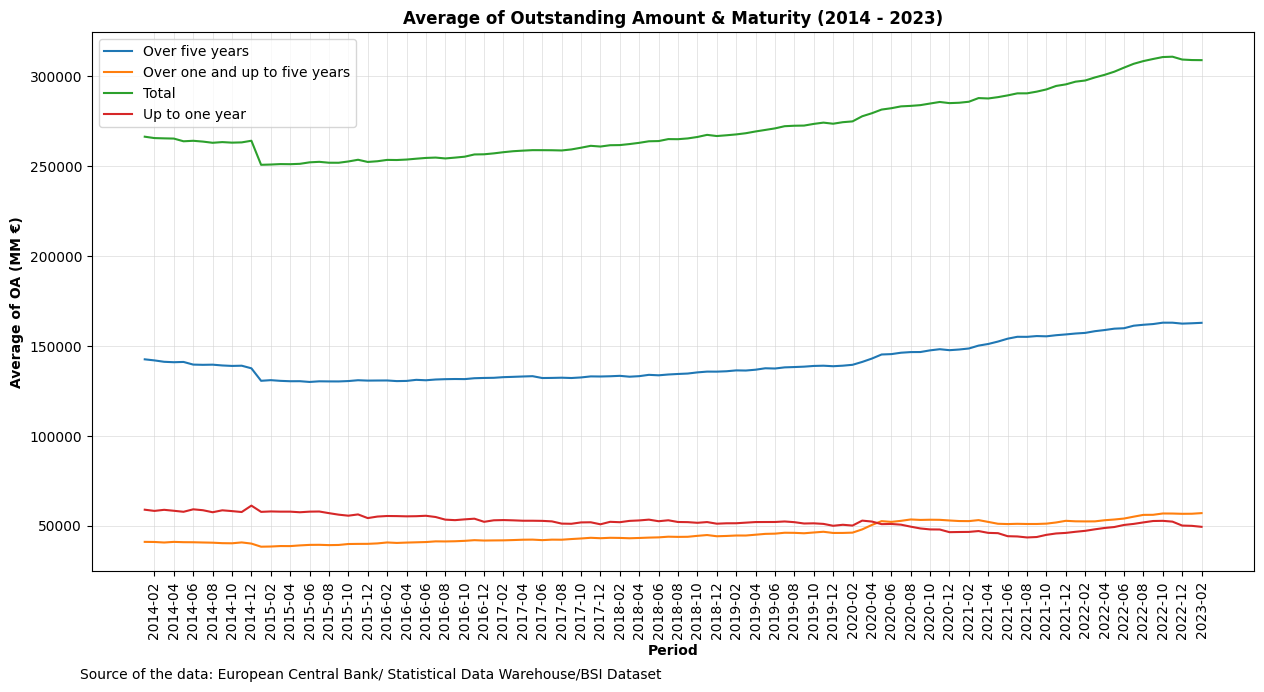

In [56]:
# MATURITY
loans_mat = loans_df3.groupby(by = 'Maturity').mean()
loans_mat = loans_mat.T
loans_mat = loans_mat.iloc[::-1]
#loans_mat

pl = loans_mat.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(loans_mat)+1, 2), loans_mat.index[1::2])
pl.legend(frameon = True, loc = 'best')
pl.set_title('Average of Outstanding Amount & Maturity (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of OA (MM €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
pl.grid(color = 'lightgrey', linewidth = 0.4)

### *2.2.1. MATURITY = TOTAL*

In order to be more objective, let's now consider only the *maturity* up to the ***end*** of the period to inspect whether it has an impact on the average interest rate of loans.

#### A. AVERAGE

<ipython-input-57-bcbd7de0b300>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_mean4 = loans_df4.mean()


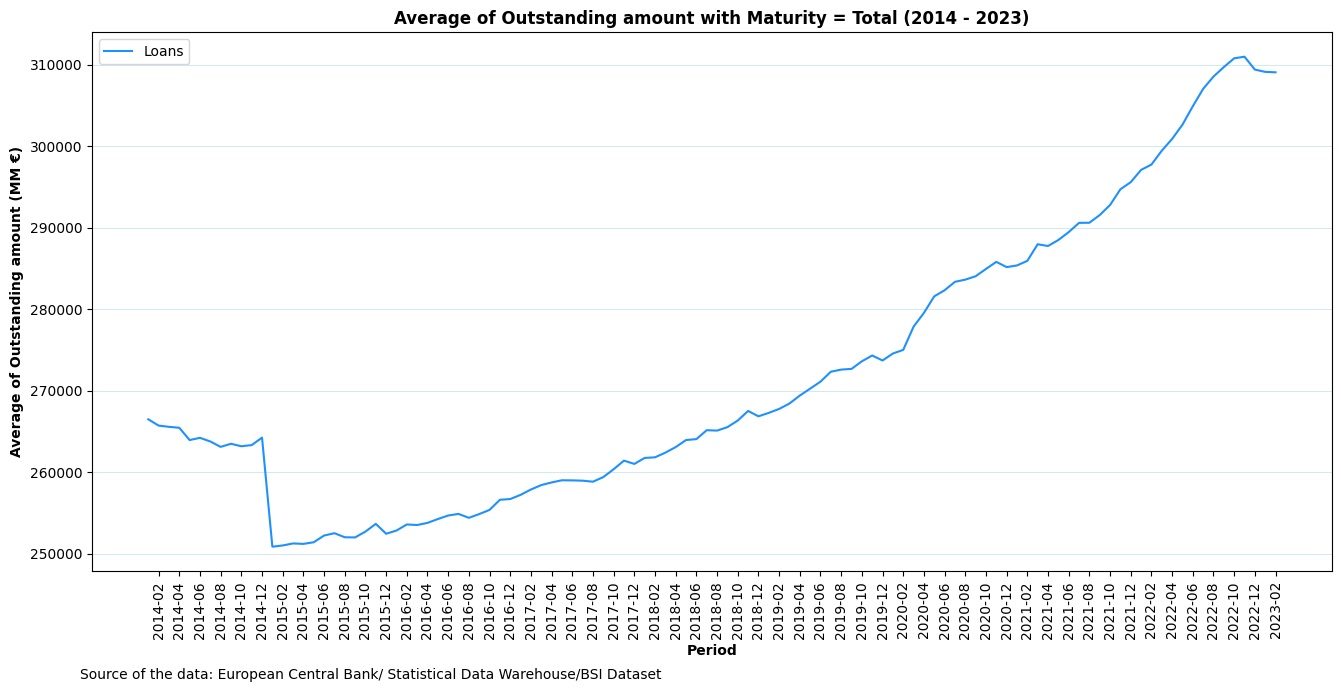

In [57]:
# MEAN, MATURITY = TOTAL
loans_mean4 = loans_df4.mean()
loans_mean4 = loans_mean4.iloc[::-1]

pl = loans_mean4.plot(color = 'dodgerblue', rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(loans_mean4)+1, 2), loans_mean4.index[1::2])
pl.set_title('Average of Outstanding amount with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
pl.legend(['Loans'], frameon = True, loc = 'best')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightblue', linewidth = 0.4)

In this graph we see the gradual increase for the euro area in outstanding amount of loans on the balance sheets of the MFIs during the period of low MRO and slight decrease starting from Novembre 2022.

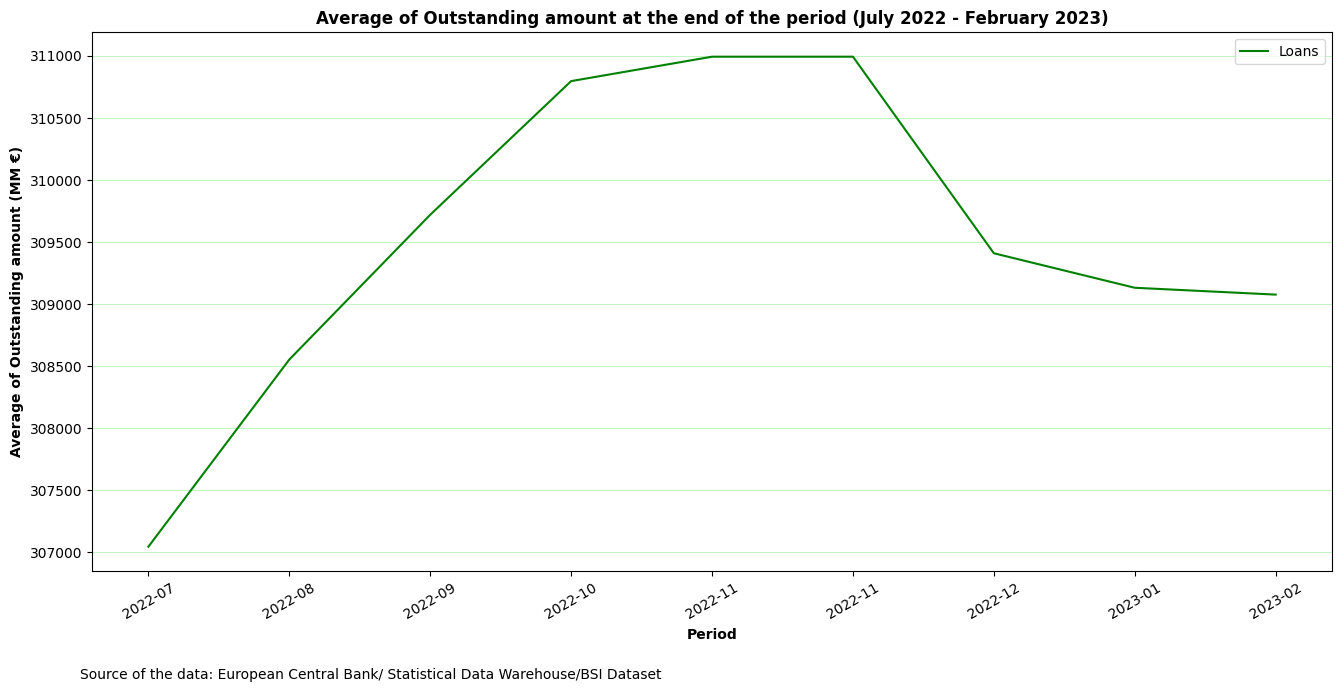

In [58]:
#The average change in outstanding amount at the end of the period 
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
BSI_increase_22_23_mean=loans_df4[Cols_increase_22_23].mean()
BSI_increase_22_23_plot = BSI_increase_22_23_mean.plot(color = 'green', rot = 30, figsize = (16, 7))
BSI_increase_22_23_plot.set_title('Average of Outstanding amount at the end of the period (July 2022 - February 2023)', fontweight = 'bold', fontsize = 12)
BSI_increase_22_23_plot.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = BSI_increase_22_23_plot.transAxes)
BSI_increase_22_23_plot.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
BSI_increase_22_23_plot.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
BSI_increase_22_23_plot.legend(['Loans'], frameon = True, loc = 'best')
plt.grid(axis = 'y', color = 'lightgreen', linewidth = 0.4)


In [59]:
# MEAN
loans_mean2 = loans_df2.mean()
loans_mean2 = loans_mean2.iloc[::-1]

<ipython-input-59-90fbe1a63d2b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_mean2 = loans_df2.mean()


In [60]:
# MATURITY = TOTAL
loans_mat_total = bsi_df[(bsi_df['Type of Loans'] == 'Loans') 
                          & (bsi_df['Maturity'] == 'Total')
                          & (bsi_df['Data type'] =='Outstanding amounts at the end of the period (stocks)')]
loans_mat_total_mean = loans_mat_total.mean()
loans_mat_total_mean = loans_mat_total_mean.iloc[::-1]
#loans_mat_total_mean

<ipython-input-60-d8f720f9ef5d>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_mat_total_mean = loans_mat_total.mean()


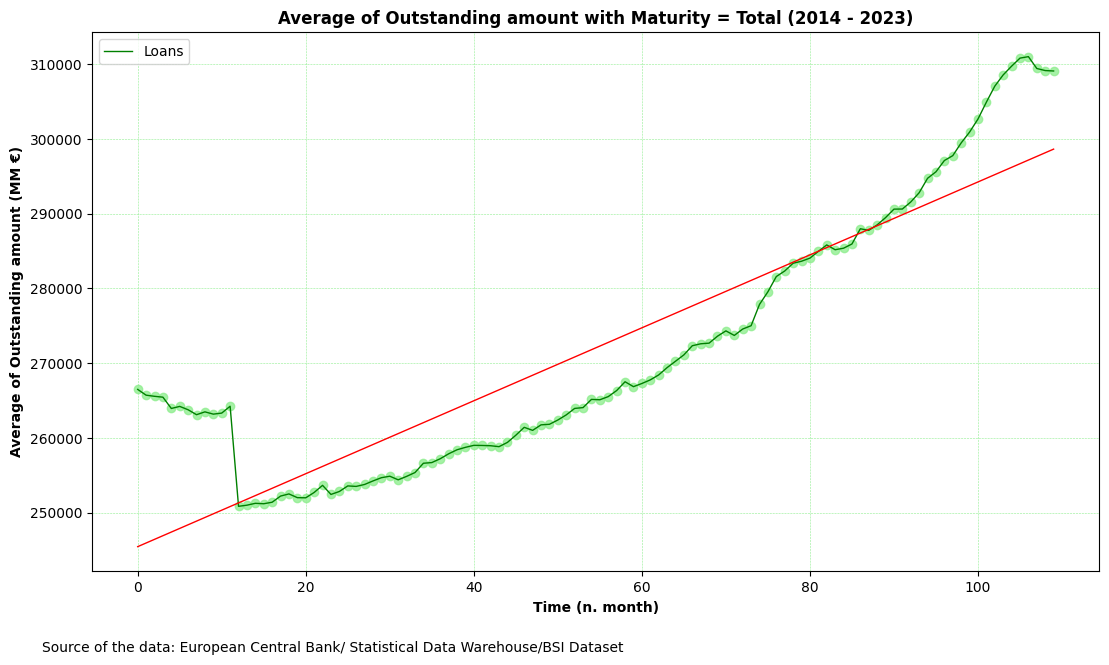

In [61]:
# MEAN & MATURITY = TOTAL
loans_mat_total_mean2 = pd.DataFrame(dict(Mean = loans_mat_total_mean))
loans_mat_total_mean2['Time'] = np.arange(len(loans_mat_total_mean2.index))
#loans_mat_total_mean2

fig, ax = plt.subplots(figsize = (13, 7))
ax.plot('Time', 'Mean', data = loans_mat_total_mean2, color = 'green', linewidth = 1)
ax = sns.regplot(x = 'Time', y = 'Mean', data = loans_mat_total_mean2, ci = None, scatter_kws = dict(color = 'lightgreen'), line_kws={'color': 'red', 'linewidth' : 1})
ax.set_title('Average of Outstanding amount with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
ax.set_xlabel('Time (n. month)', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
ax.legend(['Loans'], frameon = True, loc = 'best')
ax.text(-0.05, -0.15, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = ax.transAxes)
plt.grid(color = 'lightgreen', linestyle = '--', linewidth = 0.4)


#### B. SD

<ipython-input-62-75e903cc14a7>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans_sd4 = loans_df4.std()


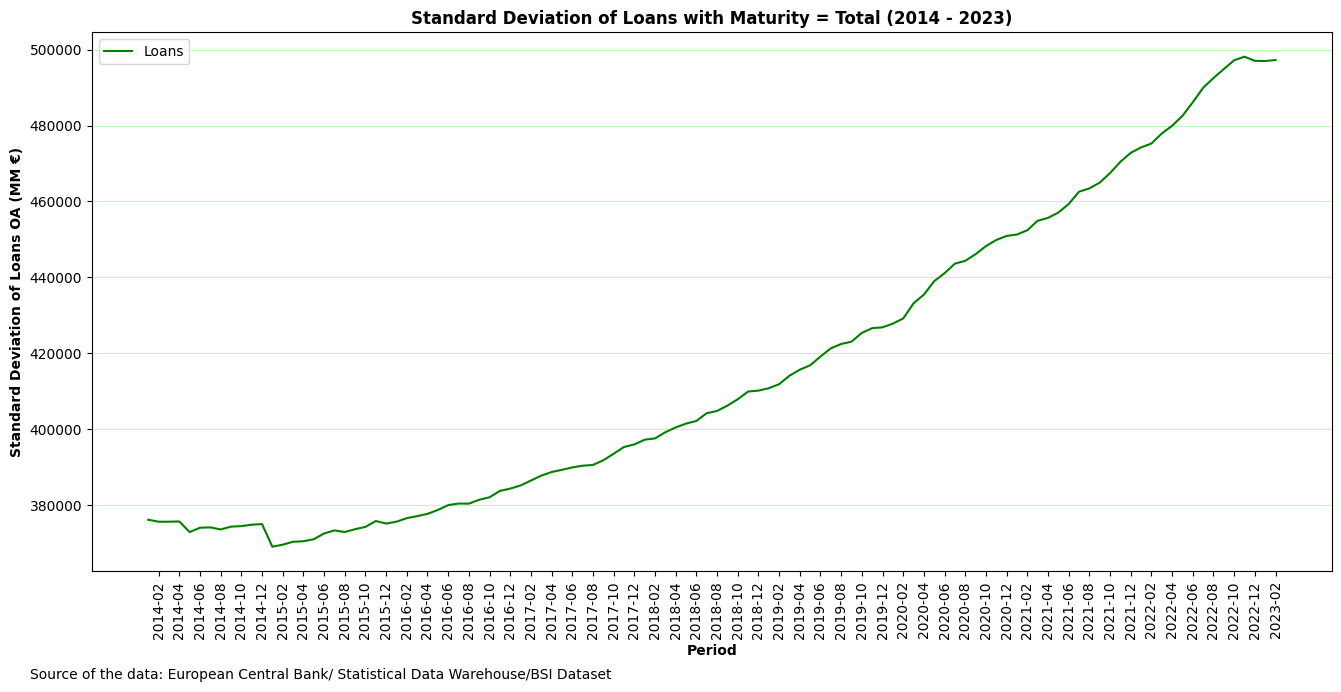

In [62]:
# SD
loans_sd4 = loans_df4.std()
loans_sd4 = loans_sd4.iloc[::-1] 

pl = loans_sd4.plot(color = 'green', rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(loans_sd)+1, 2), loans_sd.index[1::2])
pl.set_title('Standard Deviation of Loans with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Standard Deviation of Loans OA (MM €)', fontweight = 'bold', fontsize = 10)
pl.legend(['Loans'], frameon = True, loc = 'best')
pl.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgreen', linewidth = 0.4)

#### C. COUNTRY



<ipython-input-63-3e83af2cd1b1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_by_country = loans_df4.groupby(by = loans_df4["Country"]).mean()


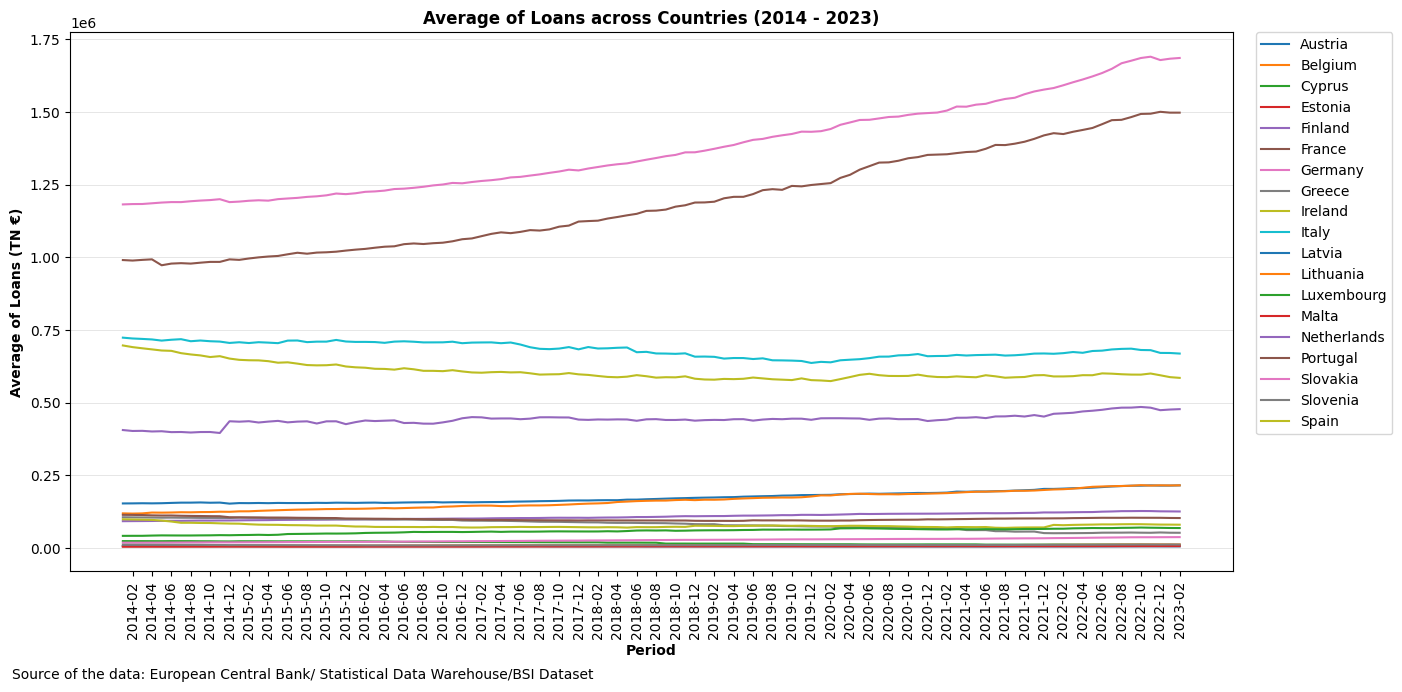

In [63]:
# create the dataset with BSI by country
bsi_by_country = loans_df4.groupby(by = loans_df4["Country"]).mean()
bsi_by_country = bsi_by_country.iloc[:, ::-1] #change the order of columns
bsi_by_country = bsi_by_country.T
#bsi_by_country

# COUNTRY
pl = bsi_by_country.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(bsi_by_country)+1, 2), bsi_by_country.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Average of Loans across Countries (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Loans (TN €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the sake of clarity, we separate each country into a graph.

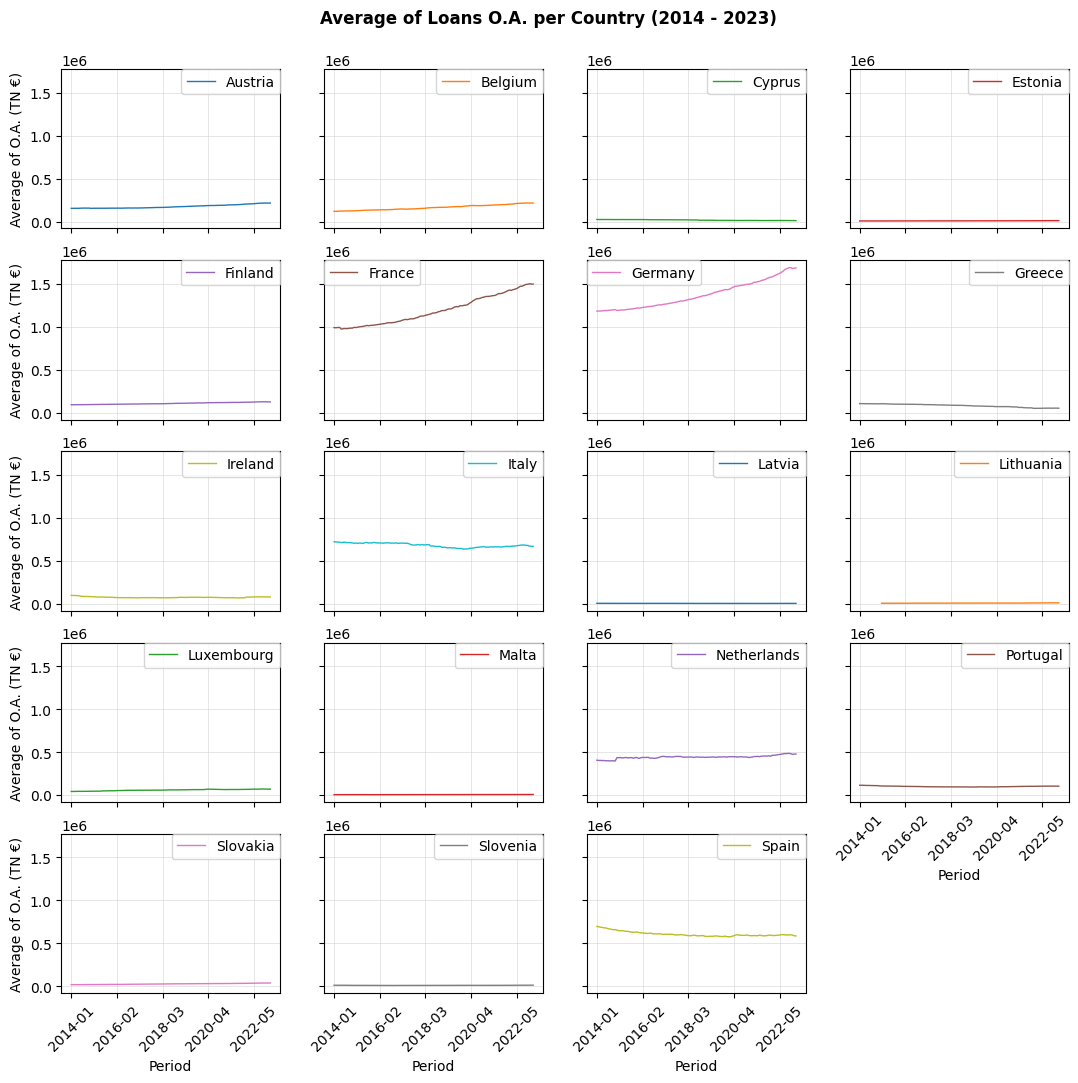

In [64]:
# LOANS
bsi_by_country.plot(subplots = True, layout = (5, 4), figsize = (13, 12), rot = 45,
                    sharey = True, ylabel = 'Average of O.A. (TN €)', 
                    xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Average of Loans O.A. per Country (2014 - 2023)", 
                   fontsize = 12, fontweight = 'bold', y = 0.93)
for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.tick_params(axis = 'x', labelrotation = 45)
    ax.grid(color = 'lightgrey', linewidth = 0.4)

In order to perform a more objective analysis we consider the weighted outstanding amounts ( = o.a. / GDP ).

In [65]:
oaw_by_country = oa_weighted[oa_weighted['Type of Loans'] == 'Loans']
oaw_by_country = oaw_by_country[oaw_by_country['Maturity'] == 'Total']
oaw_by_country = oaw_by_country.groupby(by = 'Country').mean()
oaw_by_country = oaw_by_country.iloc[:, ::-1]
oaw_by_country = oaw_by_country.T
#oaw_by_country

<ipython-input-65-5bb8a1139526>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oaw_by_country = oaw_by_country.groupby(by = 'Country').mean()


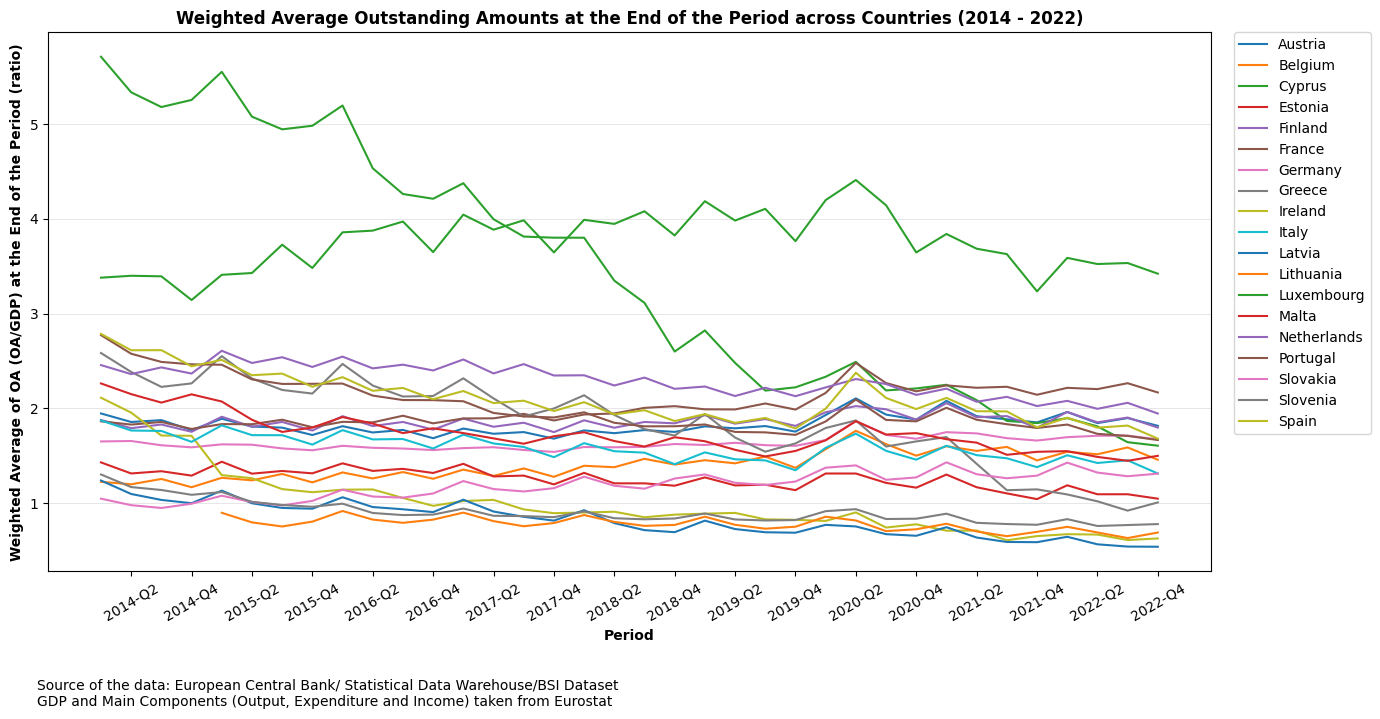

In [66]:
pl = oaw_by_country.plot(rot = 30, figsize = (15, 7))
pl.set_xticks(range(1, len(oaw_by_country)+1, 2), oaw_by_country.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Weighted Average Outstanding Amounts at the End of the Period across Countries (2014 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Weighted Average of OA (OA/GDP) at the End of the Period (ratio)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01,-0.25, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset\nGDP and Main Components (Output, Expenditure and Income) taken from Eurostat ', transform=pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

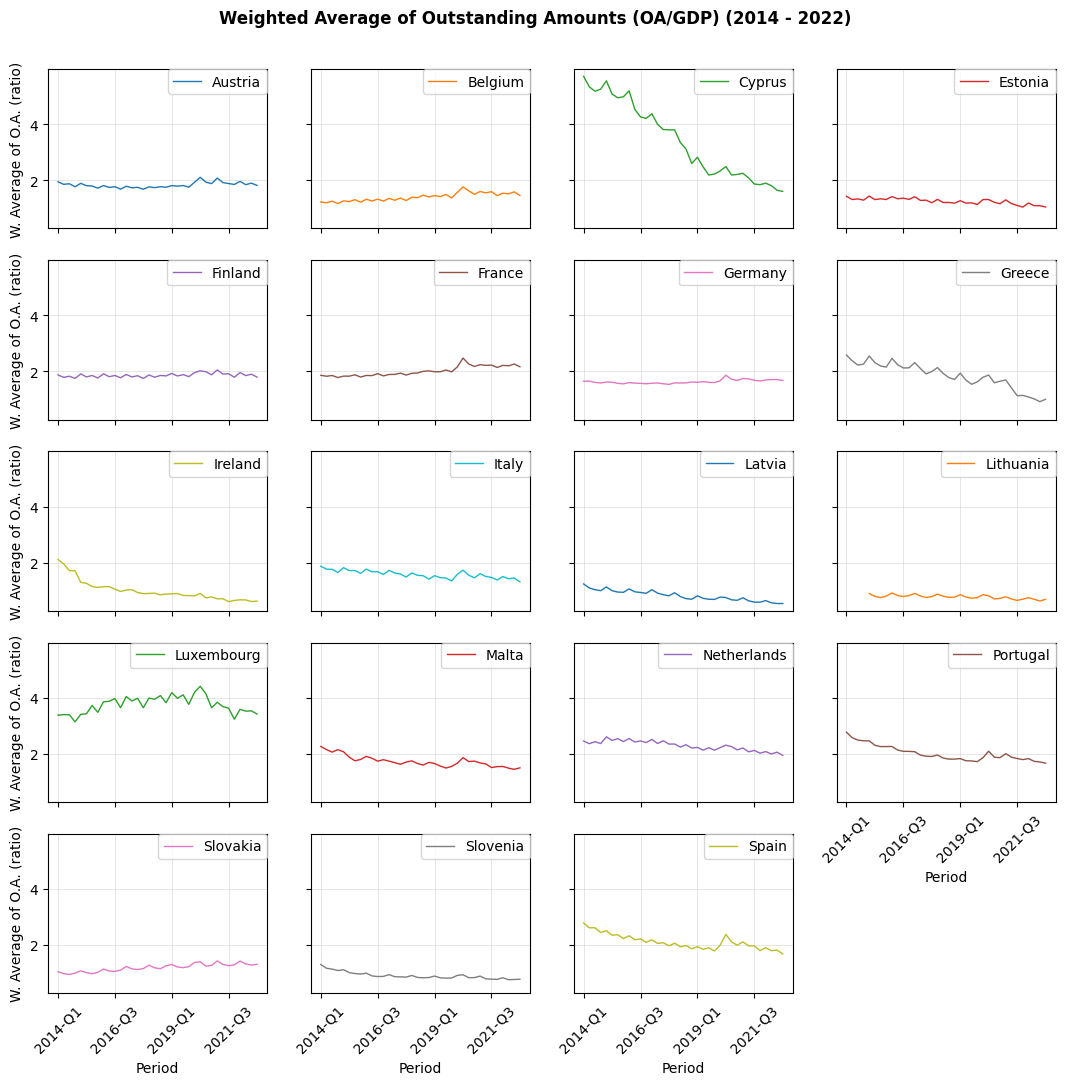

In [67]:
oaw_by_country.plot(subplots = True, layout = (5, 4), figsize = (13, 12), sharey = True,
                    rot = 45,  ylabel = 'W. Average of O.A. (ratio)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Weighted Average of Outstanding Amounts (OA/GDP) (2014 - 2022)", fontsize = 12, fontweight = 'bold', y = 0.93)

for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.grid(color = 'lightgrey', linewidth = 0.4)

#### D. BS COUNTERPART SECTOR

In [68]:
bsi_by_bscs = loans_df4.groupby(by = 'BS counterpart sector').mean()
bsi_by_bscs = bsi_by_bscs.iloc[:, ::-1]
bsi_by_bscs = bsi_by_bscs.T
#bsi_by_bscs

<ipython-input-68-fdbff5d0e1cf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_by_bscs = loans_df4.groupby(by = 'BS counterpart sector').mean()


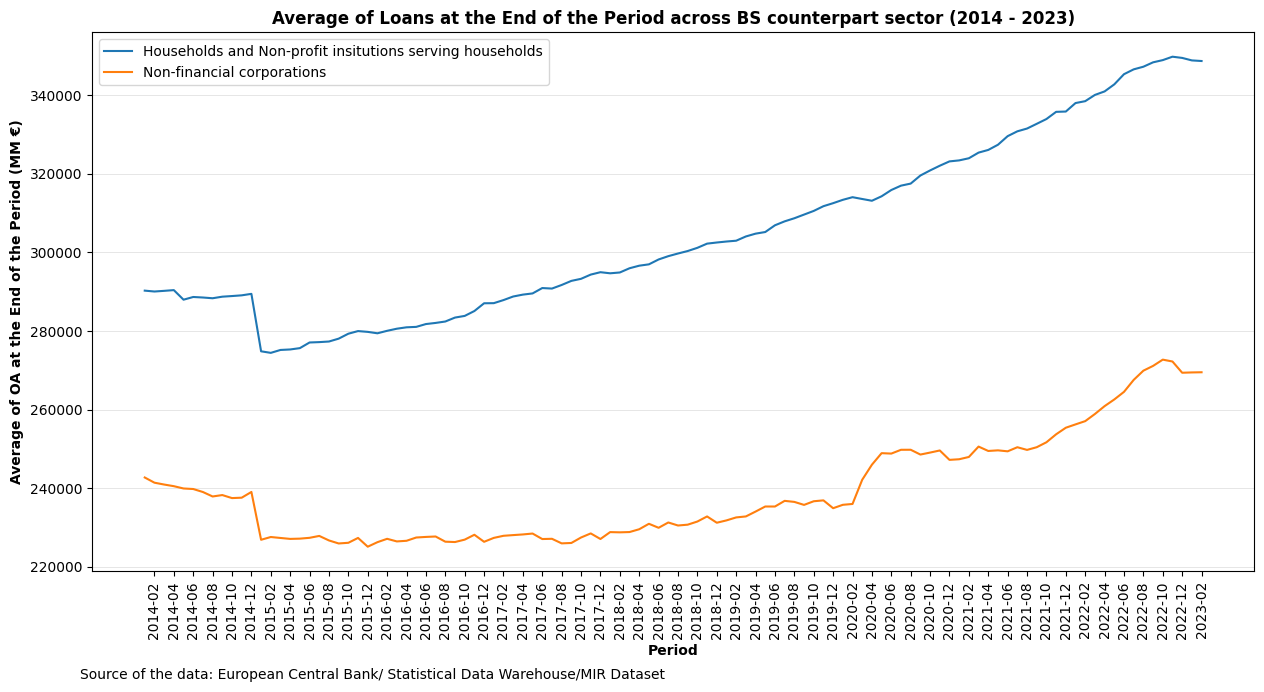

In [69]:
pl = bsi_by_bscs.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(bsi_by_bscs)+1, 2), bsi_by_bscs.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.legend(['Households and Non-profit insitutions serving households', 'Non-financial corporations'], frameon = True, loc = 'best')
pl.set_title('Average of Loans at the End of the Period across BS counterpart sector (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of OA at the End of the Period (MM €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

## *2.3. LENDING FOR HOUSE PURCHASES*

In [70]:
# LENDING FOR HOUSE PURCHASES
lfhp_df2 = bsi_out[bsi_out['Type of Loans'] == 'Lending for house purchase']
lfhp_df3 = lfhp_df2[lfhp_df2['Maturity'] == 'Total']

# describe the data
lfhp_df3.describe()

2023-02       2023-01       2022-12       2022-11       2022-10  \
count  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01   
mean   2.740950e+05  2.744433e+05  2.749322e+05  2.744975e+05  2.741140e+05   
std    4.504112e+05  4.497553e+05  4.502630e+05  4.493216e+05  4.483885e+05   
min    4.719000e+03  4.730000e+03  4.737000e+03  4.719000e+03  4.715000e+03   
25%    1.108500e+04  1.104700e+04  1.104750e+04  1.093250e+04  1.084350e+04   
50%    8.280400e+04  8.329700e+04  8.343400e+04  8.312100e+04  8.338200e+04   
75%    3.285015e+05  3.284095e+05  3.290875e+05  3.279785e+05  3.274355e+05   
max    1.567413e+06  1.565944e+06  1.567538e+06  1.565297e+06  1.560448e+06   

            2022-09       2022-08       2022-07       2022-06       2022-05  \
count  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01   
mean   2.735784e+05  2.725583e+05  2.718560e+05  2.703226e+05  2.684521e+05   
std    4.472362e+05  4.451858e+05  4.435105e+05  4.405641e+05  4.376064e+05   
min    4.704000e+03  4.682000e+03  4.656000e+03  4.639000e+03  4.612000e+03   
25%    1.075350e+04  1.065600e+04  1.054250e+04  1.043600e+04  1.032550e+04   
50%    8.339900e+04  8.331000e+04  8.350100e+04  8.378600e+04  8.410600e+04   
75%    3.261360e+05  3.243990e+05  3.240775e+05  3.222345e+05  3.203635e+05   
max    1.554813e+06  1.547834e+06  1.540943e+06  1.531882e+06  1.523802e+06   

       ...       2014-10       2014-09       2014-08       2014-07  \
count  ...  1.800000e+01  1.800000e+01  1.800000e+01  1.800000e+01   
mean   ...  2.139401e+05  2.136095e+05  2.133872e+05  2.131442e+05   
std    ...  3.132274e+05  3.126939e+05  3.122802e+05  3.116858e+05   
min    ...  3.533056e+03  3.504470e+03  3.486236e+03  3.467831e+03   
25%    ...  1.288013e+04  1.286682e+04  1.287262e+04  1.286371e+04   
50%    ...  8.516700e+04  8.515750e+04  8.516400e+04  8.446950e+04   
75%    ...  2.979032e+05  2.973405e+05  2.971208e+05  2.975365e+05   
max    ...  1.040782e+06  1.036937e+06  1.034332e+06  1.029903e+06   

            2014-06       2014-05       2014-04       2014-03       2014-02  \
count  1.800000e+01  1.800000e+01  1.800000e+01  1.800000e+01  1.800000e+01   
mean   2.127773e+05  2.126413e+05  2.148586e+05  2.145195e+05  2.145024e+05   
std    3.108115e+05  3.103231e+05  3.152820e+05  3.149561e+05  3.148955e+05   
min    3.440745e+03  3.414195e+03  3.385013e+03  3.365091e+03  3.339616e+03   
25%    1.285300e+04  1.272341e+04  1.273172e+04  1.274528e+04  1.274115e+04   
50%    8.477250e+04  8.553800e+04  8.556500e+04  8.560750e+04  8.521400e+04   
75%    2.969052e+05  2.970458e+05  2.970925e+05  2.972745e+05  2.975208e+05   
max    1.026527e+06  1.024833e+06  1.021965e+06  1.020242e+06  1.019429e+06   

            2014-01  
count  1.800000e+01  
mean   2.143821e+05  
std    3.145020e+05  
min    3.321826e+03  
25%    1.276136e+04  
50%    8.542850e+04  
75%    2.978510e+05  
max    1.017632e+06  

[8 rows x 110 columns]

Let's consider the **maturity** of the loans to inspect whether it has an impact on their behaviour.

<ipython-input-71-808b08c6ef1a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lfhp_mat = lfhp_df2.groupby(by = 'Maturity').mean()


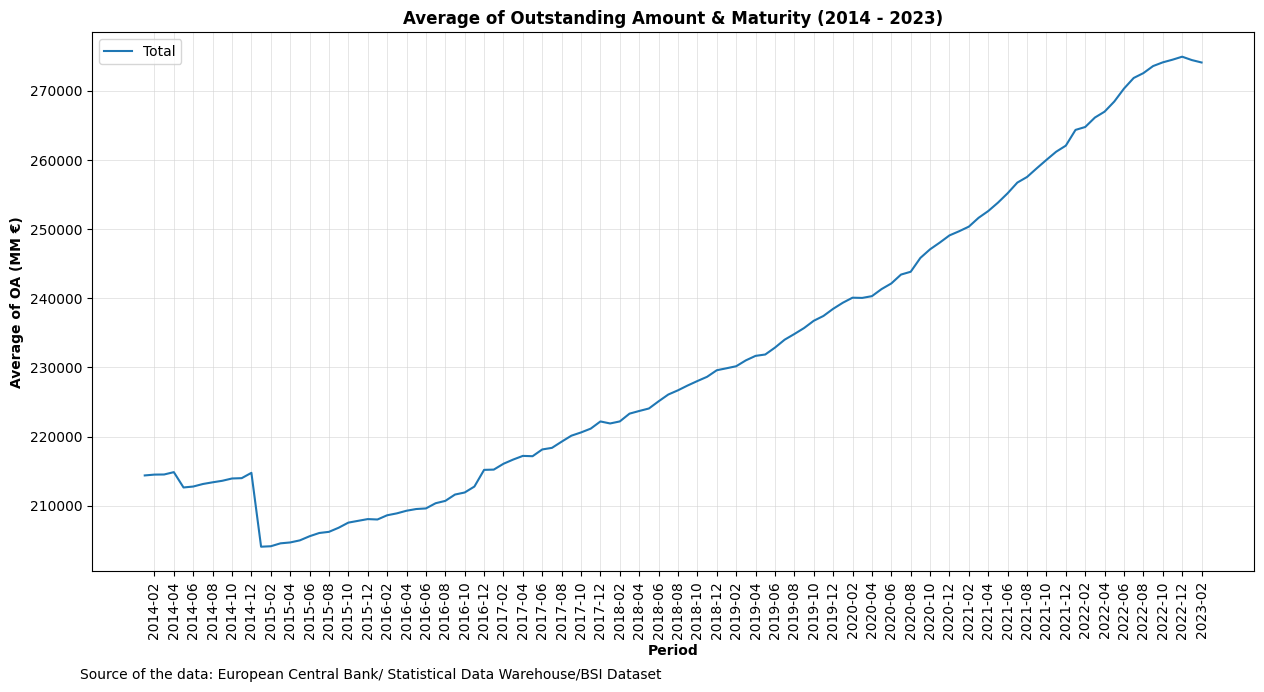

In [71]:
# MATURITY
lfhp_mat = lfhp_df2.groupby(by = 'Maturity').mean()
lfhp_mat = lfhp_mat.T
lfhp_mat = lfhp_mat.iloc[::-1]
#lfhp_mat

pl = lfhp_mat.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(lfhp_mat)+1, 2), lfhp_mat.index[1::2])
pl.legend(frameon = True, loc = 'best')
pl.set_title('Average of Outstanding Amount & Maturity (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of OA (MM €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
pl.grid(color = 'lightgrey', linewidth = 0.4)

### *2.3.1. MATURITY = TOTAL*

In order to be more objective, let's now consider only the *maturity* up to the ***end*** of the period to inspect whether it has an impact on the average interest rate of loans.

#### A. AVERAGE

<ipython-input-72-62510c9cff5c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lfhp_mean3 = lfhp_df3.mean()


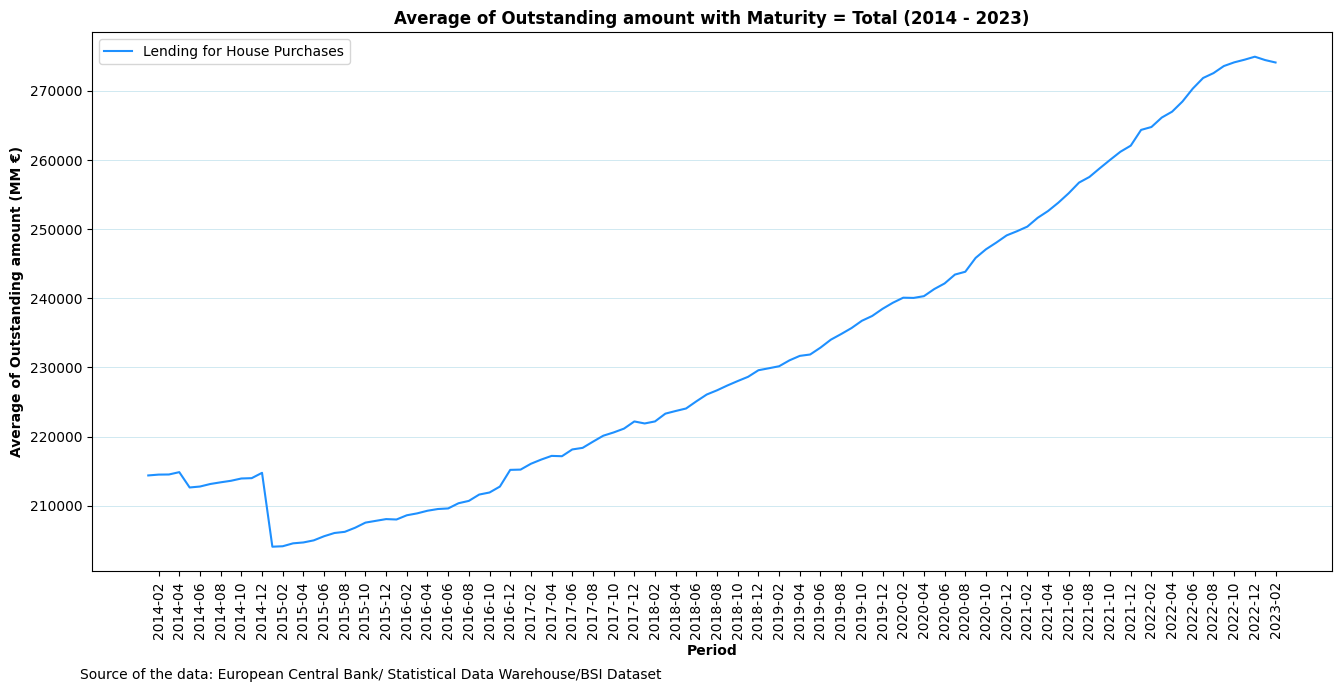

In [72]:
# MEAN, MATURITY = TOTAL
lfhp_mean3 = lfhp_df3.mean()
lfhp_mean3 = lfhp_mean3.iloc[::-1]

pl = lfhp_mean3.plot(color = 'dodgerblue', rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(lfhp_mean3)+1, 2), lfhp_mean3.index[1::2])
pl.set_title('Average of Outstanding amount with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
pl.legend(['Lending for House Purchases'], frameon = True, loc = 'best')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightblue', linewidth = 0.4)


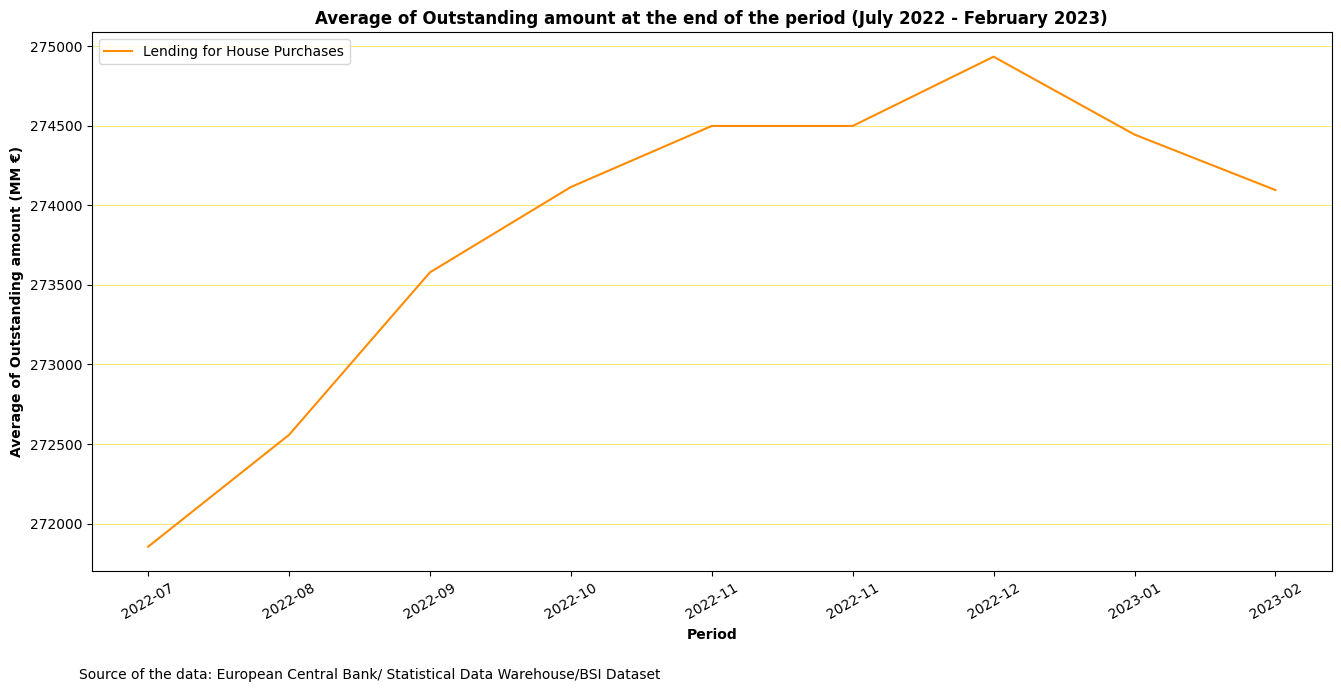

In [73]:
#The average change in outstanding amount at the end of the period 
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
BSI_increase_22_23_mean=lfhp_df3[Cols_increase_22_23].mean()
BSI_increase_22_23_plot = BSI_increase_22_23_mean.plot(color = 'darkorange', rot = 30, figsize = (16, 7))
BSI_increase_22_23_plot.set_title('Average of Outstanding amount at the end of the period (July 2022 - February 2023)', fontweight = 'bold', fontsize = 12)
BSI_increase_22_23_plot.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = BSI_increase_22_23_plot.transAxes)
BSI_increase_22_23_plot.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
BSI_increase_22_23_plot.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
BSI_increase_22_23_plot.legend(['Lending for House Purchases'], frameon = True, loc = 'upper left')
plt.grid(axis = 'y', color = 'gold', linewidth = 0.4)

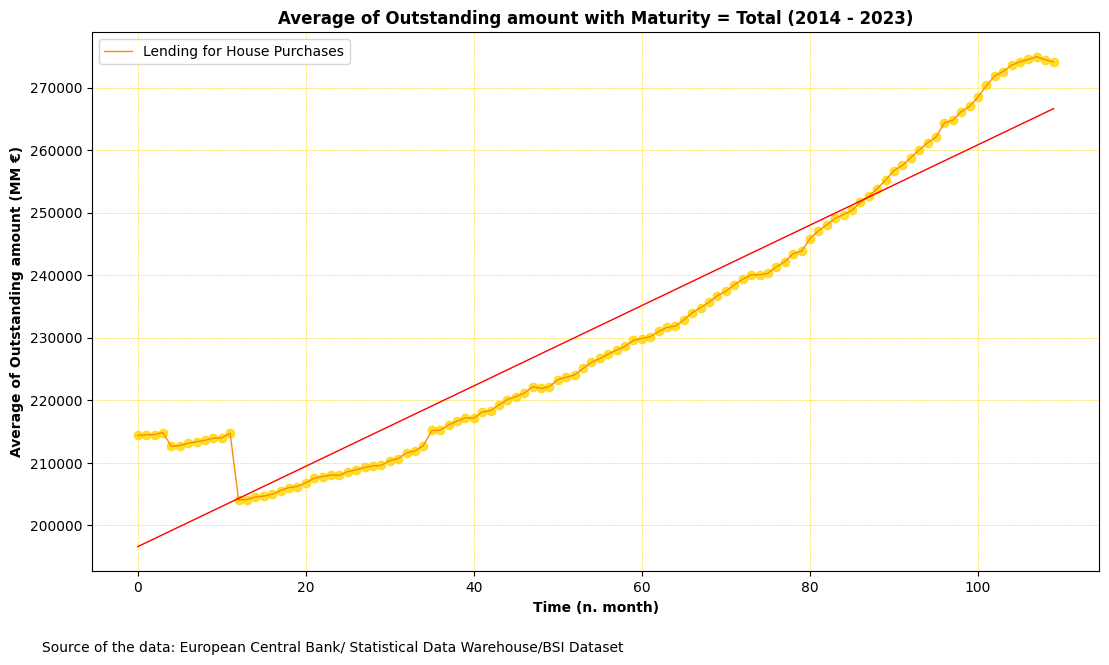

In [74]:
# MEAN & MATURITY = TOTAL
lfhp_tot_mean = pd.DataFrame(dict(Mean = lfhp_mean3))
lfhp_tot_mean['Time'] = np.arange(len(lfhp_tot_mean.index))
#lfhp_tot_mean

fig, ax = plt.subplots(figsize = (13, 7))
ax.plot('Time', 'Mean', data = lfhp_tot_mean, color = 'darkorange', linewidth = 1)
ax = sns.regplot(x = 'Time', y = 'Mean', data = lfhp_tot_mean, ci = None, scatter_kws = dict(color = 'gold'), line_kws={'color': 'red', 'linewidth' : 1})
ax.set_title('Average of Outstanding amount with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
ax.set_xlabel('Time (n. month)', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
ax.legend(['Lending for House Purchases'], frameon = True, loc = 'best')
ax.text(-0.05, -0.15, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = ax.transAxes)
plt.grid(color = 'gold', linestyle = '--', linewidth = 0.4)

#### B. SD

<ipython-input-75-ecafe1c14f2c>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lfhp_sd3 = lfhp_df3.std()


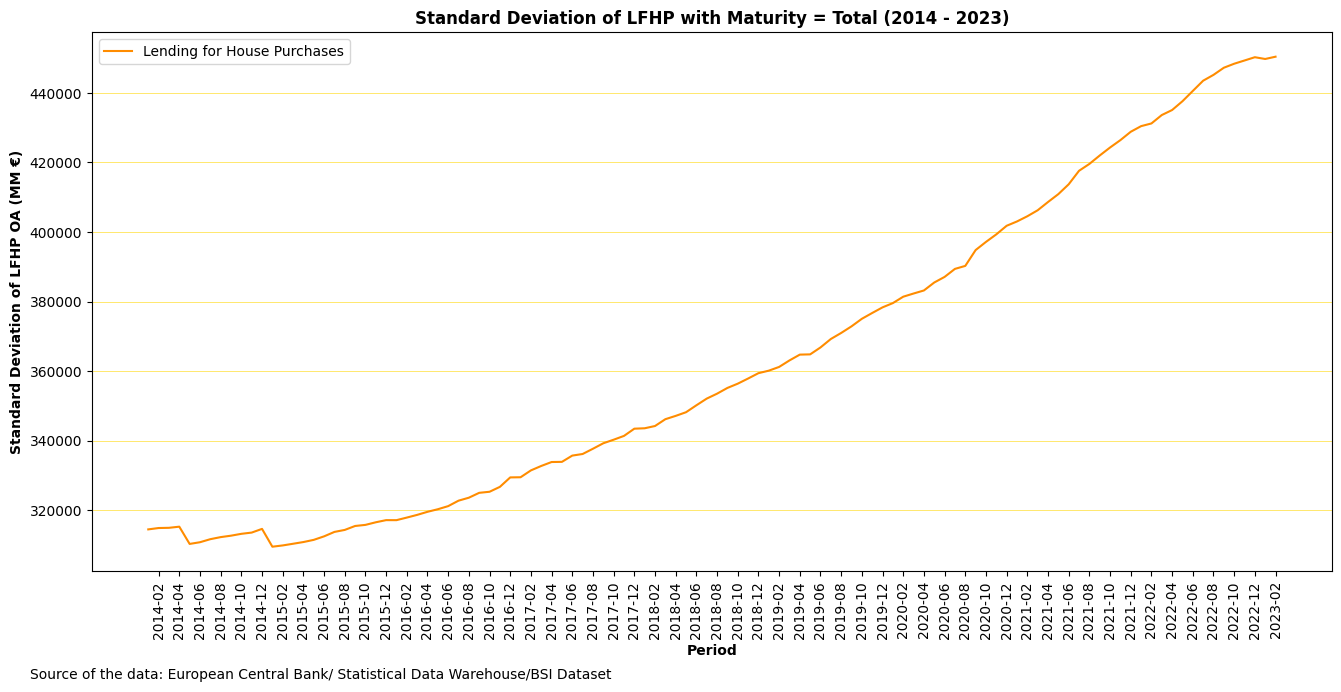

In [75]:
# SD
lfhp_sd3 = lfhp_df3.std()
lfhp_sd3 = lfhp_sd3.iloc[::-1] 

pl = lfhp_sd3.plot(color = 'darkorange', rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(lfhp_sd3)+1, 2), lfhp_sd3.index[1::2])
pl.set_title('Standard Deviation of LFHP with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Standard Deviation of LFHP OA (MM €)', fontweight = 'bold', fontsize = 10)
pl.legend(['Lending for House Purchases'], frameon = True, loc = 'best')
pl.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'gold', linewidth = 0.4)

#### C. COUNTRY

<ipython-input-76-433723fc1d36>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_by_country = lfhp_df3.groupby(by = lfhp_df3["Country"]).mean()


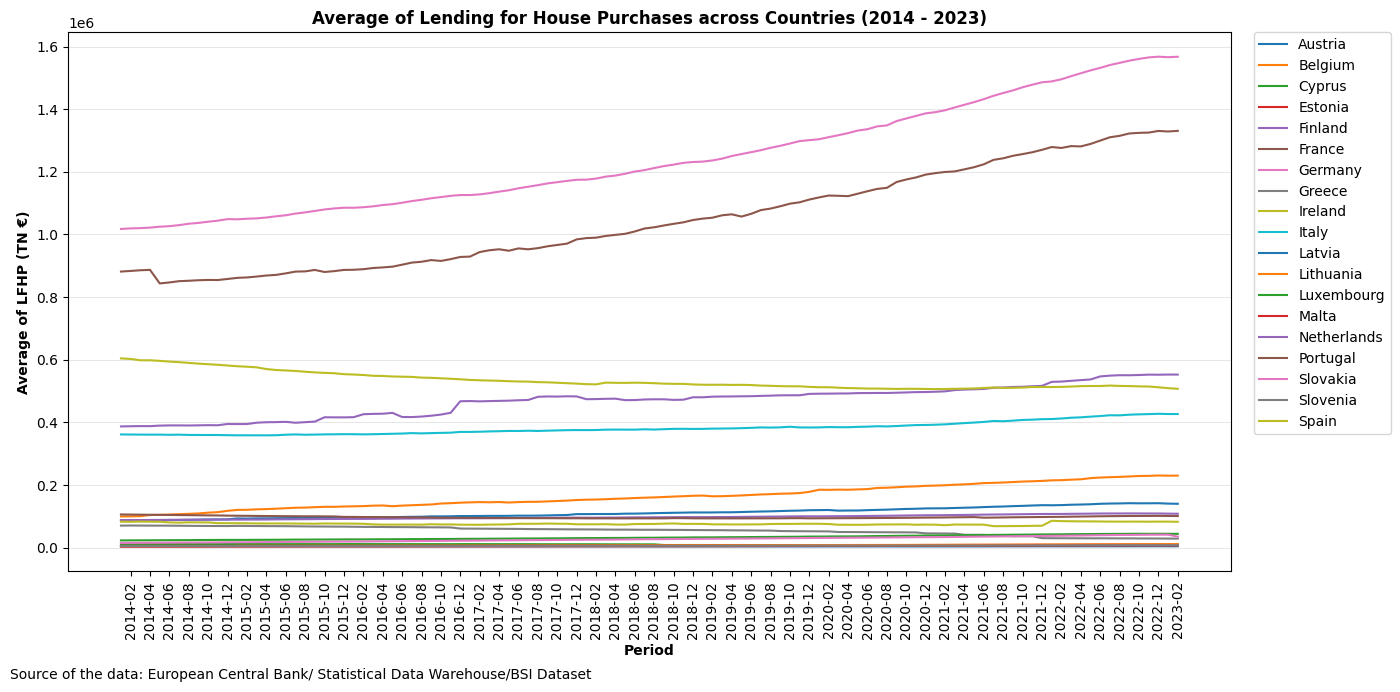

In [76]:
# create the dataset with BSI by country
bsi_by_country = lfhp_df3.groupby(by = lfhp_df3["Country"]).mean()
bsi_by_country = bsi_by_country.iloc[:, ::-1] #change the order of columns
bsi_by_country = bsi_by_country.T
#bsi_by_country

# COUNTRY
pl = bsi_by_country.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(bsi_by_country)+1, 2), bsi_by_country.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Average of Lending for House Purchases across Countries (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of LFHP (TN €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the sake of clarity, we separate each country into a graph.

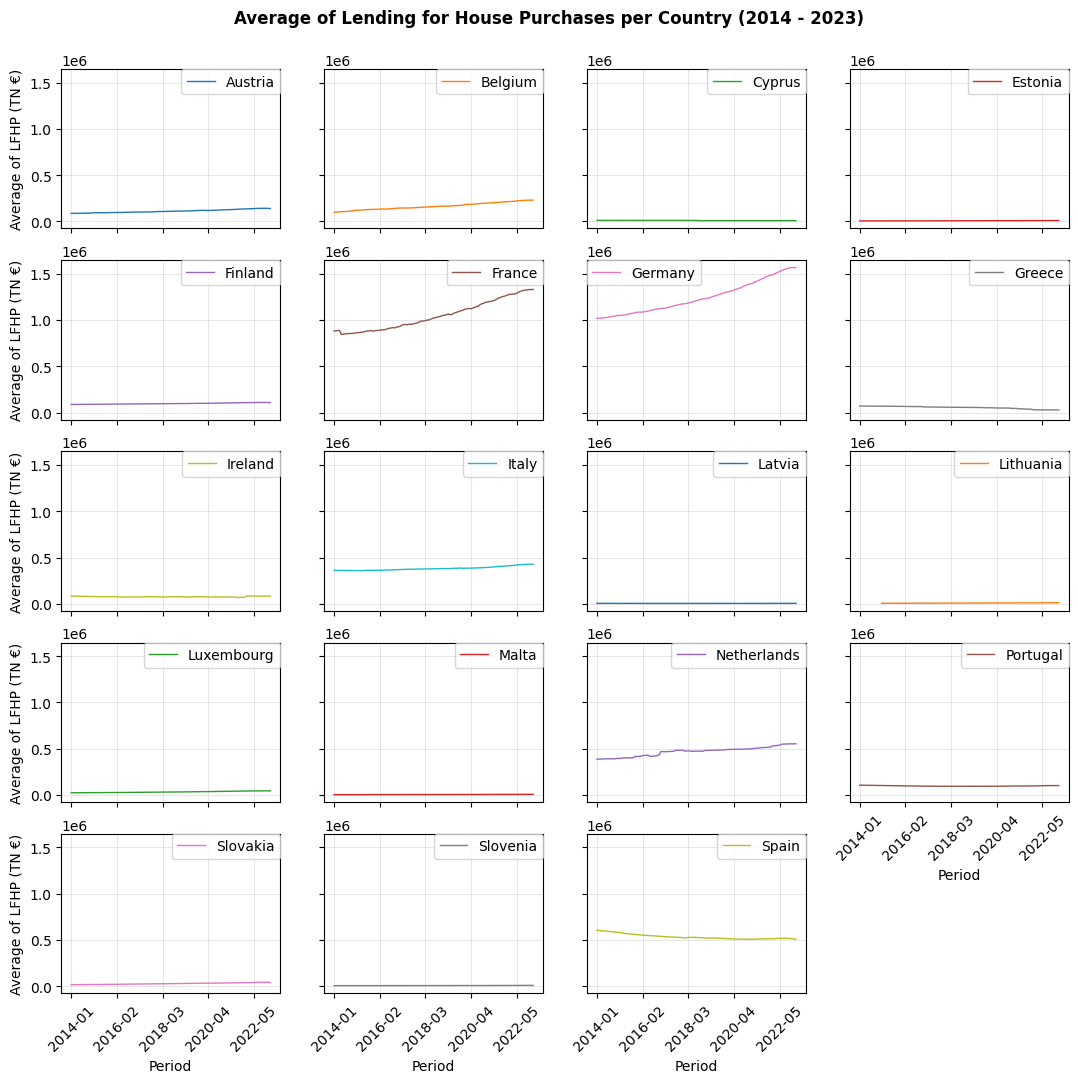

In [77]:
# LFHP
bsi_by_country.plot(subplots = True, layout = (5, 4), figsize = (13, 12), 
                    sharey = True, ylabel = 'Average of LFHP (TN €)', 
                    xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Average of Lending for House Purchases per Country (2014 - 2023)", 
                   fontsize = 12, fontweight = 'bold', y = 0.93)
for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.tick_params(axis = 'x', labelrotation = 45)
    ax.grid(color = 'lightgrey', linewidth = 0.4)

#### D. BS COUNTERPART SECTOR

In [78]:
bsi_by_bscs = lfhp_df3.groupby(by = 'BS counterpart sector').mean()
bsi_by_bscs = bsi_by_bscs.iloc[:, ::-1]
bsi_by_bscs = bsi_by_bscs.T
#bsi_by_bscs

<ipython-input-78-f4901ef69a24>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_by_bscs = lfhp_df3.groupby(by = 'BS counterpart sector').mean()


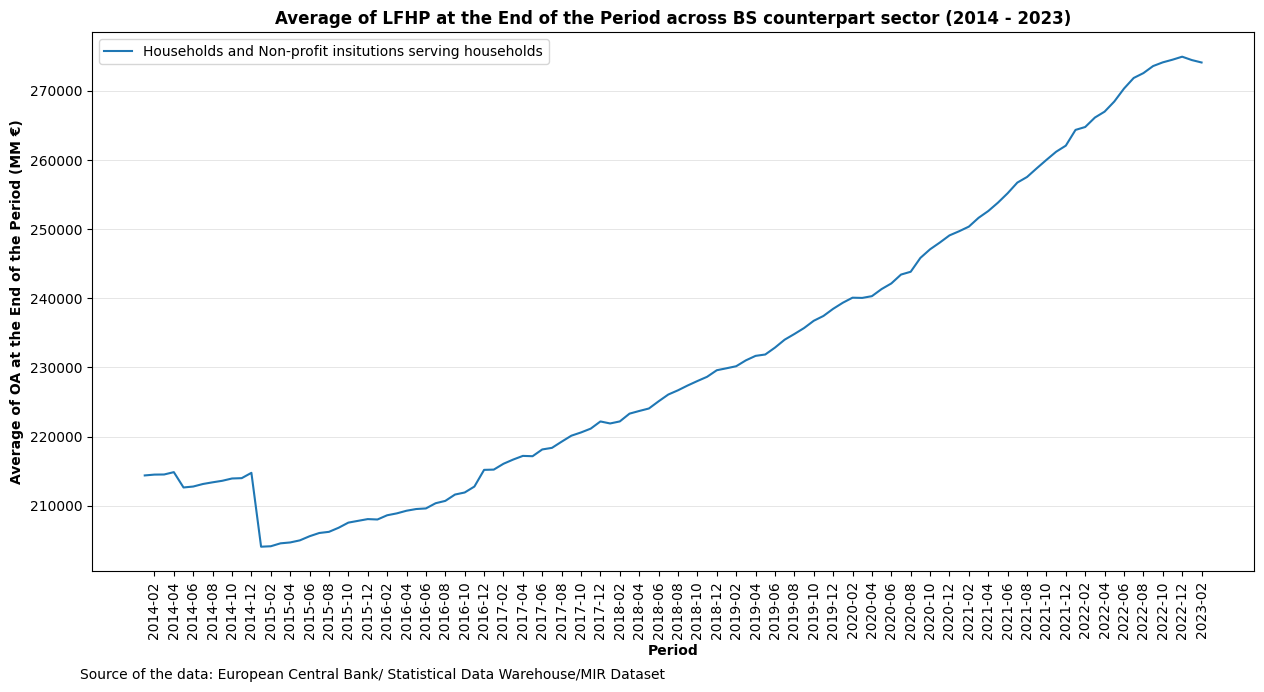

In [79]:
pl = bsi_by_bscs.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(bsi_by_bscs)+1, 2), bsi_by_bscs.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.legend(['Households and Non-profit insitutions serving households', 'Non-financial corporations'], frameon = True, loc = 'best')
pl.set_title('Average of LFHP at the End of the Period across BS counterpart sector (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of OA at the End of the Period (MM €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

## *2.4. EXTENDED CREDIT*

In [80]:
# EXTENDED CREDIT
ec_df2 = bsi_out[bsi_out['Type of Loans'] == 'Extended Credit']
ec_df3 = ec_df2[ec_df2['Maturity'] == 'Total']

# describe the data
ec_df3.describe()

2023-02       2023-01       2022-12       2022-11       2022-10  \
count     38.000000     38.000000     38.000000     38.000000     38.000000   
mean     919.533994    921.035503    921.018613    909.155192    850.662642   
std     2371.120997   2379.454523   2370.314853   2366.555394   2245.593812   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.467347      4.750000      3.892500      3.051750      3.032750   
50%       35.060000     31.296500     35.990000     25.650500     25.376000   
75%      436.750000    433.000000    442.500000    364.750000    370.750000   
max    12826.000000  12885.000000  12805.000000  12769.000000  12685.000000   

            2022-09       2022-08       2022-07       2022-06       2022-05  \
count     38.000000     38.000000     38.000000     38.000000     38.000000   
mean     842.212716    845.909626    835.094532    832.677647    818.204595   
std     2223.677590   2261.529935   2225.371746   2229.977921   2173.479132   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.983500      2.970750      2.916000      3.000000      2.220500   
50%       22.925000     20.095000     22.680000     22.935000     19.825000   
75%      365.750000    370.250000    370.500000    375.250000    381.250000   
max    12573.000000  12865.000000  12644.000000  12701.000000  12334.000000   

       ...      2014-10      2014-09      2014-08      2014-07      2014-06  \
count  ...    36.000000    36.000000    36.000000    36.000000    36.000000   
mean   ...   806.964500   809.940583   793.840417   793.013861   789.123250   
std    ...  1794.098673  1797.081381  1744.239840  1738.951080  1758.008024   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     1.000000     1.750000     1.000000     2.000000     2.000000   
50%    ...    51.458000    51.012000    50.885500    51.337000    51.208000   
75%    ...   672.000000   666.250000   645.500000   628.000000   392.000000   
max    ...  9408.000000  9400.000000  9035.000000  9014.000000  9120.000000   

           2014-05      2014-04      2014-03      2014-02      2014-01  
count    36.000000    36.000000    36.000000    36.000000    36.000000  
mean    787.404917   788.766444   806.940556   812.825861   819.830000  
std    1755.613643  1754.908936  1787.066169  1799.110612  1814.470559  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.750000     1.750000     1.750000     1.546750     1.000000  
50%      51.692000    51.983500    52.135500    44.852000    52.311500  
75%     385.000000   387.000000   379.750000   375.750000   374.500000  
max    9125.000000  9102.000000  9064.000000  9135.000000  9197.000000  

[8 rows x 110 columns]

Let's consider the **maturity** of the loans to inspect whether it has an impact on their behaviour.

<ipython-input-81-2647a956d6ab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ec_mat = ec_df2.groupby(by = 'Maturity').mean()


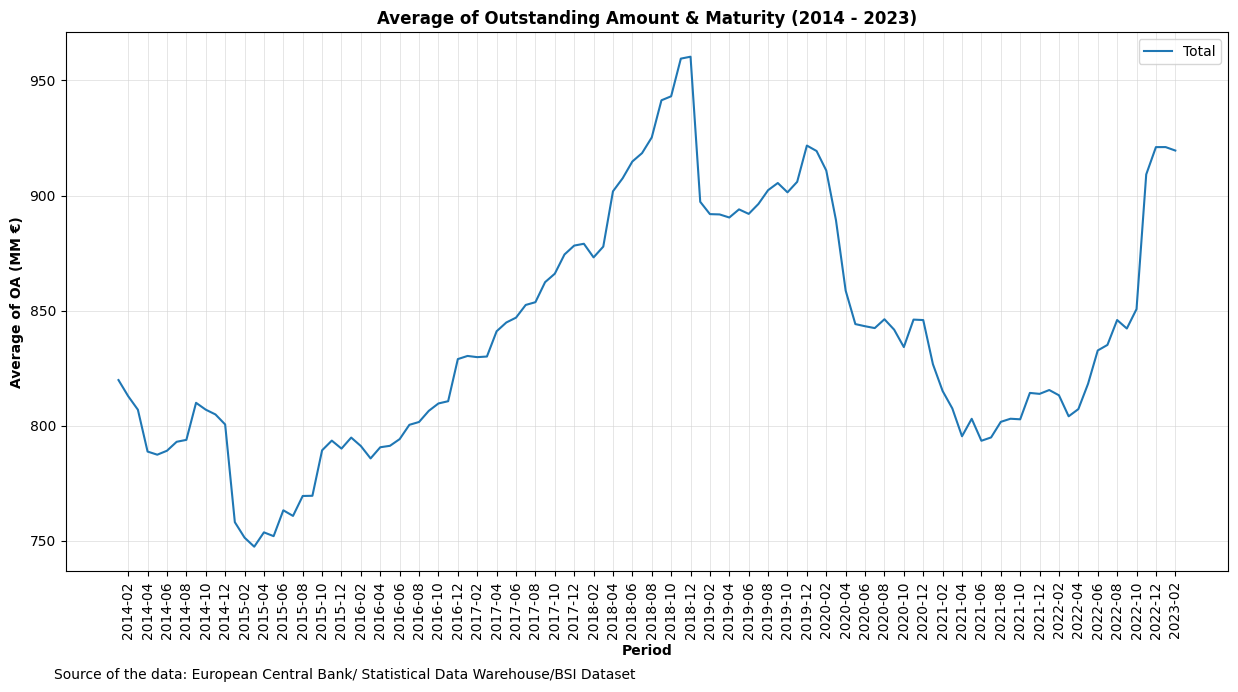

In [81]:
# MATURITY
ec_mat = ec_df2.groupby(by = 'Maturity').mean()
ec_mat = ec_mat.T
ec_mat = ec_mat.iloc[::-1]
#ec_mat

pl = ec_mat.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(ec_mat)+1, 2), ec_mat.index[1::2])
pl.legend(frameon = True, loc = 'best')
pl.set_title('Average of Outstanding Amount & Maturity (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of OA (MM €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
pl.grid(color = 'lightgrey', linewidth = 0.4)

### *2.4.1. MATURITY = TOTAL*

In order to be more objective, let's now consider only the *maturity* up to the ***end*** of the period to inspect whether it has an impact on the average interest rate of loans.

#### A. AVERAGE

<ipython-input-82-8b1dd38d67fa>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ec_mean3 = ec_df3.mean()


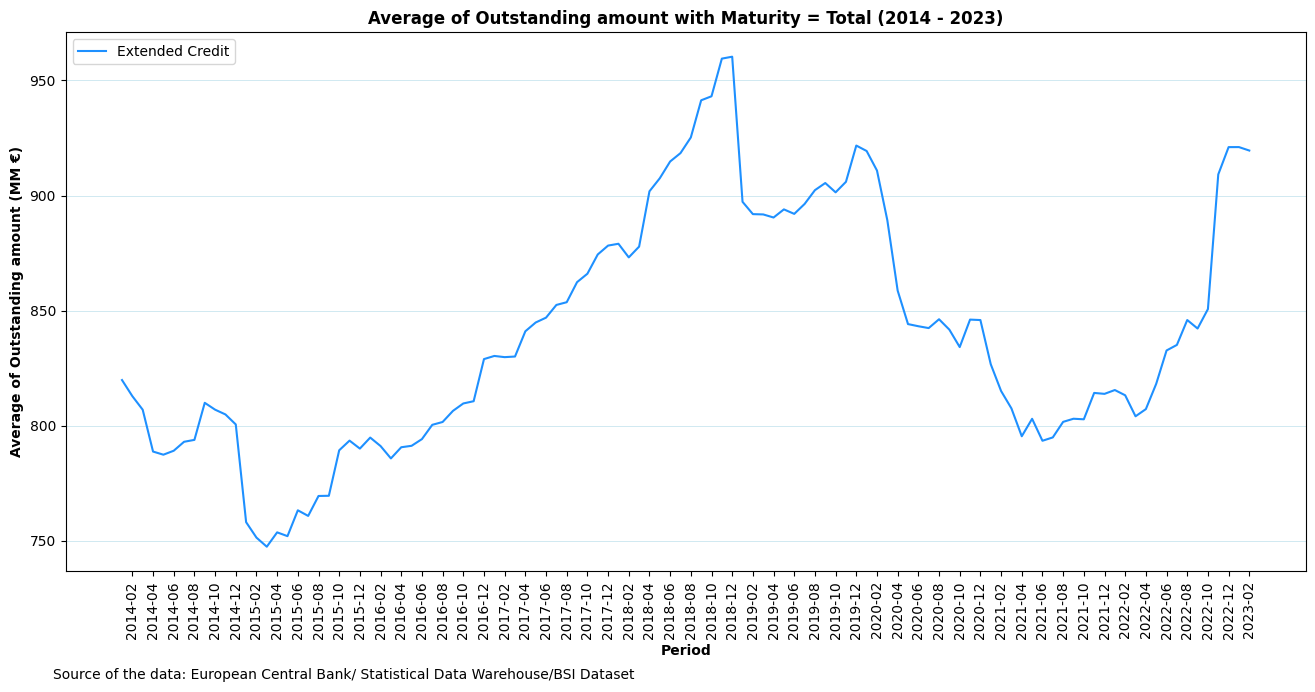

In [82]:
# MEAN, MATURITY = TOTAL
ec_mean3 = ec_df3.mean()
ec_mean3 = ec_mean3.iloc[::-1]

pl = ec_mean3.plot(color = 'dodgerblue', rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(ec_mean3)+1, 2), ec_mean3.index[1::2])
pl.set_title('Average of Outstanding amount with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
pl.legend(['Extended Credit'], frameon = True, loc = 'upper left')
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightblue', linewidth = 0.4)

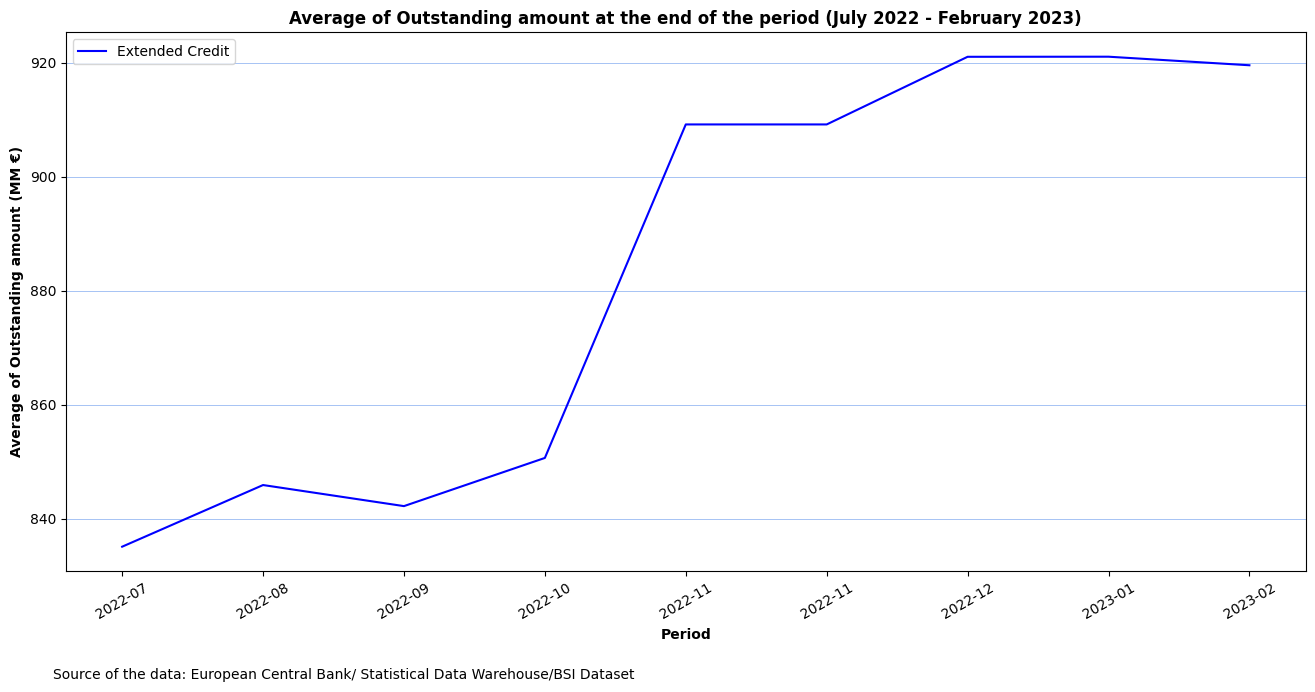

In [83]:
#The average change in outstanding amount at the end of the period 
Cols_increase_22_23=['2022-07','2022-08','2022-09','2022-10','2022-11','2022-11','2022-12','2023-01','2023-02']
BSI_increase_22_23_mean=ec_df3[Cols_increase_22_23].mean()
BSI_increase_22_23_plot = BSI_increase_22_23_mean.plot(color = 'blue', rot = 30, figsize = (16, 7))
BSI_increase_22_23_plot.set_title('Average of Outstanding amount at the end of the period (July 2022 - February 2023)', fontweight = 'bold', fontsize = 12)
BSI_increase_22_23_plot.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = BSI_increase_22_23_plot.transAxes)
BSI_increase_22_23_plot.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
BSI_increase_22_23_plot.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
BSI_increase_22_23_plot.legend(['Extended Credit'], frameon = True, loc = 'upper left')
plt.grid(axis = 'y', color = 'cornflowerblue', linewidth = 0.4)

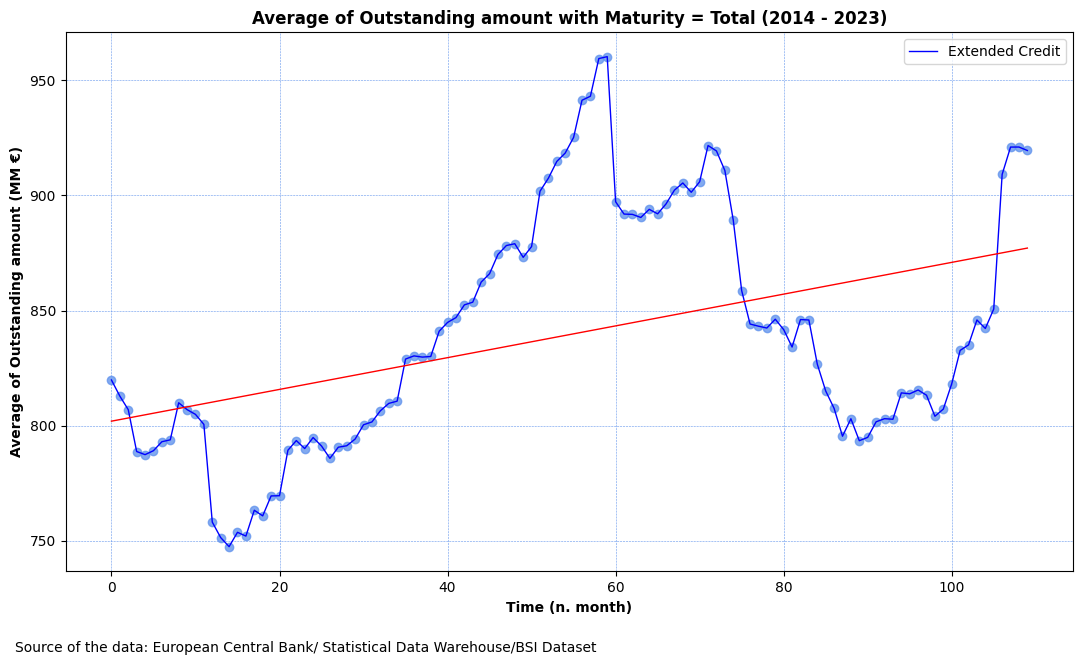

In [84]:
# MEAN & MATURITY = TOTAL
ec_tot_mean = pd.DataFrame(dict(Mean = ec_mean3))
ec_tot_mean['Time'] = np.arange(len(ec_tot_mean.index))
#ec_tot_mean

fig, ax = plt.subplots(figsize = (13, 7))
ax.plot('Time', 'Mean', data = ec_tot_mean, color = 'blue', linewidth = 1)
ax = sns.regplot(x = 'Time', y = 'Mean', data = ec_tot_mean, ci = None, scatter_kws = dict(color = 'cornflowerblue'), line_kws={'color': 'red', 'linewidth' : 1})
ax.set_title('Average of Outstanding amount with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
ax.set_xlabel('Time (n. month)', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('Average of Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
ax.legend(['Extended Credit'], frameon = True, loc = 'best')
ax.text(-0.05, -0.15, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = ax.transAxes)
plt.grid(color = 'cornflowerblue', linestyle = '--', linewidth = 0.4)

#### B. SD

<ipython-input-85-c226f66f45d2>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ec_sd3 = ec_df3.std()


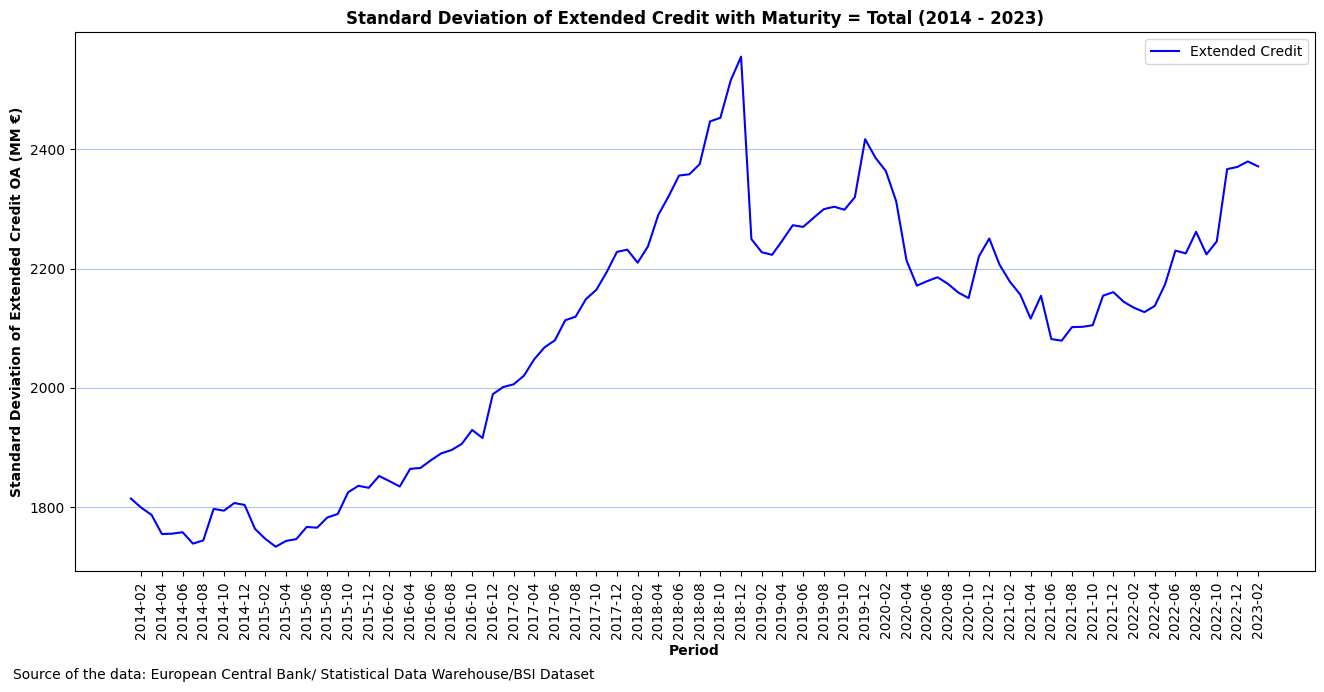

In [85]:
# SD
ec_sd3 = ec_df3.std()
ec_sd3 = ec_sd3.iloc[::-1] 

pl = ec_sd3.plot(color = 'blue', rot = 90, figsize = (16, 7))
pl.set_xticks(range(1, len(ec_sd3)+1, 2), ec_sd3.index[1::2])
pl.set_title('Standard Deviation of Extended Credit with Maturity = Total (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Standard Deviation of Extended Credit OA (MM €)', fontweight = 'bold', fontsize = 10)
pl.legend(['Extended Credit'], frameon = True, loc = 'best')
pl.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'cornflowerblue', linewidth = 0.4)

#### C. COUNTRY

<ipython-input-86-2122ba17ec75>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_by_country = ec_df3.groupby(by = ec_df3["Country"]).mean()


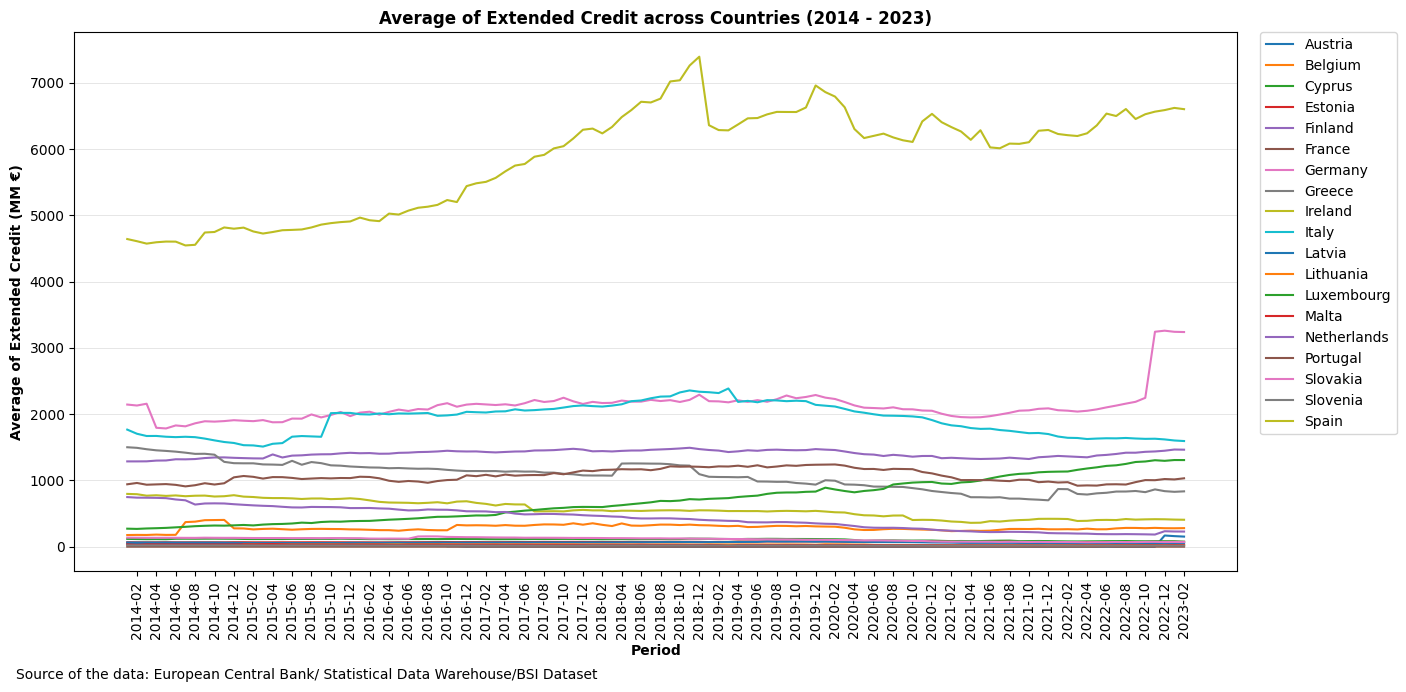

In [86]:
# create the dataset with BSI by country
bsi_by_country = ec_df3.groupby(by = ec_df3["Country"]).mean()
bsi_by_country = bsi_by_country.iloc[:, ::-1] #change the order of columns
bsi_by_country = bsi_by_country.T
#bsi_by_country

# COUNTRY
pl = bsi_by_country.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(bsi_by_country)+1, 2), bsi_by_country.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.set_title('Average of Extended Credit across Countries (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of Extended Credit (MM €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.05, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/BSI Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

For the sake of clarity, we separate each country into a graph.

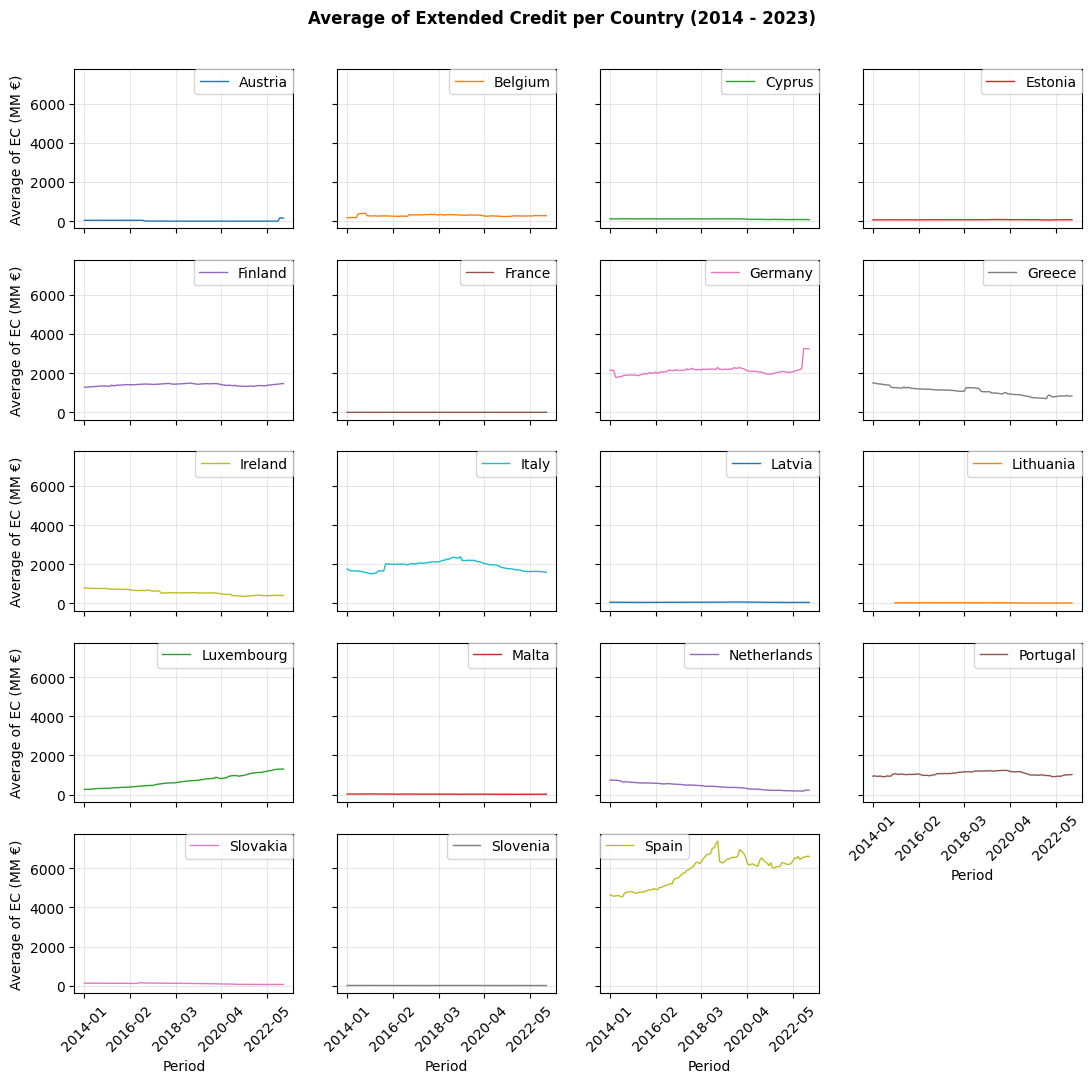

In [87]:
# EC
bsi_by_country.plot(subplots = True, layout = (5, 4), figsize = (13, 12), 
                    sharey = True, ylabel = 'Average of EC (MM €)', 
                    xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle("Average of Extended Credit per Country (2014 - 2023)", 
                   fontsize = 12, fontweight = 'bold', y = 0.93)
for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.tick_params(axis = 'x', labelrotation = 45)
    ax.grid(color = 'lightgrey', linewidth = 0.4)

#### D. BS COUNTERPART SECTOR

In [88]:
bsi_by_bscs = ec_df3.groupby(by = 'BS counterpart sector').mean()
bsi_by_bscs = bsi_by_bscs.iloc[:, ::-1]
bsi_by_bscs = bsi_by_bscs.T
#bsi_by_bscs

<ipython-input-88-e25d9e43d1ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_by_bscs = ec_df3.groupby(by = 'BS counterpart sector').mean()


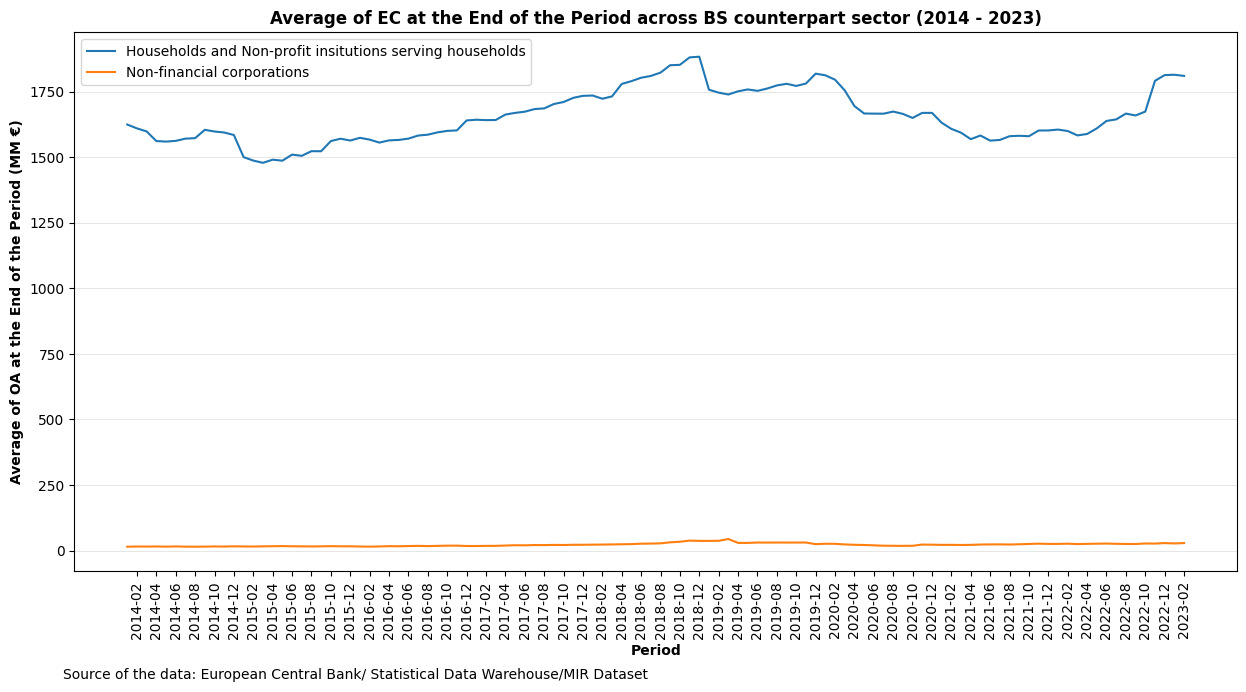

In [89]:
pl = bsi_by_bscs.plot(rot = 90, figsize = (15, 7))
pl.set_xticks(range(1, len(bsi_by_bscs)+1, 2), bsi_by_bscs.index[1::2])
pl.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
pl.legend(['Households and Non-profit insitutions serving households', 'Non-financial corporations'], frameon = True, loc = 'best')
pl.set_title('Average of EC at the End of the Period across BS counterpart sector (2014 - 2023)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of OA at the End of the Period (MM €)', fontweight = 'bold', fontsize = 10)
pl.text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/MIR Dataset', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

# **3. REGRESSION**

In conclusion we would like to recap the findings of our analysis by observing some regression models which could give some additional information regarding the effectiveness of the monetary policies applied through the value of the MRO in the period 2014-2023 and especially in the period 2022-2023.

###*3.1. GENERIC*

In [90]:
def regr_mro_mir(col):
  mir_df_groupby = mir_df.groupby(by = col).mean()
  mir_df_groupby = mir_df_groupby.T
  mir_df_groupby = mir_df_groupby.iloc[::-1]

  mir_date = []
  mir_type = []
  mir = []
  mro = []

  for i in range(len(mir_df_groupby)):
    for col in mir_df_groupby.columns:
      mir_date.append(mir_df_groupby.index[i])
      mir_type.append(col)
      mir.append(mir_df_groupby[col][i])
      value_mro = float(full_mro_df[full_mro_df['Date']==mir_df_groupby.index[i]]['MRO'].values)
      mro.append(value_mro)


  mir_mro = pd.DataFrame(list(zip(mir_date, mir_type, mir, mro)),
                    columns = ['Date', 'Type', 'MIR', 'MRO'])
  return mir_mro

In [91]:
mir_mro_loans = regr_mro_mir('Type of Loans')
#mir_mro_loans

<ipython-input-90-75c5d714062a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_df_groupby = mir_df.groupby(by = col).mean()


Text(0.5, 1.0, 'MIR for Type of Loans with Regression Line (2014 - 2023)')

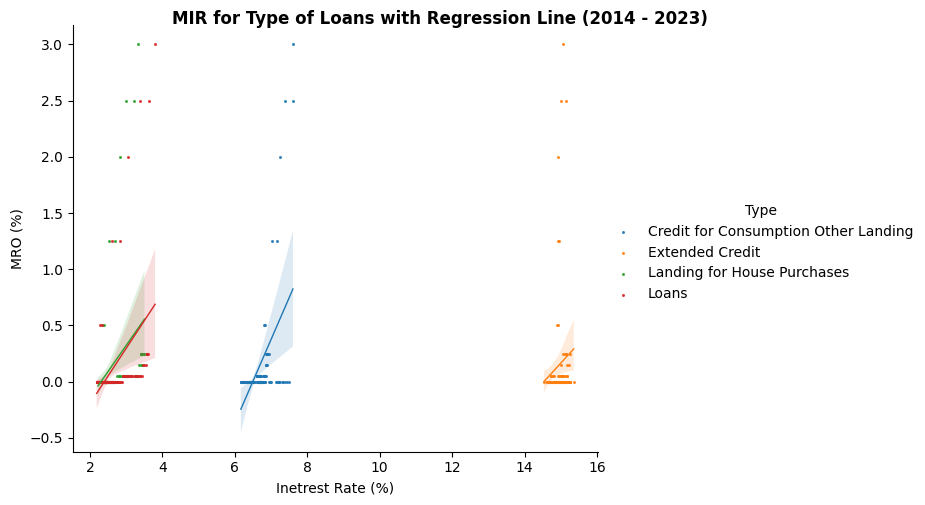

In [92]:
plot = sns.lmplot(x = 'MIR', y = 'MRO', hue = 'Type', data = mir_mro_loans, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, aspect = 1.3)
plot.set(xlabel = 'Inetrest Rate (%)', ylabel = 'MRO (%)')
plot.figure.suptitle('MIR for Type of Loans with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [93]:
mir_mro_maturity = regr_mro_mir('Maturity')
#mir_mro_maturity

<ipython-input-90-75c5d714062a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_df_groupby = mir_df.groupby(by = col).mean()


Text(0.5, 1.0, 'MIR for Type of Loans with Regression Line (2014 - 2023)')

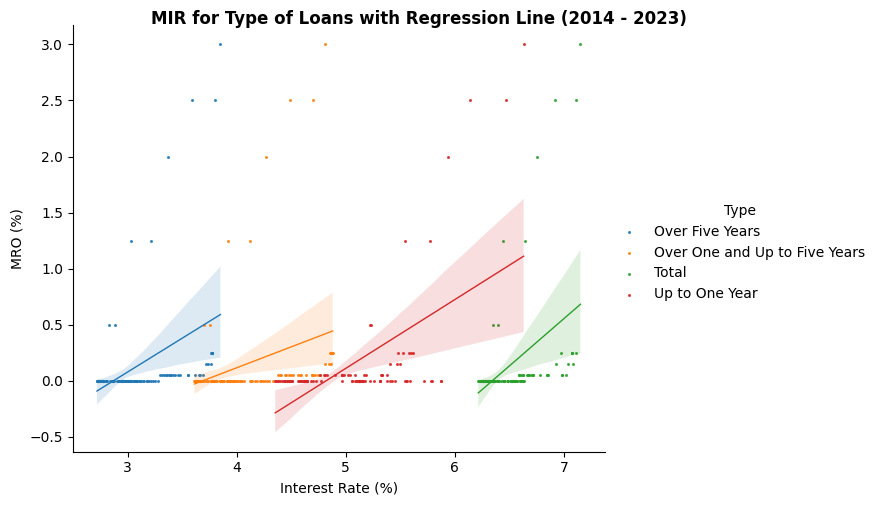

In [94]:
plot = sns.lmplot(x = 'MIR', y = 'MRO', hue = 'Type', data = mir_mro_maturity, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, aspect = 1.3)
plot.set(xlabel = 'Interest Rate (%)', ylabel = 'MRO (%)')
plot.figure.suptitle('MIR for Type of Loans with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [95]:
mir_mro_country = regr_mro_mir('Country')
#mir_mro_country

<ipython-input-90-75c5d714062a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_df_groupby = mir_df.groupby(by = col).mean()


Text(0.5, 1.0, 'MIR for Type of Loans with Regression Line (2014 - 2023)')

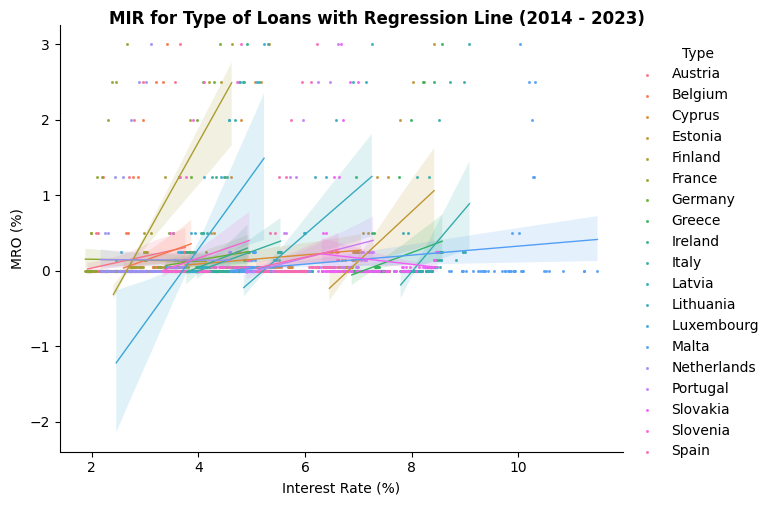

In [96]:
plot = sns.lmplot(x = 'MIR', y = 'MRO', hue = 'Type', data = mir_mro_country, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, aspect = 1.3)
plot.set(xlabel = 'Interest Rate (%)', ylabel = 'MRO (%)')
plot.figure.suptitle('MIR for Type of Loans with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [97]:
mir_mro_bs_part = regr_mro_mir('BS Counterpart Sector')
#mir_mro_bs0_part

<ipython-input-90-75c5d714062a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_df_groupby = mir_df.groupby(by = col).mean()


Text(0.5, 1.0, 'MIR for Type of Loans with Regression Line (2014 - 2023)')

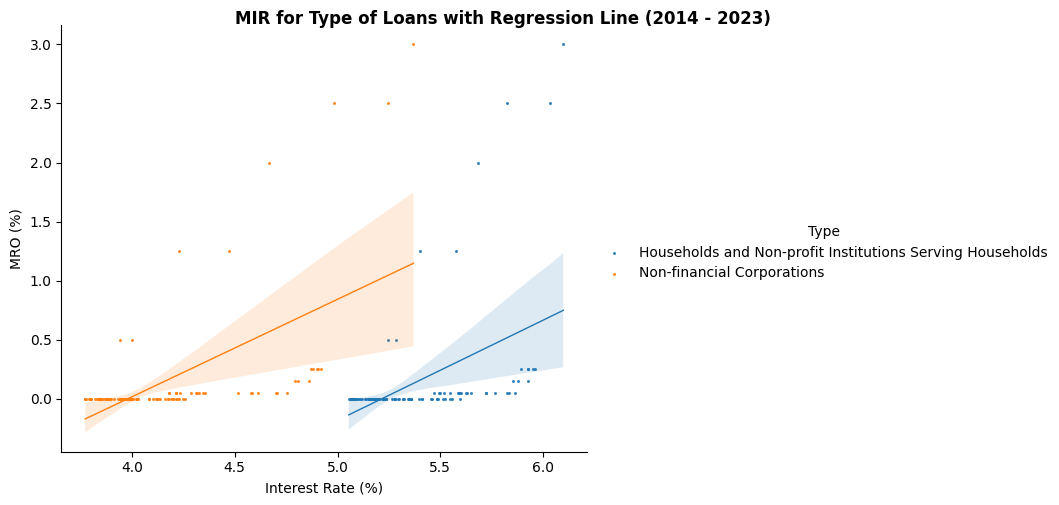

In [98]:
plot = sns.lmplot(x = 'MIR', y = 'MRO', hue = 'Type', data = mir_mro_bs_part, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, aspect = 1.3)
plot.set(xlabel = 'Interest Rate (%)', ylabel = 'MRO (%)')
plot.figure.suptitle('MIR for Type of Loans with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [99]:
mir_mro_business = regr_mro_mir('IR Business Coverage')
#mir_mro_business

<ipython-input-90-75c5d714062a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mir_df_groupby = mir_df.groupby(by = col).mean()


Text(0.5, 1.0, 'MIR for Type of Loans with Regression Line (2014 - 2023)')

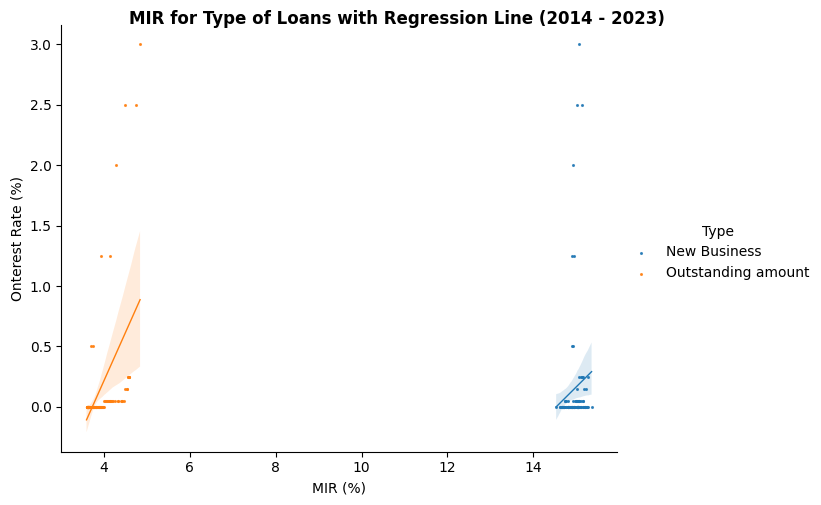

In [100]:
plot = sns.lmplot(x = 'MIR', y = 'MRO', hue = 'Type', data = mir_mro_business, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, aspect = 1.3)
plot.set(xlabel = 'MIR (%)', ylabel = 'Onterest Rate (%)')
plot.figure.suptitle('MIR for Type of Loans with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

## *3.2. LOANS*

In [101]:
loans_mean_df = pd.DataFrame(dict(Mean = loans_mean))
loans_mean_df['Time'] = np.arange(len(loans_mean_df.index))

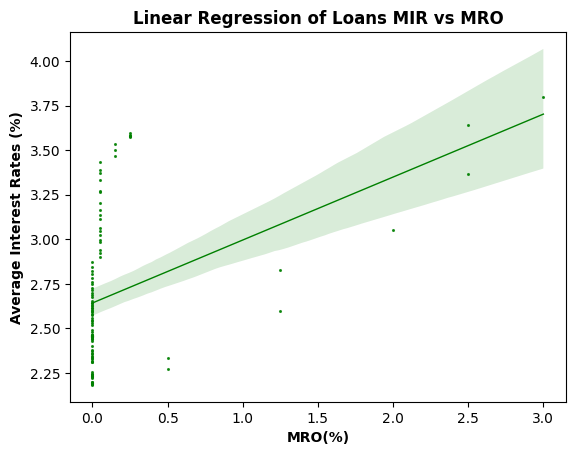

In [102]:
y = loans_mean_df['Mean'].values.reshape((-1,1))
x1 = full_mro_df['MRO'].values.reshape((-1, 1))

model_mir1 = LinearRegression().fit(x1, y)
sns.regplot(x = x1, y = y, color = 'green', scatter_kws={'s' : 1.5}, line_kws={'color' : 'green', 'linewidth' : 1})
plt.title('Linear Regression of Loans MIR vs MRO', fontweight = 'bold', fontsize = 12)
plt.xlabel('MRO(%)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Average Interest Rates (%)', fontweight = 'bold', fontsize = 10)
plt.show()

In [103]:
print('Intercept:', model_mir1.intercept_)
print('Coef', model_mir1.coef_)
print('R squared:', model_mir1.score(x1, y))
print('Adjusted R squared',1 - (1-model_mir1.score(x1, y))*(len(y)-1)/(len(y)-x1.shape[1]-1))

Intercept: [2.64304863]
Coef [[0.35291537]]
R squared: 0.1734008486076294
Adjusted R squared 0.16574715276140373


In the Interest Rate analysis we saw that there has been an increase in the interest rates of the MFIs since July-August 2022. 

If we take a look at this regression which considered the 2014-2023 period 
We see different data for when the MRO is equal or close to 0%. Our R^2 in this case is pretty low. 


Considering the flaws of the previous regression we decided to consider a regression that considers the 2022:2023 period where we see more correlation between the Interest Rates and the MRO. 

This is what we see in this regression: 


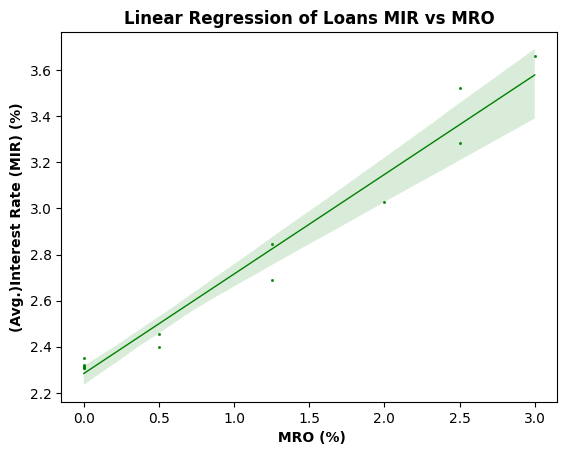

In [104]:
years = list(loans_maturity_total.loc[:, '2023-02':'2022-01'].columns)
mir_loans_maturity_mean = loans_maturity_total.loc[:, '2023-02':'2022-01'].mean()

mir_loans_maturity_mean = pd.DataFrame(dict(MIR = mir_loans_maturity_mean)).reset_index()
mro_years = full_mro_df.loc[full_mro_df['Date'].isin(years)]
mir_loans_maturity_mean.rename(columns={'index': 'Date'}, inplace=True)

mir_mro = mir_loans_maturity_mean.merge(mro_years, on='Date')

y = mir_mro['MIR'].values.reshape((-1,1))
x1 =mir_mro['MRO'].values.reshape((-1, 1))

model_mir2 = LinearRegression().fit(x1, y)
sns.regplot(x = x1, y = y, color = 'green', scatter_kws={'s' : 1.5}, line_kws={'color' : 'green', 'linewidth' : 1})
plt.title('Linear Regression of Loans MIR vs MRO', fontweight = 'bold', fontsize = 12)
plt.xlabel(' MRO (%)', fontweight = 'bold', fontsize = 10)
plt.ylabel('(Avg.)Interest Rate (MIR) (%)', fontweight = 'bold', fontsize = 10)
plt.show()

In [105]:
print('Intercept:', model_mir2.intercept_)
print('Coef', model_mir2.coef_)
print('R squared:', model_mir2.score(x1, y))
print('Adjusted R squared',1 - (1-model_mir2.score(x1, y))*(len(y)-1)/(len(y)-x1.shape[1]-1))

Intercept: [2.28388136]
Coef [[0.43175277]]
R squared: 0.9703146945639725
Adjusted R squared 0.9678409191109701


Here the results we see are different and we see that the increase in MRO manages to explain greatly the increase in the Interest Rates. 




If we instead consider the Volume analysis, as we saw there has been a negative correlation between the outstanding amount of loans at the end of the period and the interest rates and additionally we saw a decrease in the outstanding amount of loans at the end of the period since November 2022. 

If we use a regression to check directly the effect of the increase in MRO on the outstanding amount of loans at the end of the period, we get the following results: 

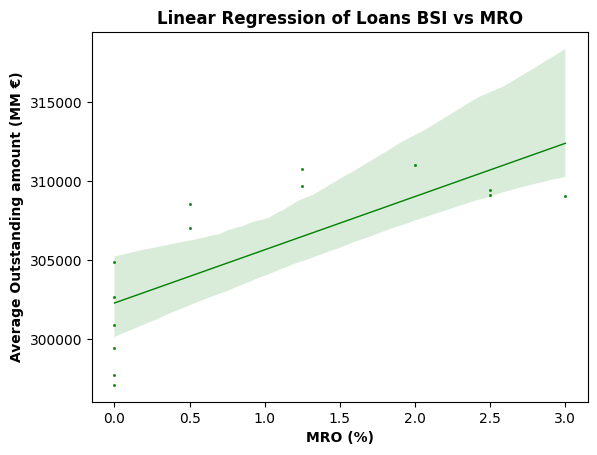

In [106]:
# BSI and MRO during 2022 - 2023 (Type of Loans = Loans, Maturity = Total, 
# Data type = Outstanding amounts at the end of the period (stocks))
bsi_total = bsi_df[(bsi_df['Data type'] == 'Outstanding amounts at the end of the period (stocks)')  
                   & (bsi_df['Type of Loans'] == 'Loans') 
                  & (bsi_df['Maturity'] == 'Total')]

years = list(bsi_total.loc[:, '2023-02':'2022-01'].columns)
bsi_loans_maturity_mean = bsi_total.loc[:, '2023-02':'2022-01'].mean()

bsi_loans_maturity_mean = pd.DataFrame(dict(BSI = bsi_loans_maturity_mean)).reset_index()
mro_years = full_mro_df.loc[full_mro_df['Date'].isin(years)]
bsi_loans_maturity_mean.rename(columns={'index': 'Date'}, inplace=True)

bsi_mro = bsi_loans_maturity_mean.merge(mro_years, on='Date')

y = bsi_mro['BSI'].values.reshape((-1, 1))
x1 = bsi_mro['MRO'].values.reshape((-1, 1))

model_mir4 = LinearRegression().fit(x1, y)
sns.regplot(x = x1, y = y, color = 'green', scatter_kws={'s' : 1.5}, line_kws={'color' : 'green', 'linewidth' : 1})
plt.title('Linear Regression of Loans BSI vs MRO', fontweight = 'bold', fontsize = 12)
plt.xlabel('MRO (%)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Average Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
plt.show()

In [107]:
print('Intercept:', model_mir4.intercept_)
print('Coef', model_mir4.coef_)
print('R squared:', model_mir4.score(x1, y))
print('Adjusted R squared',1 - (1-model_mir4.score(x1, y))*(len(y)-1)/(len(y)-x1.shape[1]-1))

Intercept: [302285.82069713]
Coef [[3370.25039151]]
R squared: 0.5617174852415306
Adjusted R squared 0.5251939423449916


As we previously mentioned we see a time lag in the effect of the increase of the MRO on volumes of loans for MFIs and the first effect on the outstanding amount of loans is visible around November 2022. 

What is interesting to see from this regression is that the value of outstanding loans at the end of the period increases as the MRO increases till November 2022. Since November 2022 the MRO has been increased but the outstanding amount is decreasing as confirmed from the correlation analysis and from the regression.

In terms of R squared we see a lower value but we also consider the values before the increase in MRO where we see different data for the outstanding amount but the MRO equal or close to 0%.


Since the scope of our analysis is to analyze the effect of the increase on the MRO we will zoom in once again and one last regression. 


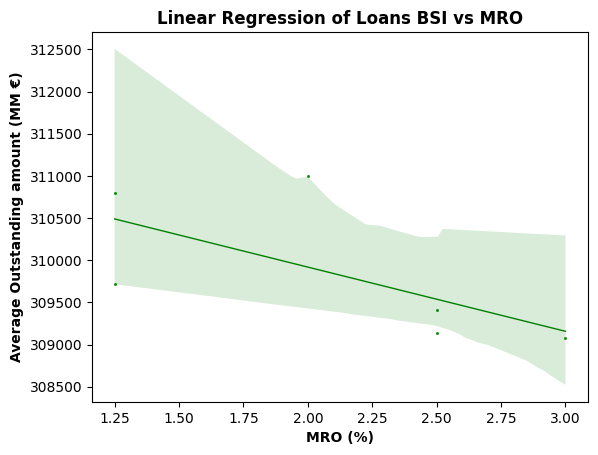

In [108]:
# BSI and MRO during 2022 - 2023 (Type of Loans = Loans, Maturity = Total, 
# Data type = Outstanding amounts at the end of the period (stocks))
bsi_total = bsi_df[(bsi_df['Data type'] == 'Outstanding amounts at the end of the period (stocks)')  
                   & (bsi_df['Type of Loans'] == 'Loans') 
                  & (bsi_df['Maturity'] == 'Total')]

years = list(bsi_total.loc[:, '2023-02':'2022-09'].columns)
bsi_loans_maturity_mean = bsi_total.loc[:, '2023-02':'2022-09'].mean()

bsi_loans_maturity_mean = pd.DataFrame(dict(BSI = bsi_loans_maturity_mean)).reset_index()
mro_years = full_mro_df.loc[full_mro_df['Date'].isin(years)]
bsi_loans_maturity_mean.rename(columns={'index': 'Date'}, inplace=True)

bsi_mro = bsi_loans_maturity_mean.merge(mro_years, on='Date')

y = bsi_mro['BSI'].values.reshape((-1, 1))
x1 = bsi_mro['MRO'].values.reshape((-1, 1))

model_mir5 = LinearRegression().fit(x1, y)
sns.regplot(x = x1, y = y, color = 'green', scatter_kws={'s' : 1.5}, line_kws={'color' : 'green', 'linewidth' : 1})
plt.title('Linear Regression of Loans BSI vs MRO', fontweight = 'bold', fontsize = 12)
plt.xlabel('MRO (%)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Average Outstanding amount (MM €)', fontweight = 'bold', fontsize = 10)
plt.show()

In [109]:
print('Intercept:', model_mir5.intercept_)
print('Coef', model_mir5.coef_)
print('R squared:', model_mir5.score(x1, y))
print('Adjusted R squared',1 - (1-model_mir5.score(x1, y))*(len(y)-1)/(len(y)-x1.shape[1]-1))

Intercept: [311440.99560055]
Coef [[-761.4069718]]
R squared: 0.4246525720227954
Adjusted R squared 0.28081571502849423


This regression considers the period September 2022 February 2023 and seems to provide the same information but now we see that the slope has become negative which suggests decrease in the outstanding amount of loans for MFIs at the end of the period and consequently less loans on the asset side of the balance sheets of MFIs. 

In terms of adjusted R squared we see a very low value which of course renders our conclusion difficult. 

## *3.3. LANDING FOR HOUSE PURCHASES*

In [110]:
lfhp_mean_df = pd.DataFrame(dict(Mean = lfhp_mean))
lfhp_mean_df['Time'] = np.arange(len(lfhp_mean_df.index))

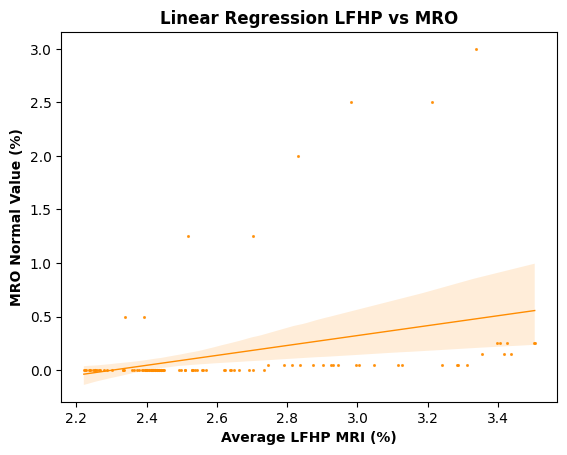

In [111]:
# LFHP MIR & MRO
y = full_mro_df['MRO'].values.reshape((-1, 1))
x1 = lfhp_mean_df['Mean'].values.reshape((-1,1))

model_mir = LinearRegression().fit(x1, y)
sns.regplot(x = x1, y = y, color = 'darkorange', scatter_kws={'s' : 1.5}, line_kws={'color' : 'darkorange', 'linewidth' : 1})
plt.title('Linear Regression LFHP vs MRO', fontweight = 'bold', fontsize = 12)
plt.xlabel('Average LFHP MRI (%)', fontweight = 'bold', fontsize = 10)
plt.ylabel('MRO Normal Value (%)', fontweight = 'bold', fontsize = 10)
#plt.grid(color = 'lightgrey', ls = '--', linewidth = 0.4)
plt.show()

In [112]:
print('Intercept:', model_mir.intercept_)
print('Coef', model_mir.coef_)
print('R squared:', model_mir.score(x1, y))

Intercept: [-1.06786168]
Coef [[0.46330271]]
R squared: 0.10906106210132915


## *3.4. CREDIT FOR CONSUMPTION OTHER LANDING*

In [113]:
cfcol_mean_df = pd.DataFrame(dict(Mean = cfcol_mean))
cfcol_mean_df['Time'] = np.arange(len(cfcol_mean_df.index))

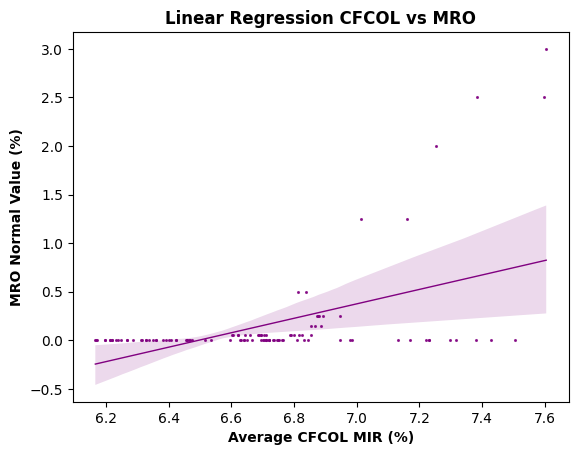

In [114]:
# CFCOL & MRO
y = full_mro_df['MRO'].values.reshape((-1, 1))
x1 = cfcol_mean_df['Mean'].values.reshape((-1,1))

model_mir = LinearRegression().fit(x1, y)
sns.regplot(x = x1, y = y, color = 'purple', scatter_kws={'s' : 1.5}, line_kws={'color' : 'purple', 'linewidth' : 1})
plt.title('Linear Regression CFCOL vs MRO', fontweight = 'bold', fontsize = 12)
plt.xlabel('Average CFCOL MIR (%)', fontweight = 'bold', fontsize = 10)
plt.ylabel('MRO Normal Value (%)', fontweight = 'bold', fontsize = 10)
plt.show()

In [115]:
print('Intercept:', model_mir.intercept_)
print('Coef', model_mir.coef_)
print('R squared:', model_mir.score(x1, y))

Intercept: [-4.82783289]
Coef [[0.74324573]]
R squared: 0.2548107684448757


## *3.5. EXTENDED CREDIT*

In [116]:
ec_mean_df = pd.DataFrame(dict(Mean = ec_mean))
ec_mean_df['Time'] = np.arange(len(ec_mean_df.index))

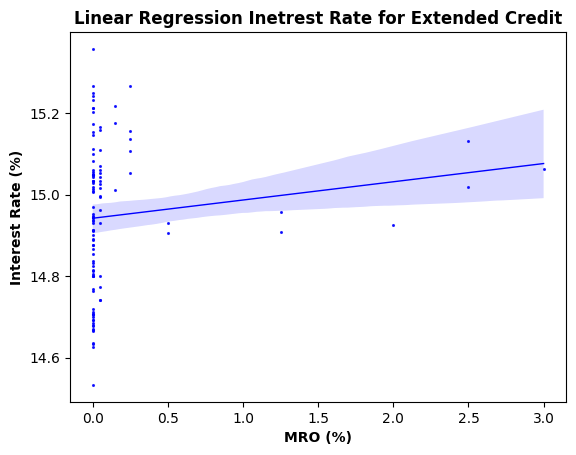

In [117]:
# EC & MRO
y = ec_mean_df['Mean'].values.reshape((-1,1))
x1 = full_mro_df['MRO'].values.reshape((-1, 1))

model_mir = LinearRegression().fit(x1, y)
sns.regplot(x = x1, y = y, color = 'blue', scatter_kws={'s' : 1.5}, line_kws={'color' : 'blue', 'linewidth' : 1})
plt.title('Linear Regression Inetrest Rate for Extended Credit', fontweight = 'bold', fontsize = 12)
plt.xlabel('MRO (%)', fontweight = 'bold', fontsize = 10)
plt.ylabel('Interest Rate (%)', fontweight = 'bold', fontsize = 10)
plt.show()

In [118]:
print('Intercept:', model_mir.intercept_)
print('Coef', model_mir.coef_)
print('R squared:', model_mir.score(x1, y))

Intercept: [14.94240414]
Coef [[0.04476278]]
R squared: 0.015822459100278796


## *3.6. MIR & BSI*

In [119]:
# merge of mir df and bsi df
bsi_out = bsi_df[bsi_df['Data type'] == 'Outstanding amounts at the end of the period (stocks)']

mir_df_bs_part = mir_df.copy()
mir_df_bs_part.rename(columns = {'BS Counterpart Sector':'BS counterpart sector'}, inplace = True)
mir_df_bs_part.drop(['IR Business Coverage'], axis=1, inplace=True)

for i in range(len(mir_df_bs_part)):
  mir_df_bs_part['BS counterpart sector'][i] = mir_df_bs_part['BS counterpart sector'][i].capitalize()
  mir_df_bs_part['Maturity'][i] = mir_df_bs_part['Maturity'][i].capitalize()
  if mir_df_bs_part['Type of Loans'][i] == 'Landing for House Purchases':
    mir_df_bs_part['Type of Loans'][i] = 'Lending for house purchase'

bsi_mir = pd.merge(mir_df_bs_part, bsi_out, on=['BS counterpart sector', 'Maturity', 'Country', 'Type of Loans'])

#bsi_mir.head()

<ipython-input-119-28204295d420>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mir_df_bs_part['BS counterpart sector'][i] = mir_df_bs_part['BS counterpart sector'][i].capitalize()
<ipython-input-119-28204295d420>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mir_df_bs_part['Maturity'][i] = mir_df_bs_part['Maturity'][i].capitalize()
<ipython-input-119-28204295d420>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mir_df_bs_part[

In [120]:
def regr(col_groupby, bsi_mir):
  '''
  function that return dataset for visualisation 
  '''
  bsi_mir_bs_part = bsi_mir.groupby(by = col_groupby).mean()
  bsi_mir_bs_part = bsi_mir_bs_part.T

  bsi_mir_bs_part['Date'] = bsi_mir_bs_part.index
  bsi_mir_bs_part.reset_index(inplace=True)
  bsi_mir_bs_part.drop('index', axis=1, inplace=True)

  bsi_mir_bs_part['Type'] = ''
  for i in range(len(bsi_mir_bs_part)):
    if '_x' in str(bsi_mir_bs_part['Date'][i]):
      bsi_mir_bs_part['Type'][i] = 'MIR'
    else:
      bsi_mir_bs_part['Type'][i] = 'BSI'
    bsi_mir_bs_part['Date'][i] = bsi_mir_bs_part['Date'][i][:-2]
  types_list = list()
  mir_list = list()
  bsi_list = list()
  date_list = list()
  for i in range(len(bsi_mir_bs_part)):
    if bsi_mir_bs_part['Type'][i] == 'MIR':
      for col in bsi_mir[col_groupby].unique():
        mir_list.append(bsi_mir_bs_part[col][i])
        types_list.append(str(col))
        date_list.append(bsi_mir_bs_part['Date'][i])
    else:
      for col in bsi_mir[col_groupby].unique():
        bsi_list.append(bsi_mir_bs_part[col][i])
        types_list.append(str(col))
        date_list.append(bsi_mir_bs_part['Date'][i])
  bsi_mir_bs_part_final = pd.DataFrame(list(zip(date_list, bsi_list, mir_list, types_list)),
                    columns=['Date', 'BSI', 'MIR', 'Type'])
  return bsi_mir_bs_part_final

In [121]:
counter_part = regr('BS counterpart sector', bsi_mir)

<ipython-input-120-f6105ea50db2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_mir_bs_part = bsi_mir.groupby(by = col_groupby).mean()
<ipython-input-120-f6105ea50db2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Type'][i] = 'MIR'
<ipython-input-120-f6105ea50db2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Date'][i] = bsi_mir_bs_part['Date'][i][:-2]
<ipython-input-120-f6105ea50db

Text(0.5, 1.0, 'MIR and BSI with Regression Line (2014 - 2023)')

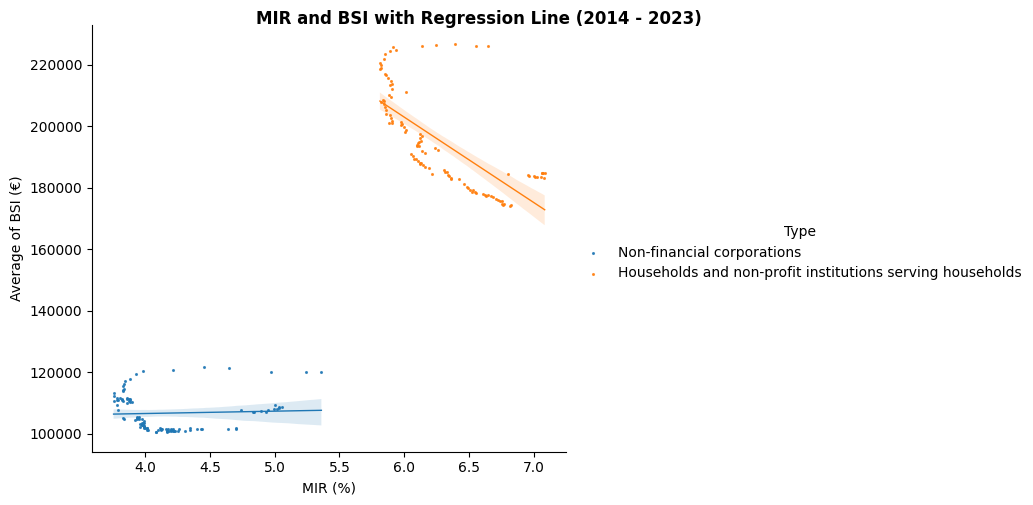

In [122]:
plot = sns.lmplot(x = 'MIR', y = 'BSI', hue = 'Type', data = counter_part, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, 
                  aspect = 1.3)
plot.set(xlabel = 'MIR (%)', ylabel = 'Average of BSI (€)')
plot.figure.suptitle('MIR and BSI with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [123]:
types_loans = regr('Type of Loans', bsi_mir)

<ipython-input-120-f6105ea50db2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_mir_bs_part = bsi_mir.groupby(by = col_groupby).mean()
<ipython-input-120-f6105ea50db2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Type'][i] = 'MIR'
<ipython-input-120-f6105ea50db2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Date'][i] = bsi_mir_bs_part['Date'][i][:-2]
<ipython-input-120-f6105ea50db

Text(0.5, 1.0, 'MIR and BSI with Regression Line (2014 - 2023)')

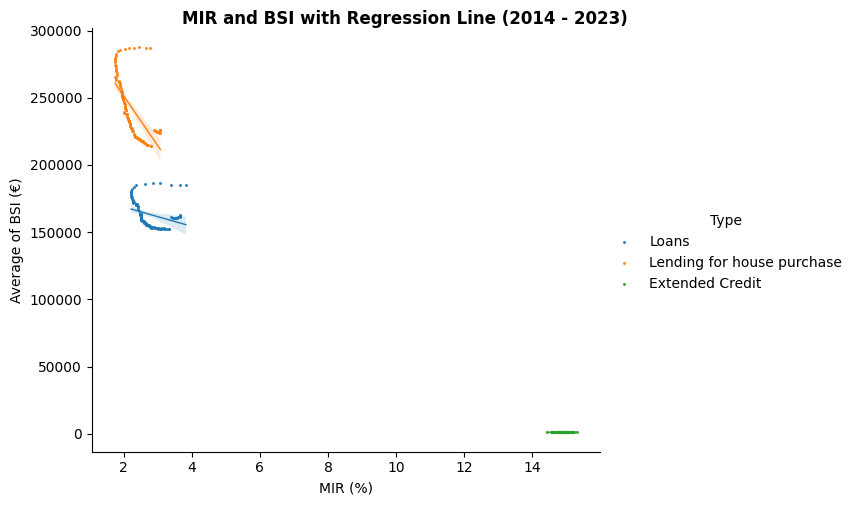

In [124]:
plot = sns.lmplot(x = 'MIR', y = 'BSI', hue = 'Type', data = types_loans, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, 
                  aspect = 1.3)
plot.set(xlabel = 'MIR (%)', ylabel = 'Average of BSI (€)')
plot.figure.suptitle('MIR and BSI with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [125]:
maturity = regr('Maturity', bsi_mir)

<ipython-input-120-f6105ea50db2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_mir_bs_part = bsi_mir.groupby(by = col_groupby).mean()
<ipython-input-120-f6105ea50db2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Type'][i] = 'MIR'
<ipython-input-120-f6105ea50db2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Date'][i] = bsi_mir_bs_part['Date'][i][:-2]
<ipython-input-120-f6105ea50db

Text(0.5, 1.0, 'MIR and BSI with Regression Line (2014 - 2023)')

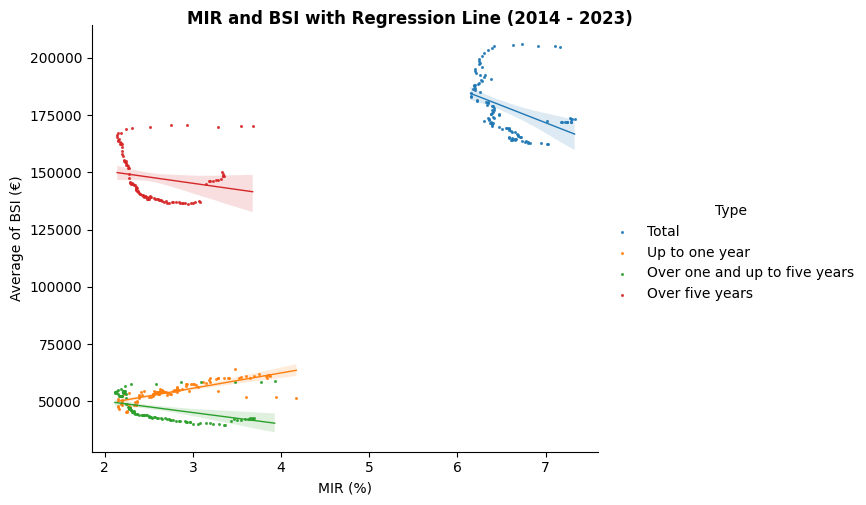

In [126]:
plot = sns.lmplot(x = 'MIR', y = 'BSI', hue = 'Type', data = maturity, 
                  scatter_kws = {'s' : 1.5}, line_kws={'linewidth' : 1}, 
                  aspect = 1.3)
plot.set(xlabel = 'MIR (%)', ylabel = 'Average of BSI (€)')
plot.figure.suptitle('MIR and BSI with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [127]:
country = regr('Country', bsi_mir)

<ipython-input-120-f6105ea50db2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_mir_bs_part = bsi_mir.groupby(by = col_groupby).mean()
<ipython-input-120-f6105ea50db2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Type'][i] = 'MIR'
<ipython-input-120-f6105ea50db2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Date'][i] = bsi_mir_bs_part['Date'][i][:-2]
<ipython-input-120-f6105ea50db

Text(0.5, 1.0, 'MIR and BSI with Regression Line (2014 - 2023)')

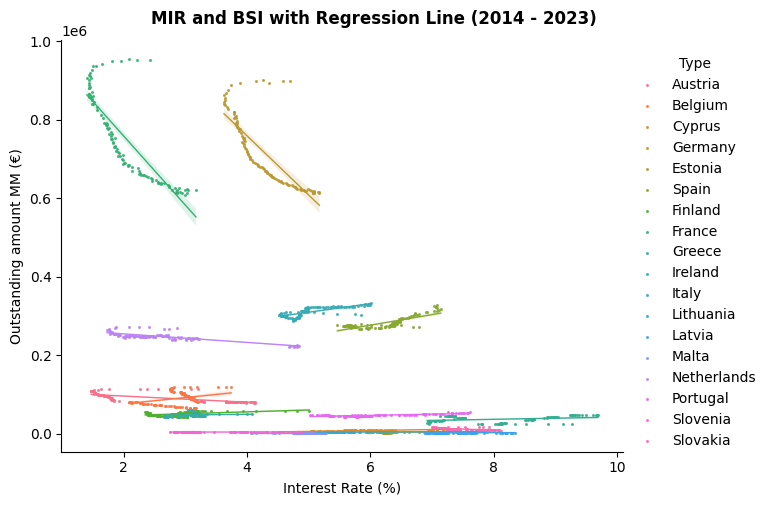

In [128]:
plot = sns.lmplot(x = 'MIR', y = 'BSI', data = country, 
                  hue='Type', scatter_kws = {'s' : 1.5}, 
                  line_kws={'linewidth' : 1}, aspect = 1.3)
plot.set(xlabel = 'Interest Rate (%)', ylabel = 'Outstanding amount MM (€)')
plot.figure.suptitle('MIR and BSI with Regression Line (2014 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

In [129]:
# MIR BSI BS counterpart during period 2022 - 2023

bsi_out = bsi_total.loc[:, 'Country':'2022-01']

mir_df_bs_part = mir_df.loc[:, 'Country':'2022-01']
mir_df_bs_part.rename(columns = {'BS Counterpart Sector':'BS counterpart sector'}, inplace = True)
mir_df_bs_part.drop(['IR Business Coverage'], axis=1, inplace=True)

for i in range(len(mir_df_bs_part)):
  mir_df_bs_part['BS counterpart sector'][i] = mir_df_bs_part['BS counterpart sector'][i].capitalize()
  mir_df_bs_part['Maturity'][i] = mir_df_bs_part['Maturity'][i].capitalize()
  if mir_df_bs_part['Type of Loans'][i] == 'Landing for House Purchases':
    mir_df_bs_part['Type of Loans'][i] = 'Lending for house purchase'

bsi_mir = pd.merge(mir_df_bs_part, bsi_out, on=['BS counterpart sector', 'Maturity', 'Country', 'Type of Loans'])

<ipython-input-129-67eacb4c4dfb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mir_df_bs_part['BS counterpart sector'][i] = mir_df_bs_part['BS counterpart sector'][i].capitalize()
<ipython-input-129-67eacb4c4dfb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mir_df_bs_part['Maturity'][i] = mir_df_bs_part['Maturity'][i].capitalize()
<ipython-input-129-67eacb4c4dfb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mir_df_bs_part

<ipython-input-120-f6105ea50db2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsi_mir_bs_part = bsi_mir.groupby(by = col_groupby).mean()
<ipython-input-120-f6105ea50db2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Type'][i] = 'MIR'
<ipython-input-120-f6105ea50db2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsi_mir_bs_part['Date'][i] = bsi_mir_bs_part['Date'][i][:-2]
<ipython-input-120-f6105ea50db

Text(0.5, 1.0, 'MIR and BSI with Regression Line (2022 - 2023)')

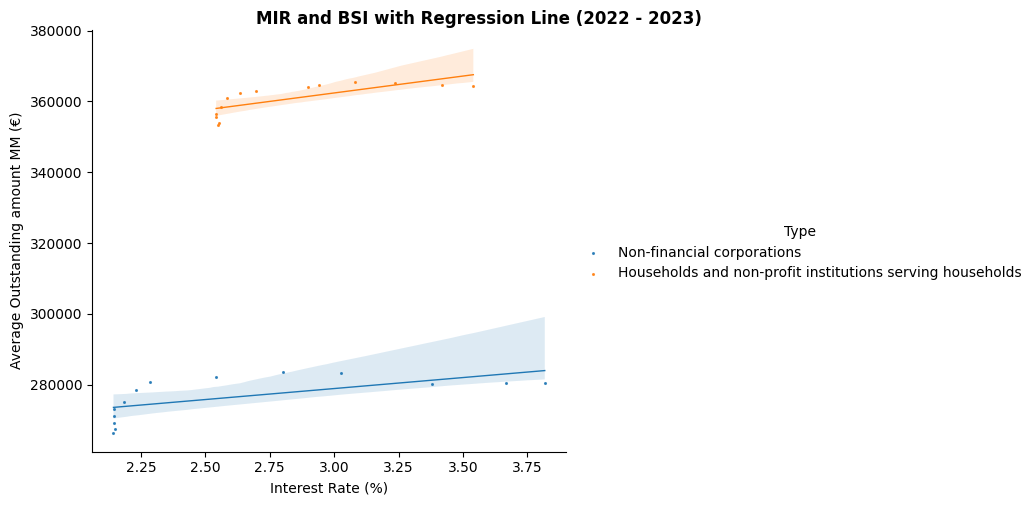

In [130]:
counterpart = regr('BS counterpart sector', bsi_mir)
plot = sns.lmplot(x = 'MIR', y = 'BSI', data = counterpart, 
                  hue='Type', scatter_kws = {'s' : 1.5}, 
                  line_kws={'linewidth' : 1}, aspect = 1.3)
plot.set(xlabel = 'Interest Rate (%)', ylabel = 'Average Outstanding amount MM (€)')
plot.figure.suptitle('MIR and BSI with Regression Line (2022 - 2023)', 
                     y = 1.0, fontweight = 'bold', fontsize = 12)

# **4. CONCLUSION**

Nevertheless, we can confirm the presence of the effectiveness lag of the monetary policy through the increase of the value of the MRO. What is interesting to say is that the inflation is expected to have decreased for March 2023 in some parts and sectors in the euro area. This of course does not imply that the ECB will start decreasing the MRO. 

As we remember in 2022 the Russian invasion in Ukraine in 2022 provoked a fear of imminent energy supply shock which would not have increased the core inflation but could have provoked both a supply shock and consequently an increase in prices for energy . In 2022 we saw the energy prices increase. However despite the initial increase in prices we saw an immediate reaction from governments and companies. Governments applied price caps and companies discovered ways to manage and control the energy shortage. For example there have been examples of companies that  developed data driven software to keep 
track of their hundreds of suppliers, and to make long-term forecasts about where shortages might emerge.

In 2023 instead the prices from the energy sector have decreased compared to the 2022 prices, however we encounter other transitory inflation shocks , namely the prices for food and everyday goods and prices for some services. 
The positive news regarding the expected decrease in inflation in March does not mean that the ‘ too high inflation period’ is over but might mean that the conventional monetary policy used by the ECB has started showing its effect. 